In [ ]:
# Importaciones y preparaciones previas
!pip install umap-learn

import os
import time
import torch
import random
import numpy as np
import pandas as pd
import seaborn as sns
import umap.umap_ as umap
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys
from sklearn.manifold import TSNE
from torch import Tensor
from typing import Type
import torch.nn.init as init
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.7 MB/s eta 0:00:00
Mounted at /content/drive


Files already downloaded and verified
Files already downloaded and verified
ResNet110_SD(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (rel

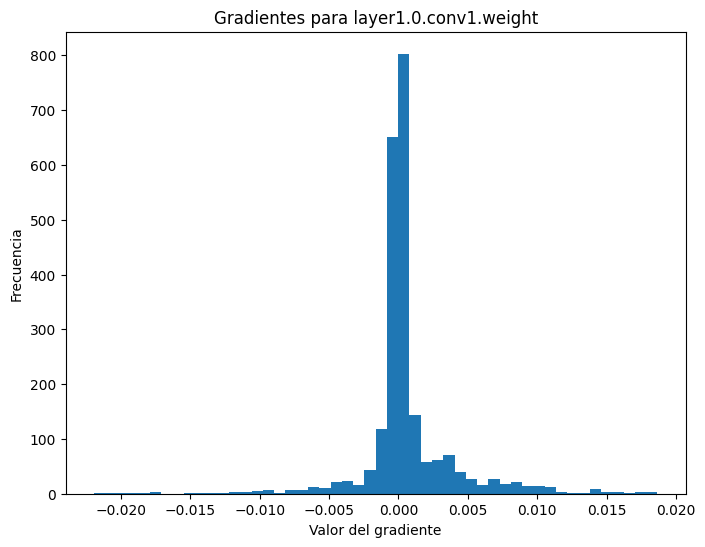

Gradientes para layer1.0.bn1.weight: min=-0.08000938594341278, max=0.02600746415555477, mean=-0.0007042221259325743, std=0.022149497643113136


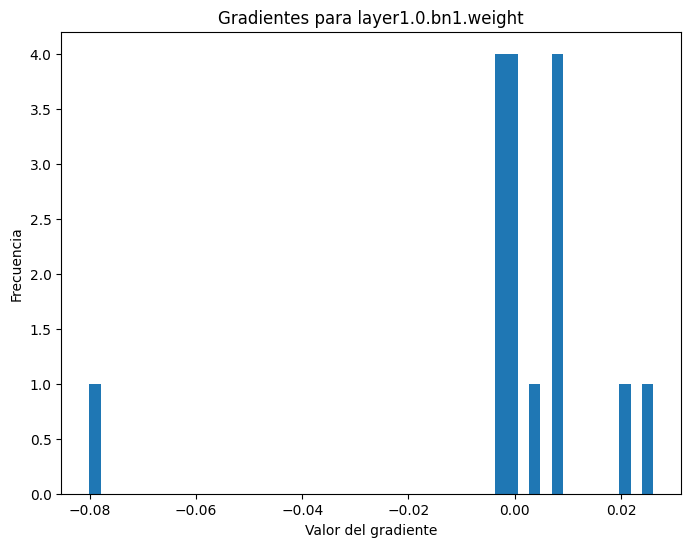

Gradientes para layer1.0.bn1.bias: min=-0.009828317910432816, max=0.014547321945428848, mean=0.000879152212291956, std=0.005898117087781429


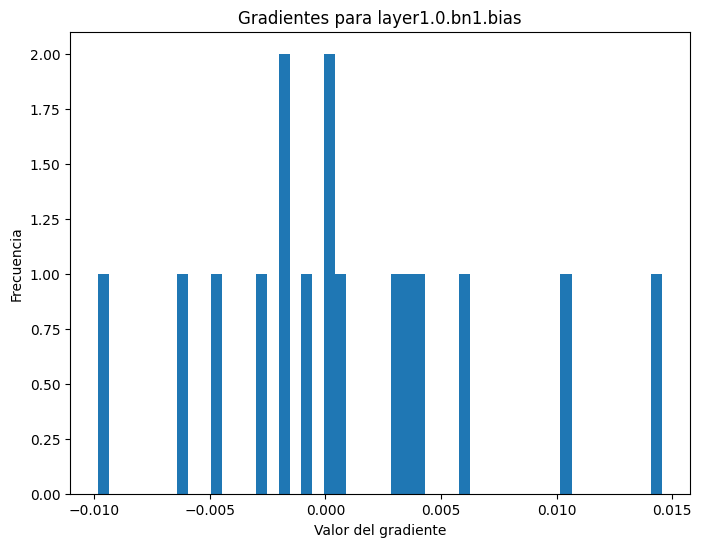

Gradientes para layer2.8.conv1.weight: min=-0.003365742042660713, max=0.004061001352965832, mean=5.7998826378025115e-05, std=0.00035095628118142486


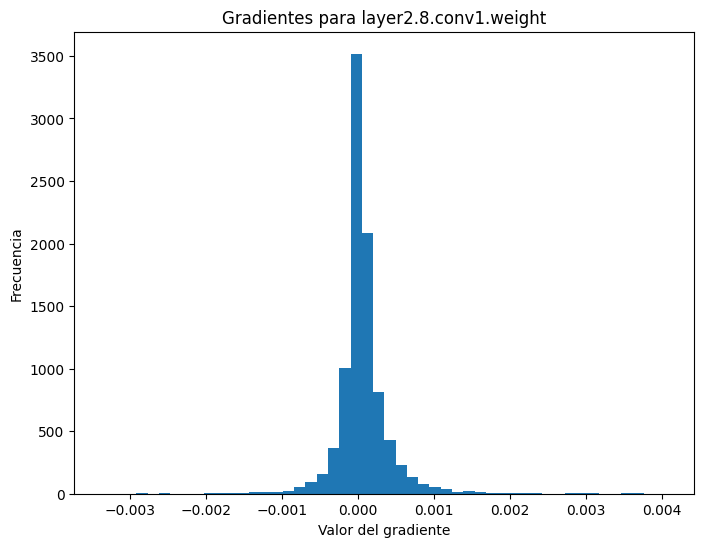

Gradientes para layer2.8.bn1.weight: min=-0.0018489547073841095, max=0.0017613682430237532, mean=1.7075817595468834e-05, std=0.0008090143091976643


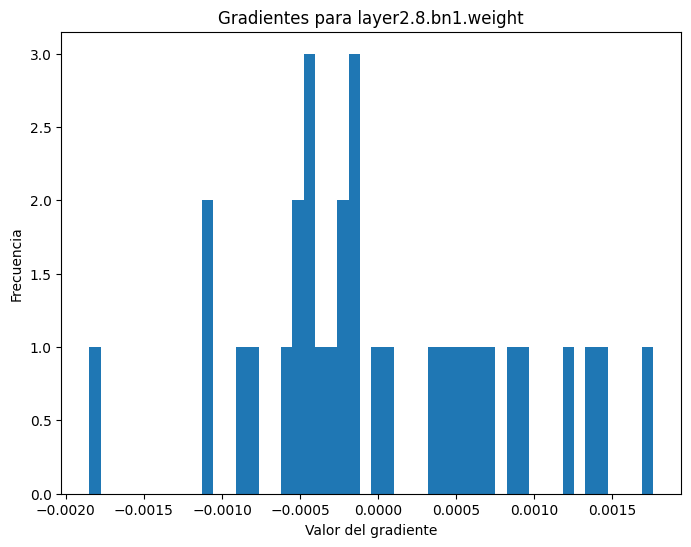

Gradientes para layer2.8.bn1.bias: min=-0.0028732474893331528, max=0.002884422428905964, mean=-0.00017187277262564749, std=0.0012605482479557395


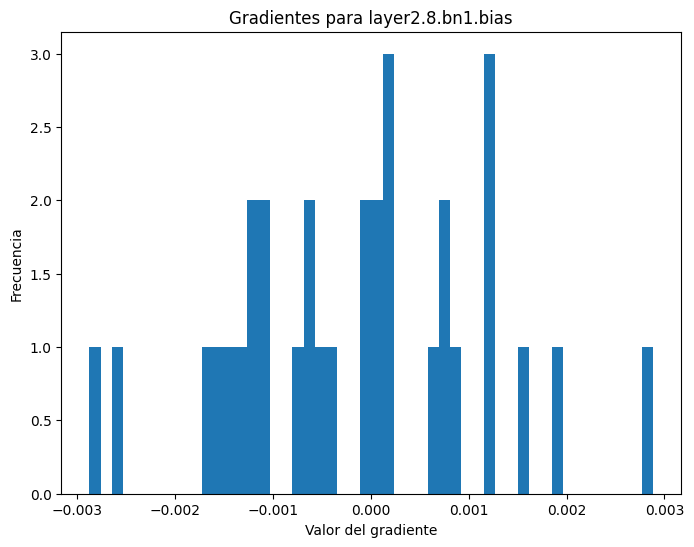

Gradientes para linear.weight: min=-0.07533107697963715, max=0.11002258956432343, mean=1.8626451769865326e-10, std=0.010199282318353653


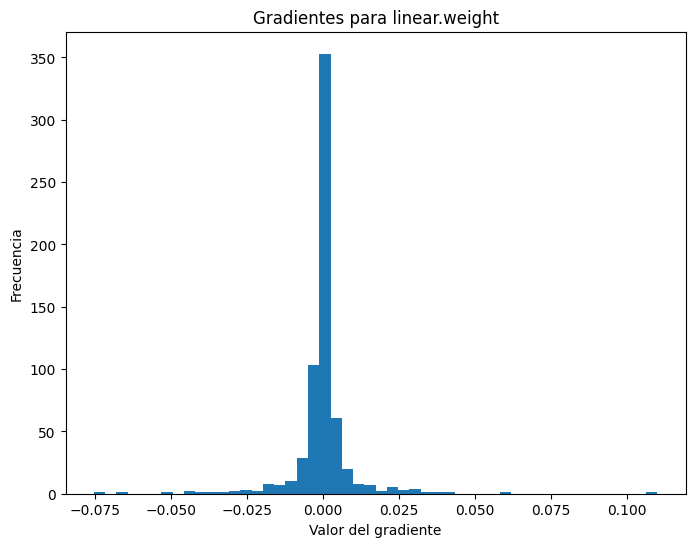

Gradientes para linear.bias: min=-0.041435882449150085, max=0.06687844544649124, mean=2.9802322831784522e-09, std=0.030396629124879837


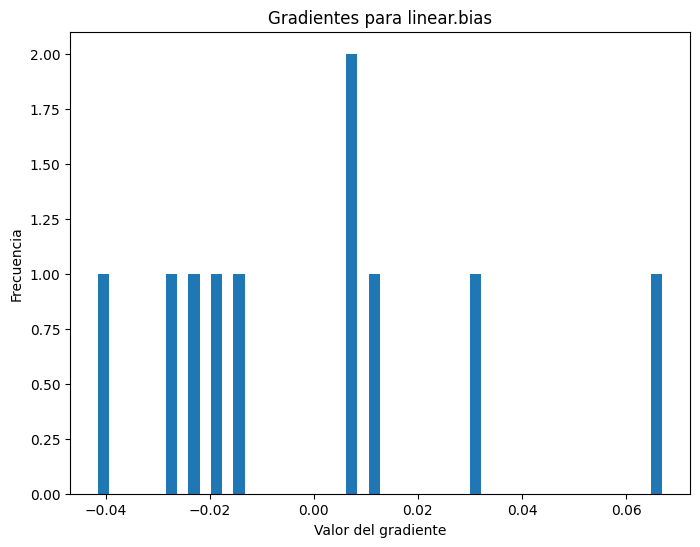

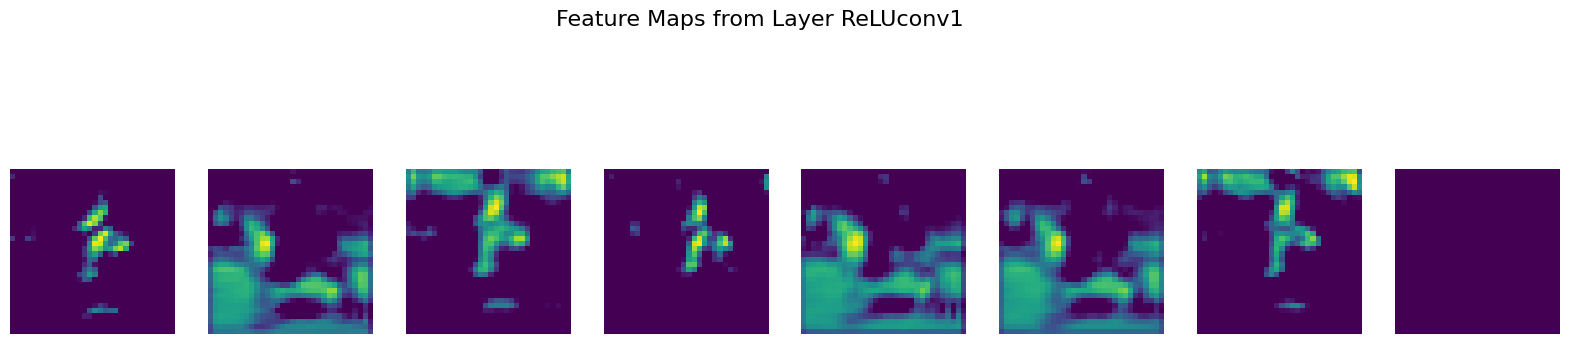

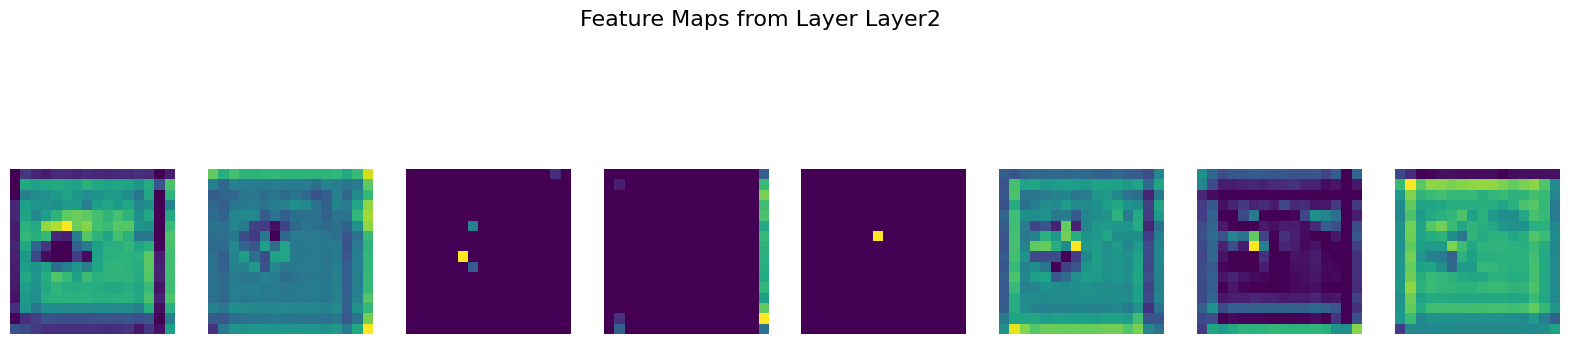

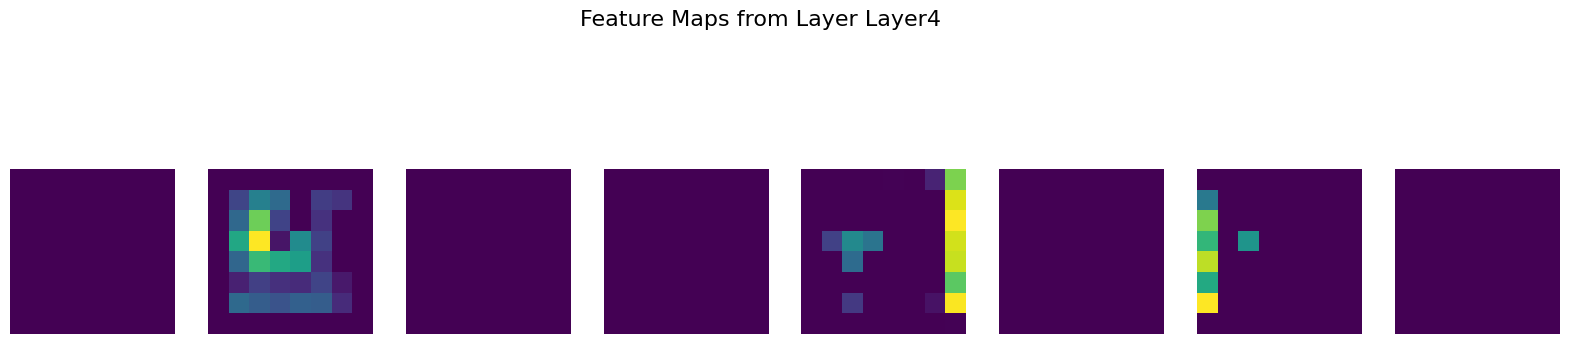

0.04
Epoch 2/70
Iteración 387 - Lote 35/352 - Pérdida de Entrenamiento: 2.2160, Precisión de Entrenamiento: 0.1609
Iteración 422 - Lote 70/352 - Pérdida de Entrenamiento: 2.2151, Precisión de Entrenamiento: 0.1644
Iteración 457 - Lote 105/352 - Pérdida de Entrenamiento: 2.2106, Precisión de Entrenamiento: 0.1693
Iteración 492 - Lote 140/352 - Pérdida de Entrenamiento: 2.1894, Precisión de Entrenamiento: 0.1794
Iteración 527 - Lote 175/352 - Pérdida de Entrenamiento: 2.1578, Precisión de Entrenamiento: 0.1898
Iteración 562 - Lote 210/352 - Pérdida de Entrenamiento: 2.1283, Precisión de Entrenamiento: 0.2002
Iteración 597 - Lote 245/352 - Pérdida de Entrenamiento: 2.1016, Precisión de Entrenamiento: 0.2093
Iteración 632 - Lote 280/352 - Pérdida de Entrenamiento: 2.0752, Precisión de Entrenamiento: 0.2184
Iteración 667 - Lote 315/352 - Pérdida de Entrenamiento: 2.0533, Precisión de Entrenamiento: 0.2256
Iteración 702 - Lote 350/352 - Pérdida de Entrenamiento: 2.0305, Precisión de Entrenam

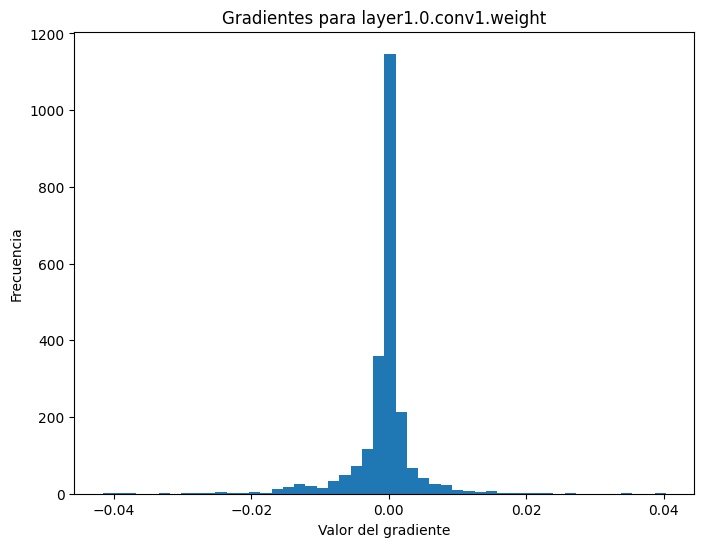

Gradientes para layer1.0.bn1.weight: min=-0.027130864560604095, max=0.02143002301454544, mean=-0.0028837663121521473, std=0.013159305788576603


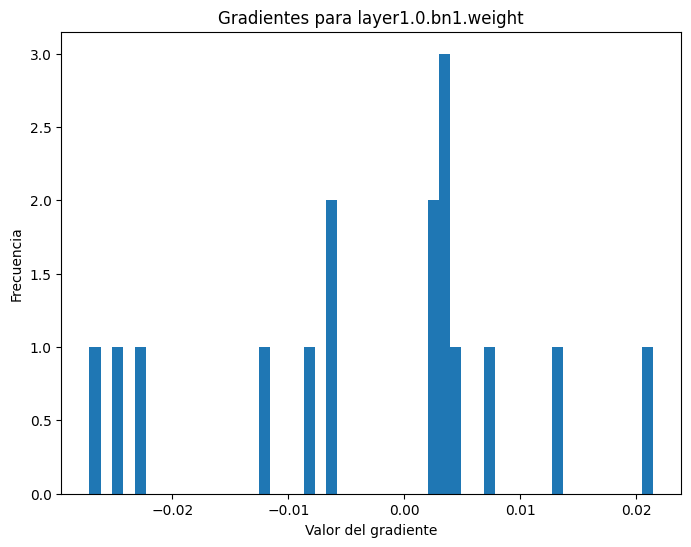

Gradientes para layer1.0.bn1.bias: min=-0.02008667215704918, max=0.04243168607354164, mean=0.004402348306030035, std=0.016385693103075027


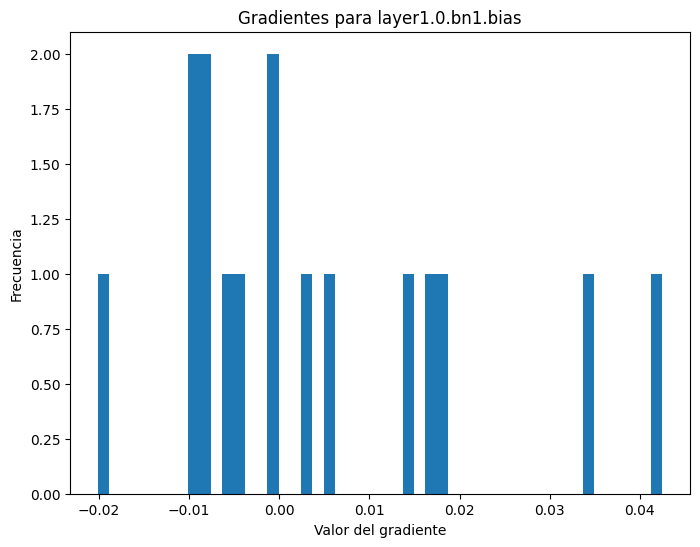

Gradientes para layer2.8.conv1.weight: min=-0.018799064680933952, max=0.020864104852080345, mean=-9.649567800806835e-05, std=0.0015723742544651031


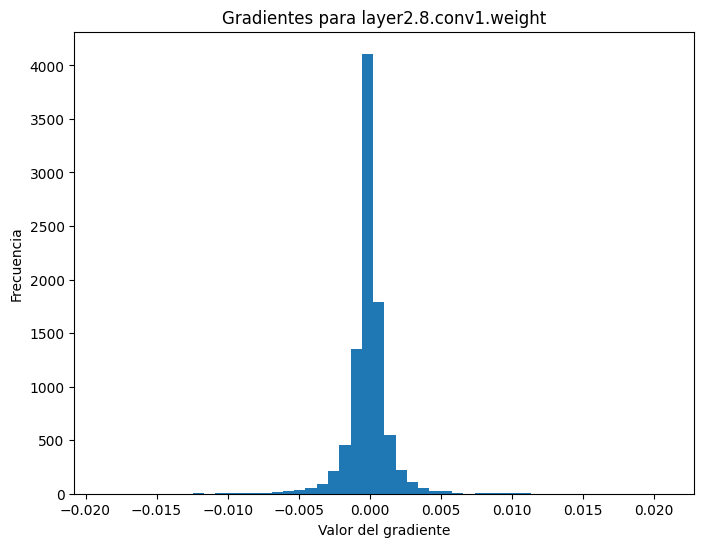

Gradientes para layer2.8.bn1.weight: min=-0.006717070937156677, max=0.005666807759553194, mean=-1.823870843509212e-05, std=0.002817336469888687


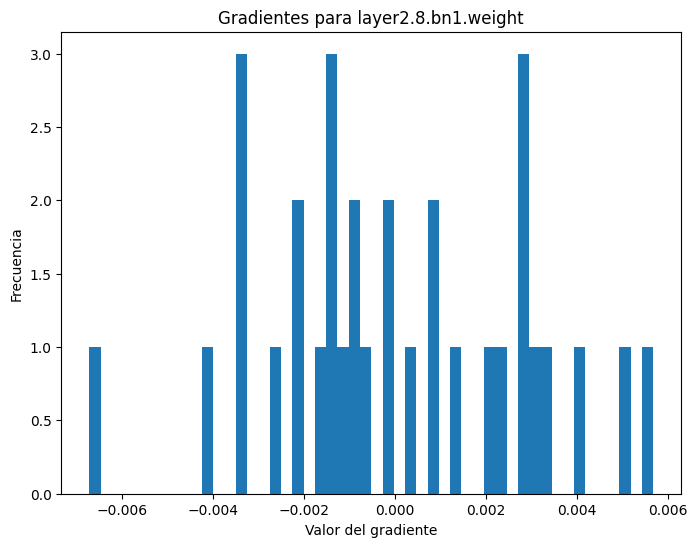

Gradientes para layer2.8.bn1.bias: min=-0.00809922069311142, max=0.007780134677886963, mean=0.0005667037330567837, std=0.004086803179234266


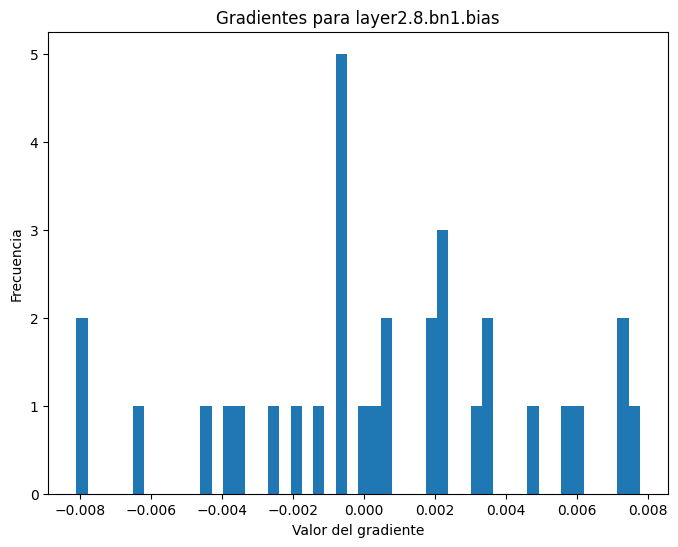

Gradientes para linear.weight: min=-0.12248614430427551, max=0.13154537975788116, mean=-3.7252903539730653e-10, std=0.02075590379536152


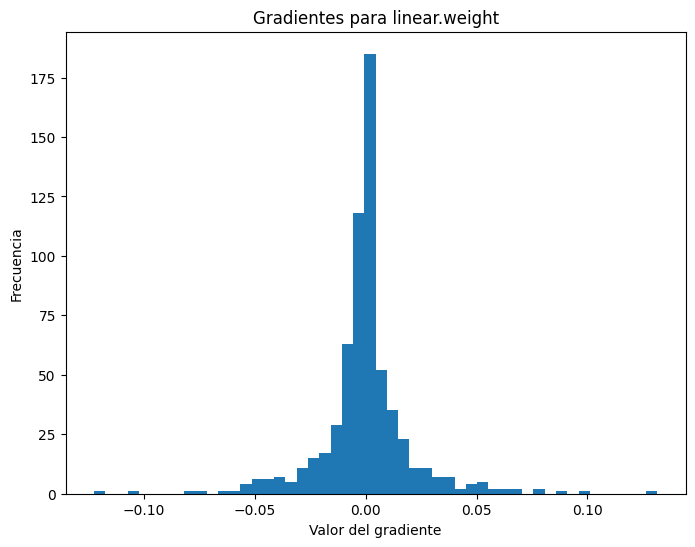

Gradientes para linear.bias: min=-0.039574019610881805, max=0.05213295668363571, mean=-7.450580707946131e-10, std=0.028385821729898453


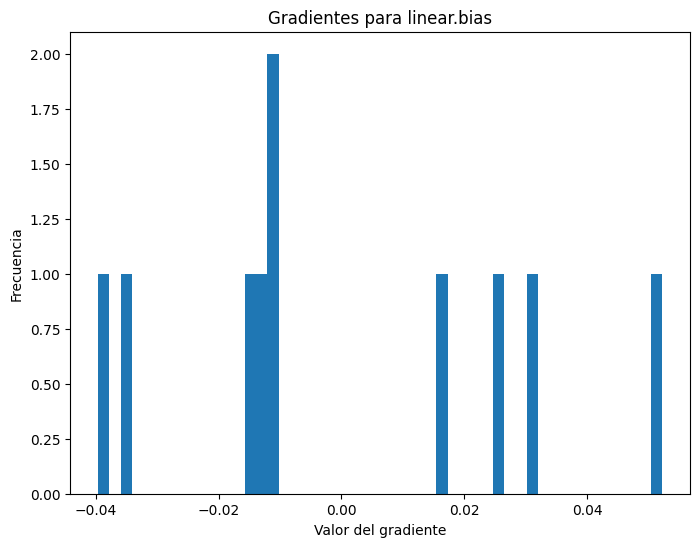

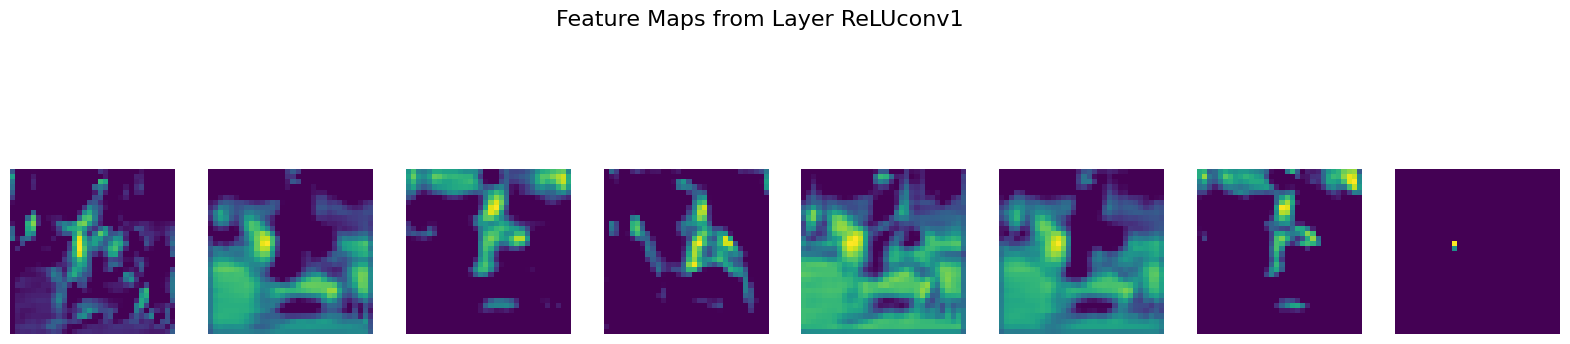

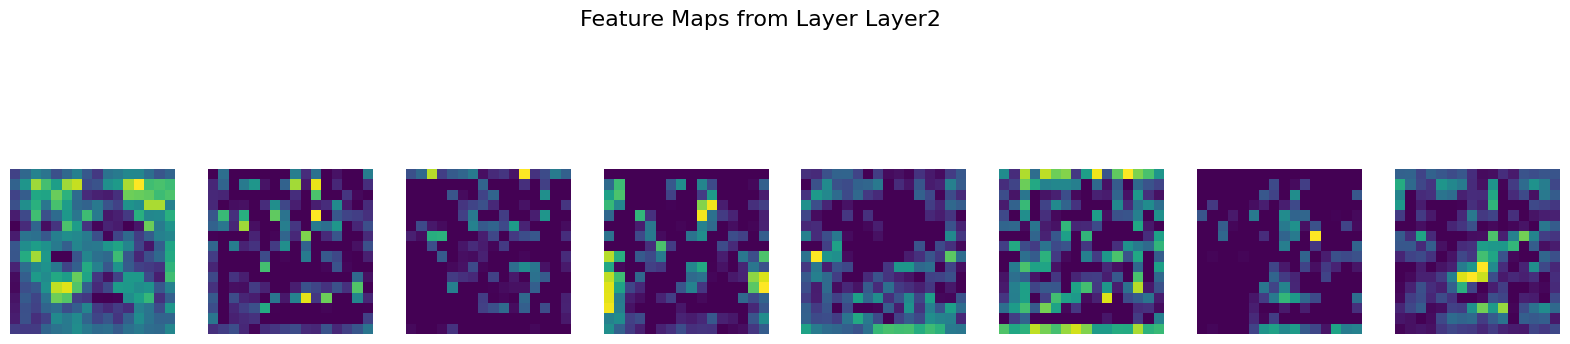

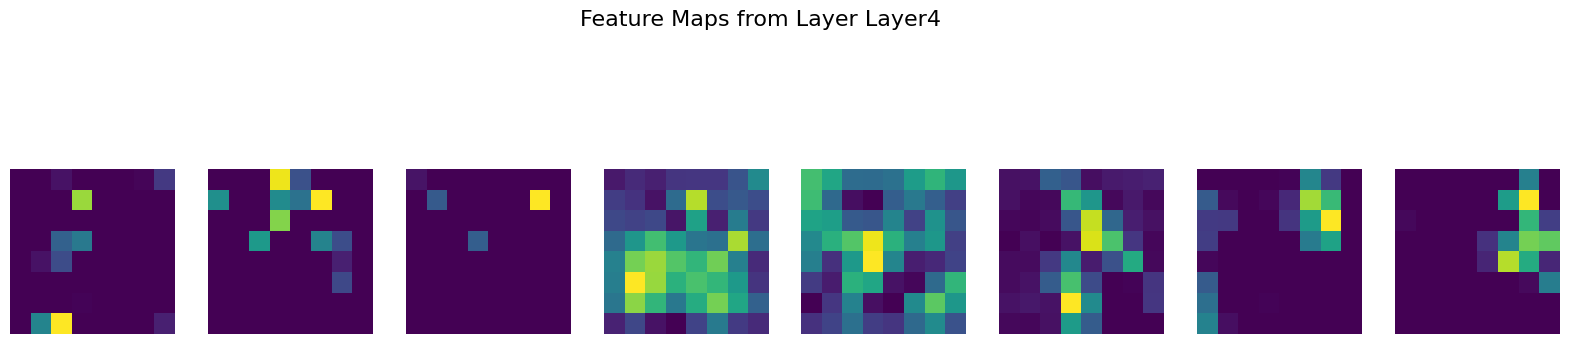

0.04
Epoch 6/70
Iteración 1795 - Lote 35/352 - Pérdida de Entrenamiento: 1.2446, Precisión de Entrenamiento: 0.5471
Iteración 1830 - Lote 70/352 - Pérdida de Entrenamiento: 1.2431, Precisión de Entrenamiento: 0.5475
Iteración 1865 - Lote 105/352 - Pérdida de Entrenamiento: 1.2346, Precisión de Entrenamiento: 0.5550
Iteración 1900 - Lote 140/352 - Pérdida de Entrenamiento: 1.2358, Precisión de Entrenamiento: 0.5529
Iteración 1935 - Lote 175/352 - Pérdida de Entrenamiento: 1.2340, Precisión de Entrenamiento: 0.5555
Iteración 1970 - Lote 210/352 - Pérdida de Entrenamiento: 1.2284, Precisión de Entrenamiento: 0.5559
Iteración 2005 - Lote 245/352 - Pérdida de Entrenamiento: 1.2217, Precisión de Entrenamiento: 0.5584
Iteración 2040 - Lote 280/352 - Pérdida de Entrenamiento: 1.2142, Precisión de Entrenamiento: 0.5606
Iteración 2075 - Lote 315/352 - Pérdida de Entrenamiento: 1.2104, Precisión de Entrenamiento: 0.5620
Iteración 2110 - Lote 350/352 - Pérdida de Entrenamiento: 1.2033, Precisión d

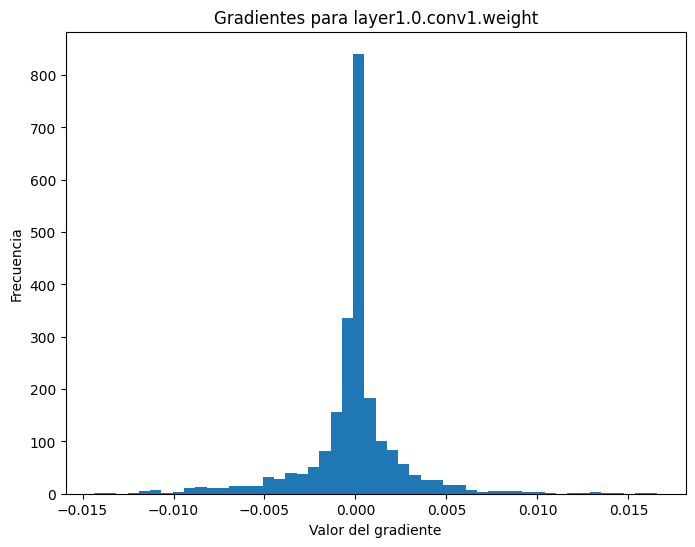

Gradientes para layer1.0.bn1.weight: min=-0.0316290482878685, max=0.025516867637634277, mean=-0.0005092135397717357, std=0.01250097993761301


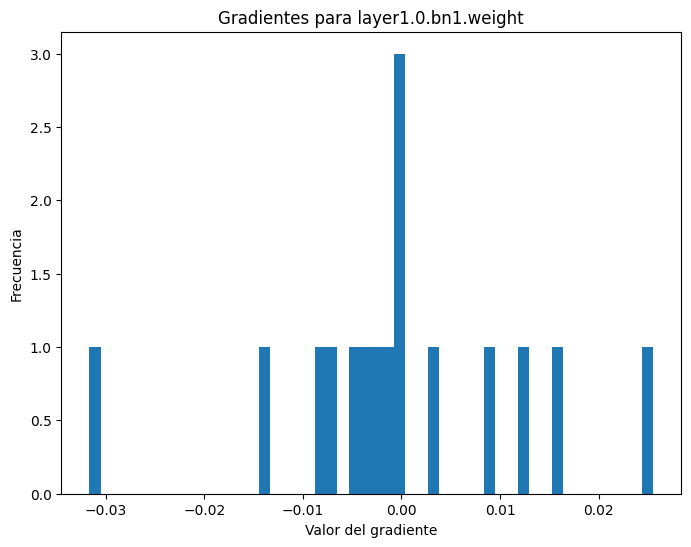

Gradientes para layer1.0.bn1.bias: min=-0.01720525696873665, max=0.009930424392223358, mean=-0.0023486511781811714, std=0.007469478994607925


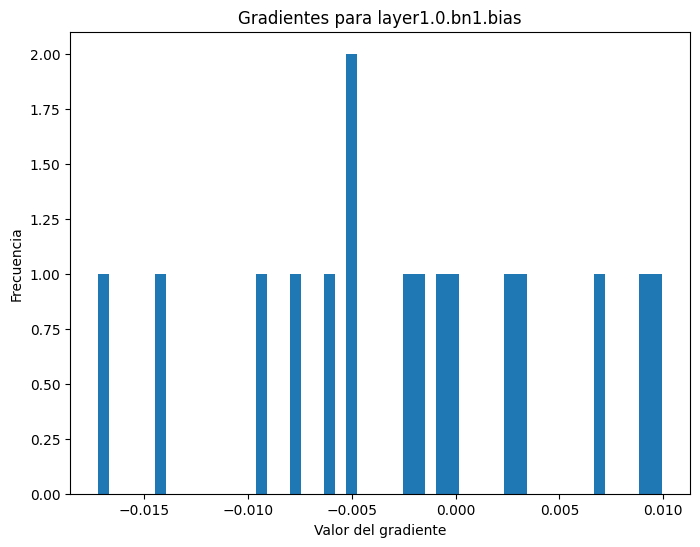

Gradientes para layer2.8.conv1.weight: min=-0.013880643993616104, max=0.012267560698091984, mean=5.760606654803269e-06, std=0.001028520637191832


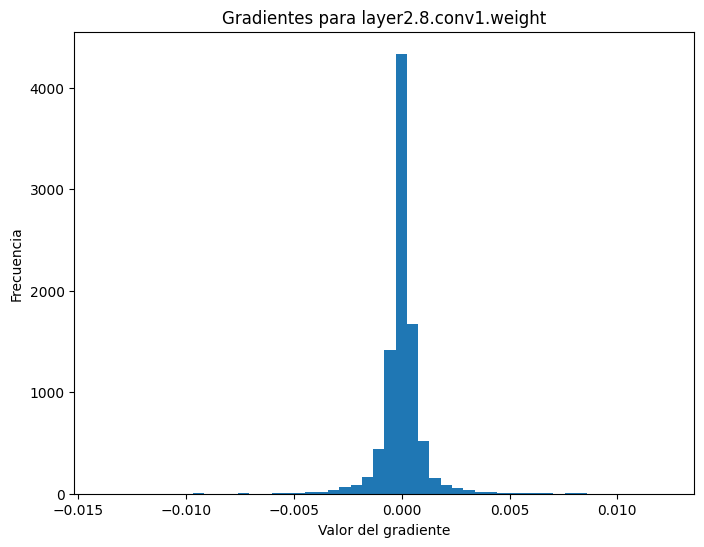

Gradientes para layer2.8.bn1.weight: min=-0.005716003943234682, max=0.003016169648617506, mean=3.968141390942037e-05, std=0.0018253035377711058


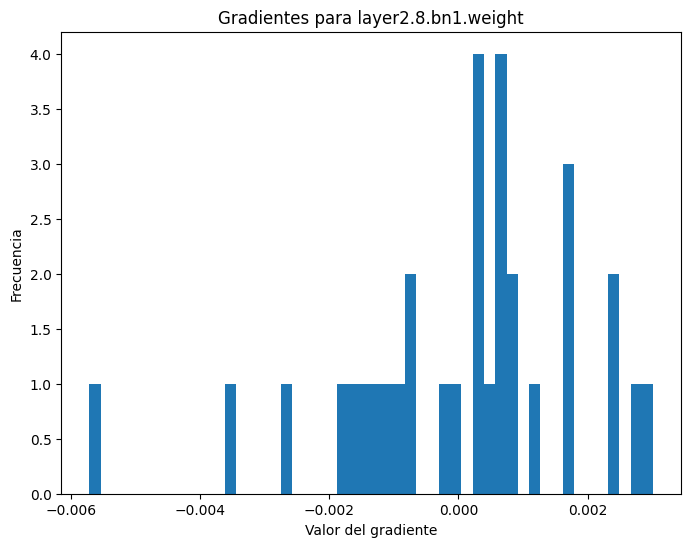

Gradientes para layer2.8.bn1.bias: min=-0.004120511934161186, max=0.006792201194912195, mean=0.0009317976655438542, std=0.0026254793629050255


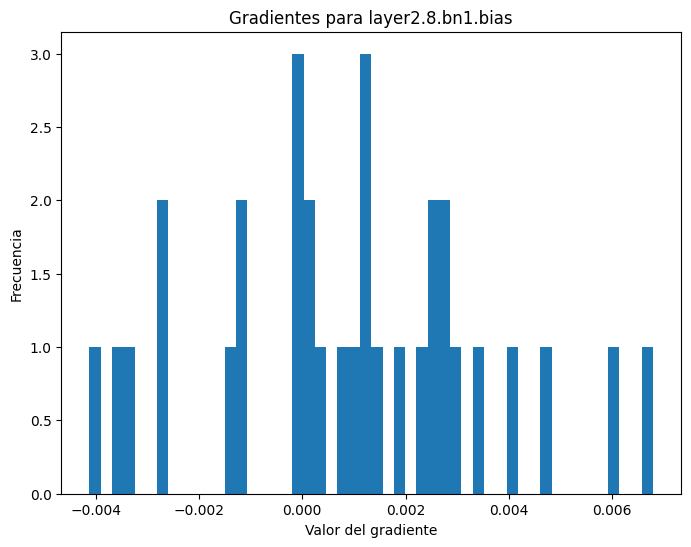

Gradientes para linear.weight: min=-0.05983166769146919, max=0.05441088229417801, mean=0.0, std=0.011120547540485859


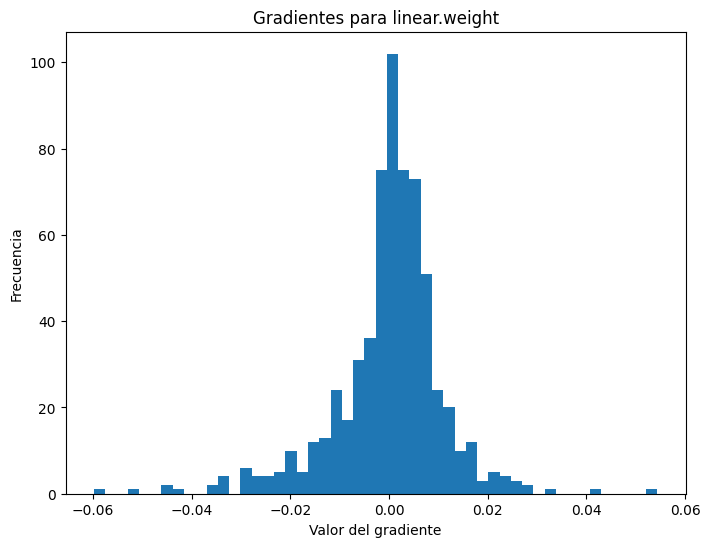

Gradientes para linear.bias: min=-0.03525147587060928, max=0.02020018734037876, mean=-1.3038515822572094e-09, std=0.01805027574300766


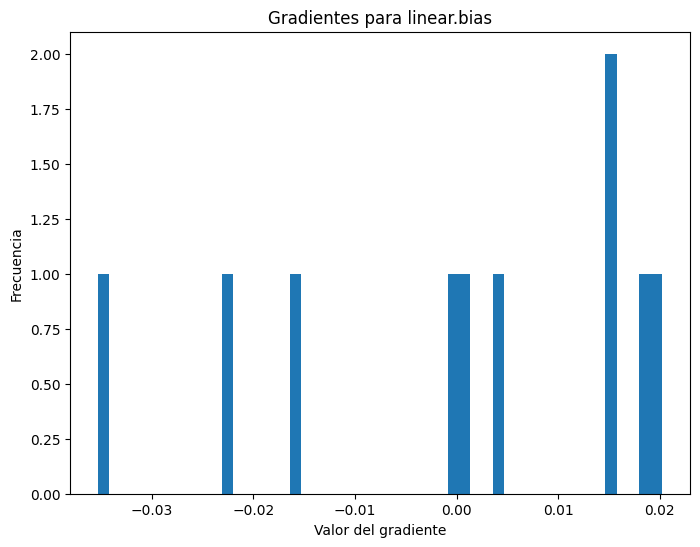

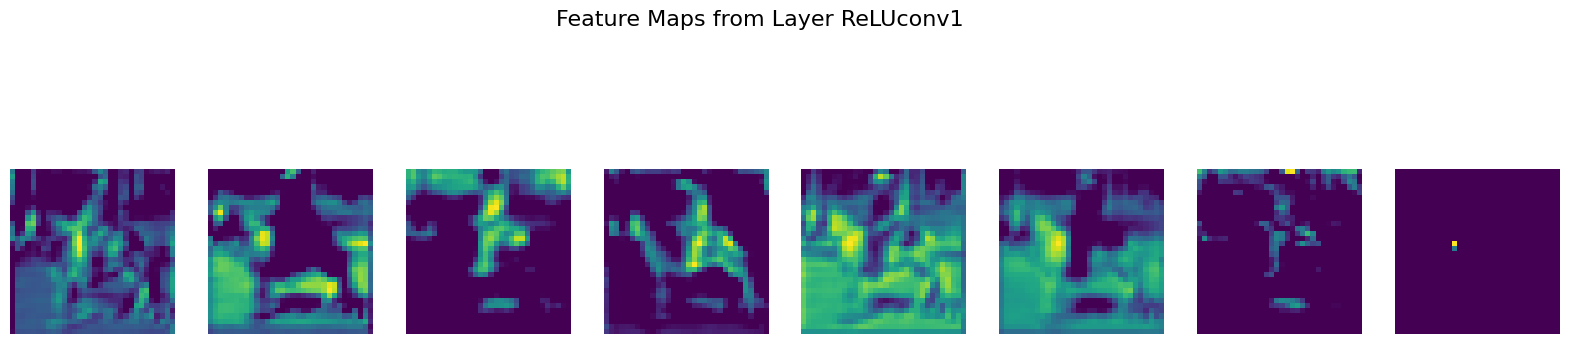

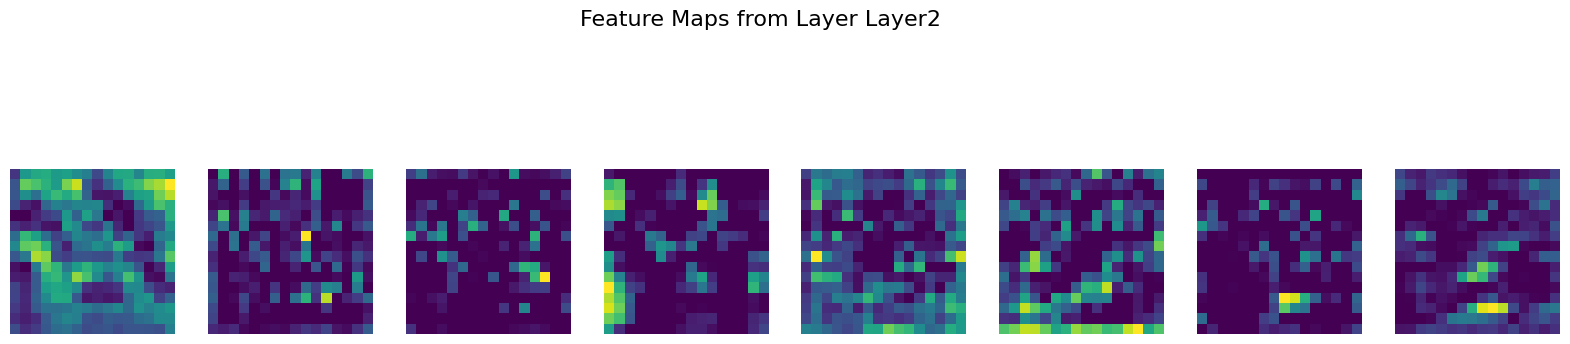

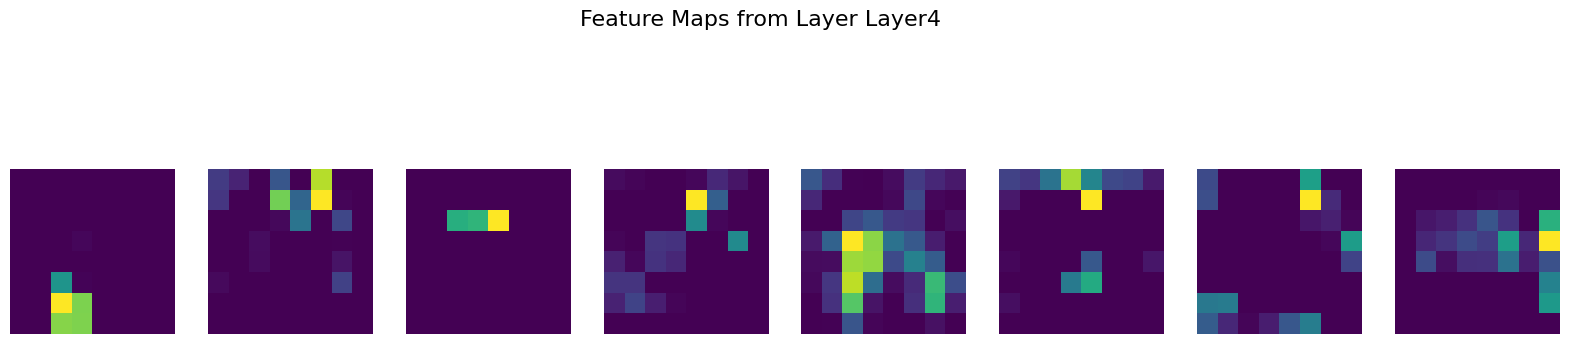

0.04
Epoch 11/70
Iteración 3555 - Lote 35/352 - Pérdida de Entrenamiento: 0.8446, Precisión de Entrenamiento: 0.7065
Iteración 3590 - Lote 70/352 - Pérdida de Entrenamiento: 0.8524, Precisión de Entrenamiento: 0.7006
Iteración 3625 - Lote 105/352 - Pérdida de Entrenamiento: 0.8528, Precisión de Entrenamiento: 0.7017
Iteración 3660 - Lote 140/352 - Pérdida de Entrenamiento: 0.8517, Precisión de Entrenamiento: 0.7008
Iteración 3695 - Lote 175/352 - Pérdida de Entrenamiento: 0.8556, Precisión de Entrenamiento: 0.6995
Iteración 3730 - Lote 210/352 - Pérdida de Entrenamiento: 0.8574, Precisión de Entrenamiento: 0.6997
Iteración 3765 - Lote 245/352 - Pérdida de Entrenamiento: 0.8528, Precisión de Entrenamiento: 0.7016
Iteración 3800 - Lote 280/352 - Pérdida de Entrenamiento: 0.8500, Precisión de Entrenamiento: 0.7026
Iteración 3835 - Lote 315/352 - Pérdida de Entrenamiento: 0.8436, Precisión de Entrenamiento: 0.7044
Iteración 3870 - Lote 350/352 - Pérdida de Entrenamiento: 0.8457, Precisión 

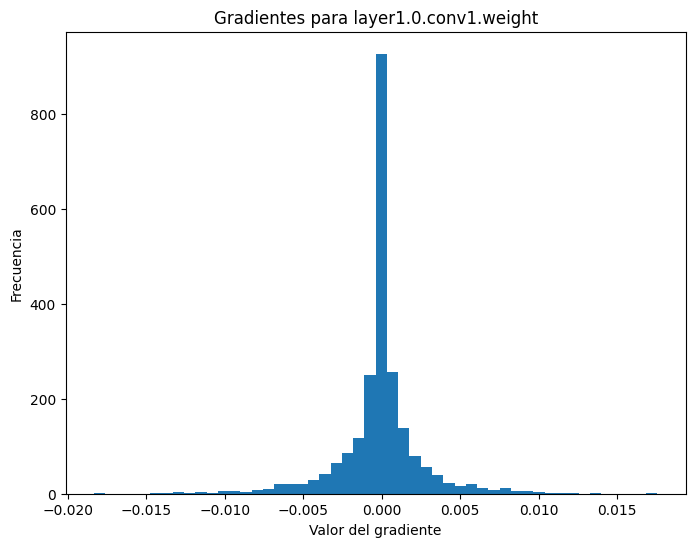

Gradientes para layer1.0.bn1.weight: min=-0.018066173419356346, max=0.009027314372360706, mean=-0.0040580215863883495, std=0.007119365967810154


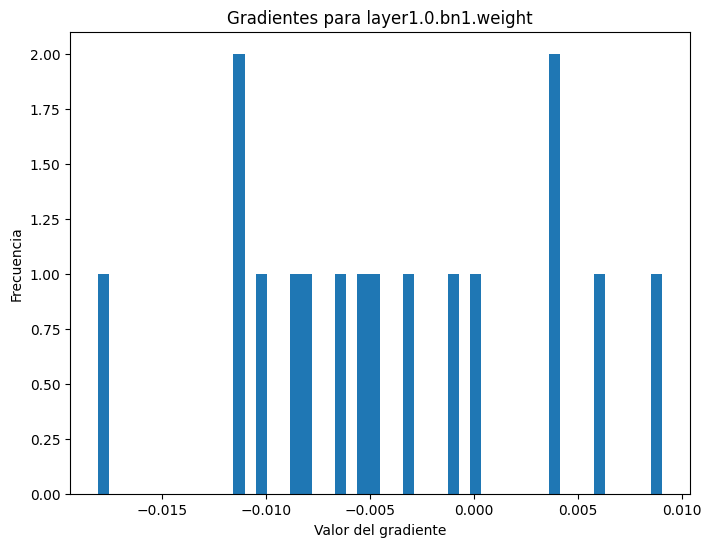

Gradientes para layer1.0.bn1.bias: min=-0.012058025225996971, max=0.02908974140882492, mean=0.0003584134392440319, std=0.010963404551148415


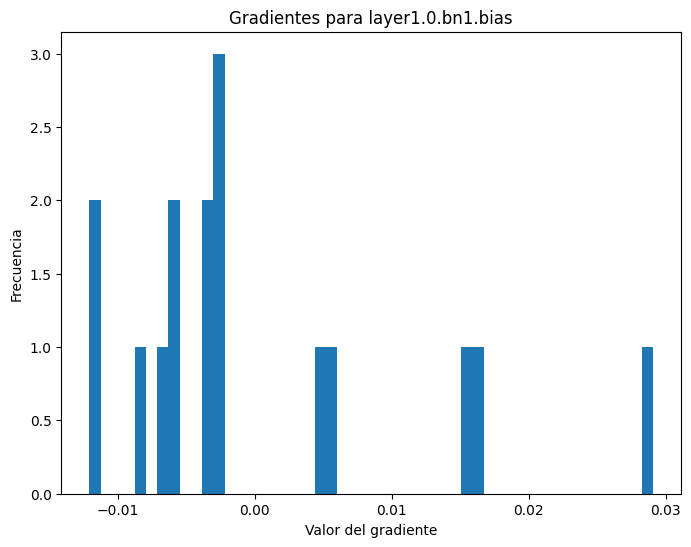

Gradientes para layer2.8.conv1.weight: min=-0.015487669967114925, max=0.012153592891991138, mean=3.4478463931009173e-05, std=0.0012728824513033032


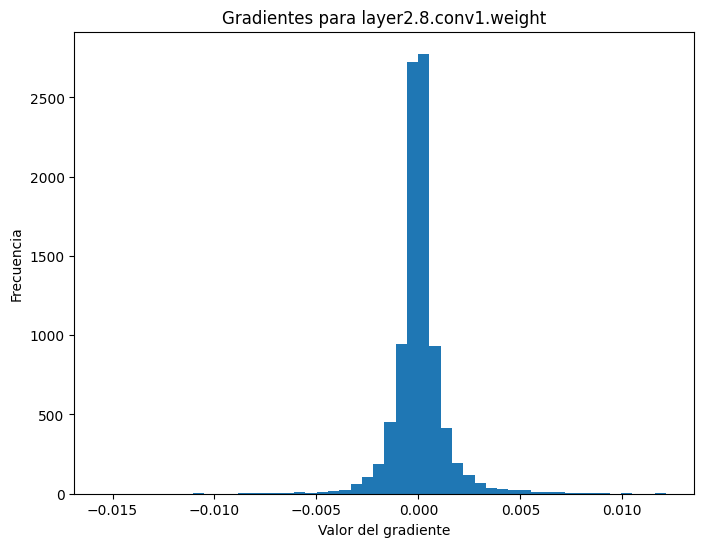

Gradientes para layer2.8.bn1.weight: min=-0.004145064391195774, max=0.007368378806859255, mean=8.791151049081236e-05, std=0.002409315435215831


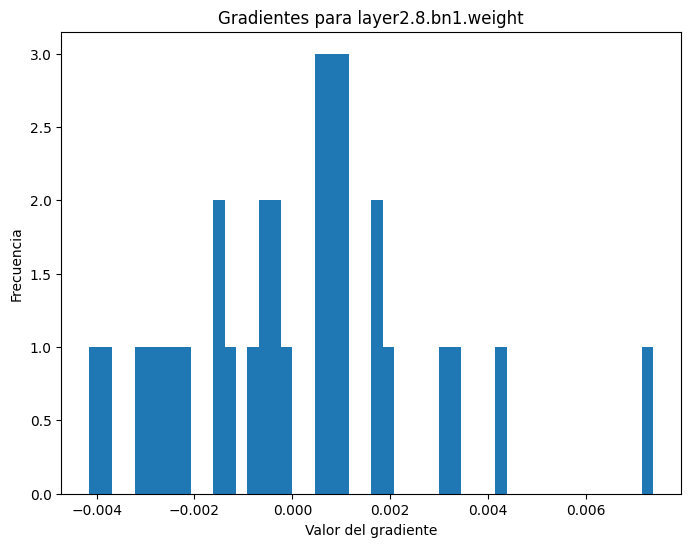

Gradientes para layer2.8.bn1.bias: min=-0.004383664578199387, max=0.006897878833115101, mean=0.00029803364304825664, std=0.0028946194797754288


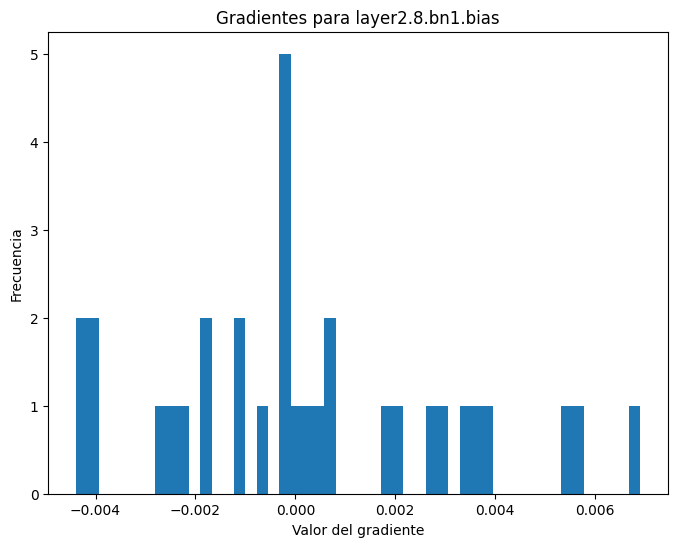

Gradientes para linear.weight: min=-0.06240874156355858, max=0.04583565890789032, mean=7.450580707946131e-10, std=0.013366195373237133


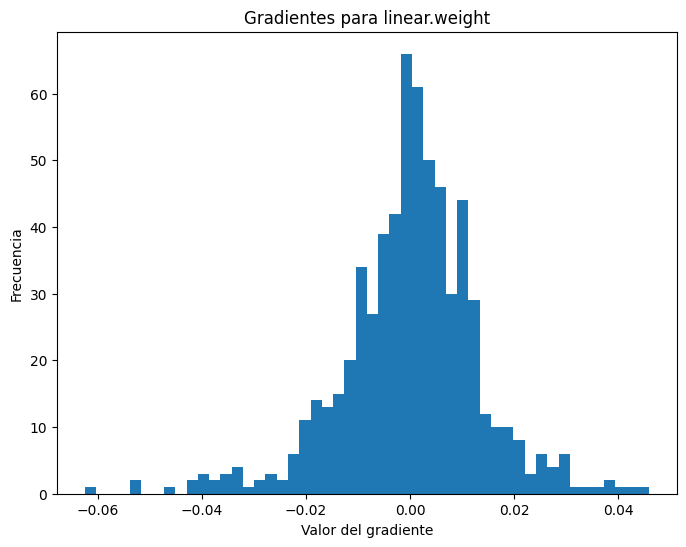

Gradientes para linear.bias: min=-0.029438313096761703, max=0.020700782537460327, mean=1.7695128695649487e-09, std=0.018477600067853928


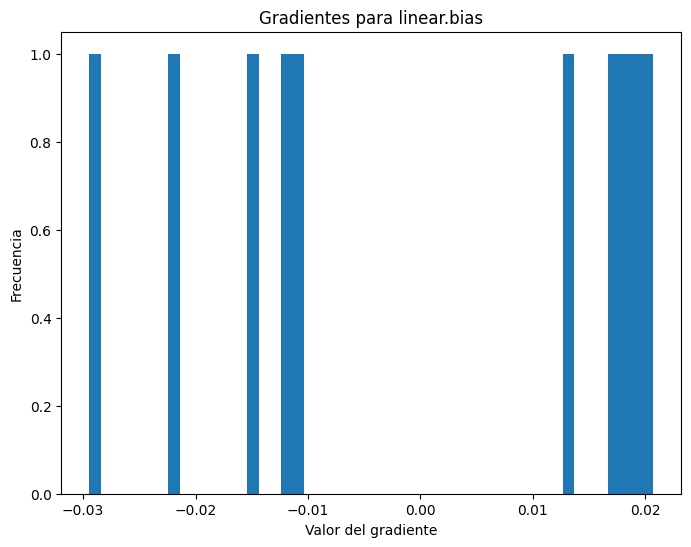

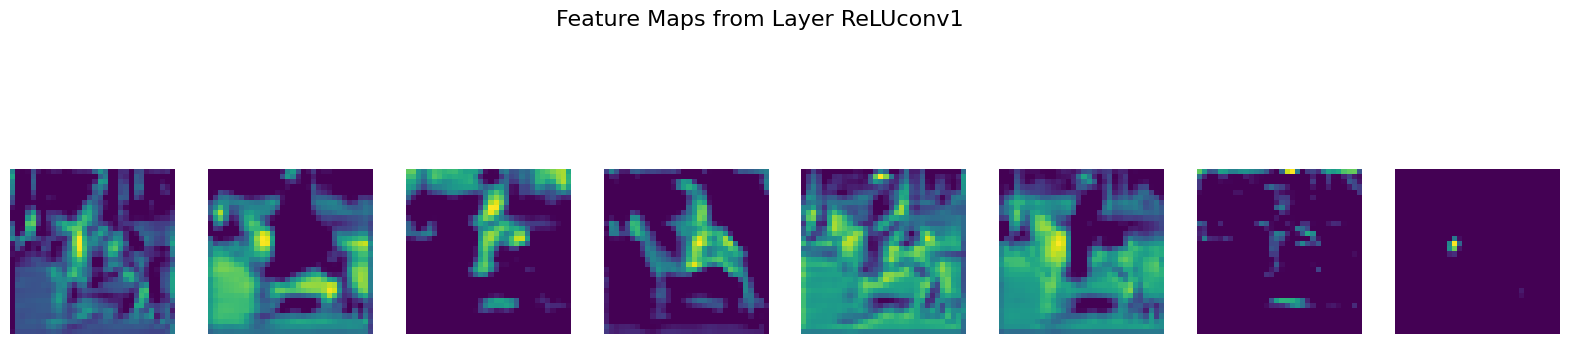

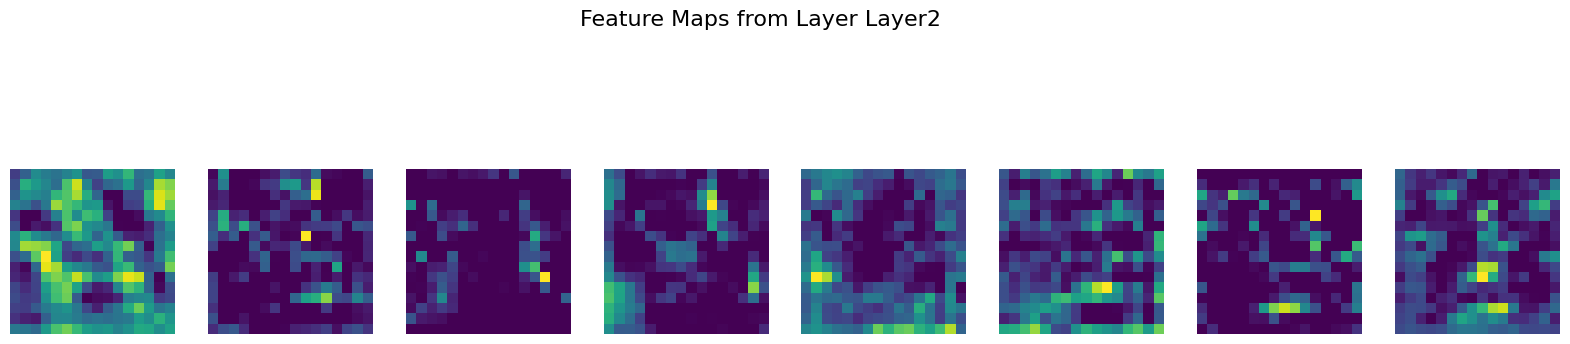

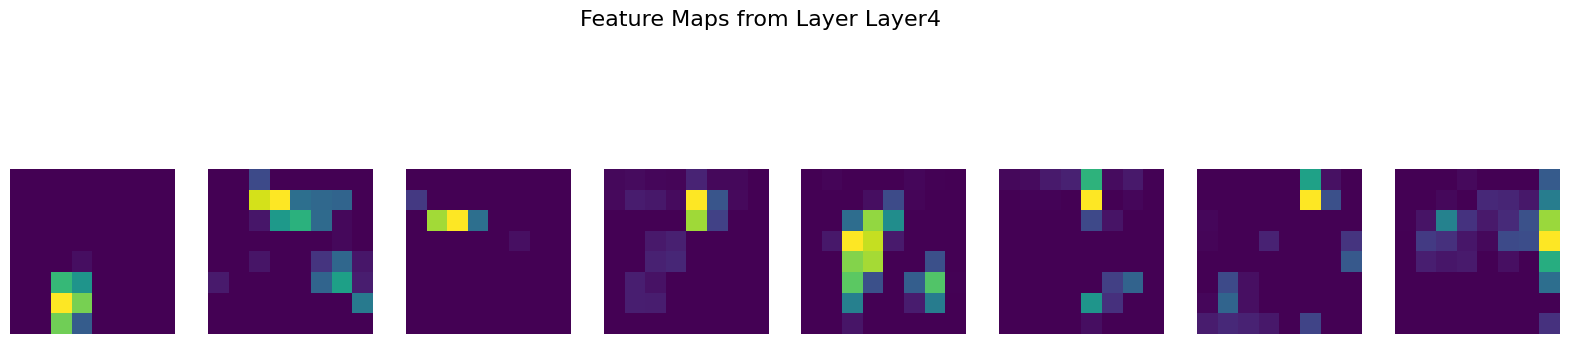

0.04
Epoch 16/70
Iteración 5315 - Lote 35/352 - Pérdida de Entrenamiento: 0.6290, Precisión de Entrenamiento: 0.7801
Iteración 5350 - Lote 70/352 - Pérdida de Entrenamiento: 0.6419, Precisión de Entrenamiento: 0.7752
Iteración 5385 - Lote 105/352 - Pérdida de Entrenamiento: 0.6510, Precisión de Entrenamiento: 0.7714
Iteración 5420 - Lote 140/352 - Pérdida de Entrenamiento: 0.6518, Precisión de Entrenamiento: 0.7704
Iteración 5455 - Lote 175/352 - Pérdida de Entrenamiento: 0.6507, Precisión de Entrenamiento: 0.7727
Iteración 5490 - Lote 210/352 - Pérdida de Entrenamiento: 0.6550, Precisión de Entrenamiento: 0.7711
Iteración 5525 - Lote 245/352 - Pérdida de Entrenamiento: 0.6542, Precisión de Entrenamiento: 0.7712
Iteración 5560 - Lote 280/352 - Pérdida de Entrenamiento: 0.6510, Precisión de Entrenamiento: 0.7724
Iteración 5595 - Lote 315/352 - Pérdida de Entrenamiento: 0.6493, Precisión de Entrenamiento: 0.7728
Iteración 5630 - Lote 350/352 - Pérdida de Entrenamiento: 0.6483, Precisión 

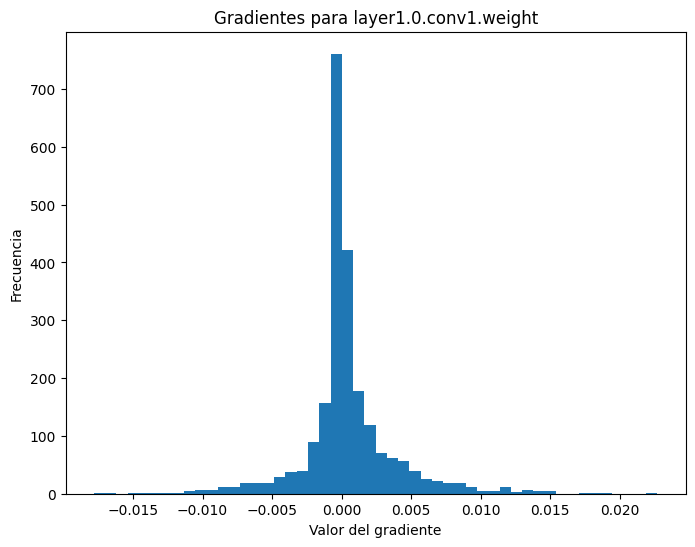

Gradientes para layer1.0.bn1.weight: min=-0.030256856232881546, max=0.019430045038461685, mean=0.00017201900482177734, std=0.014926619827747345


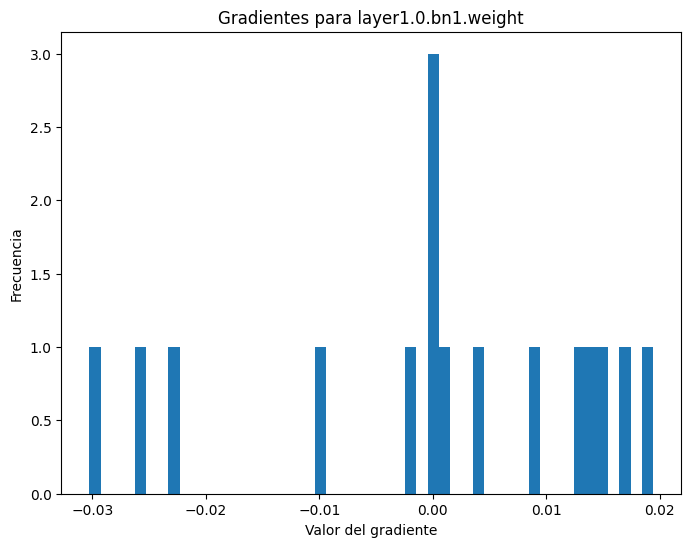

Gradientes para layer1.0.bn1.bias: min=-0.02275325544178486, max=0.01096012257039547, mean=-0.0012551764957606792, std=0.009732278995215893


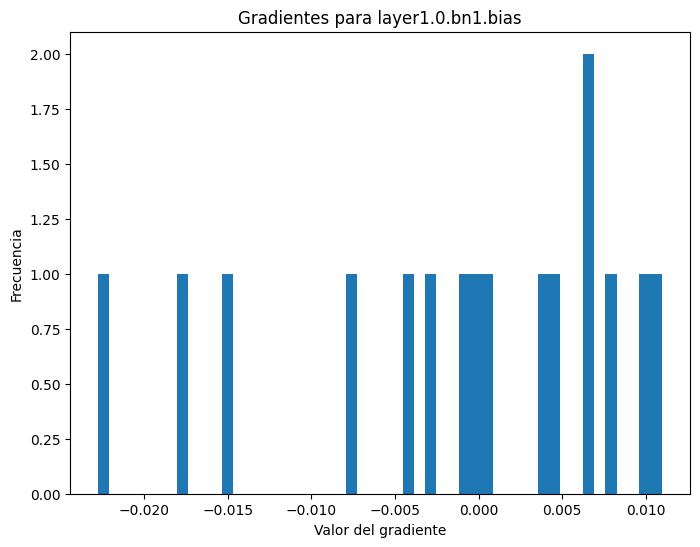

Gradientes para layer2.8.conv1.weight: min=-0.015004001557826996, max=0.01368044875562191, mean=2.512551873223856e-05, std=0.001605886616744101


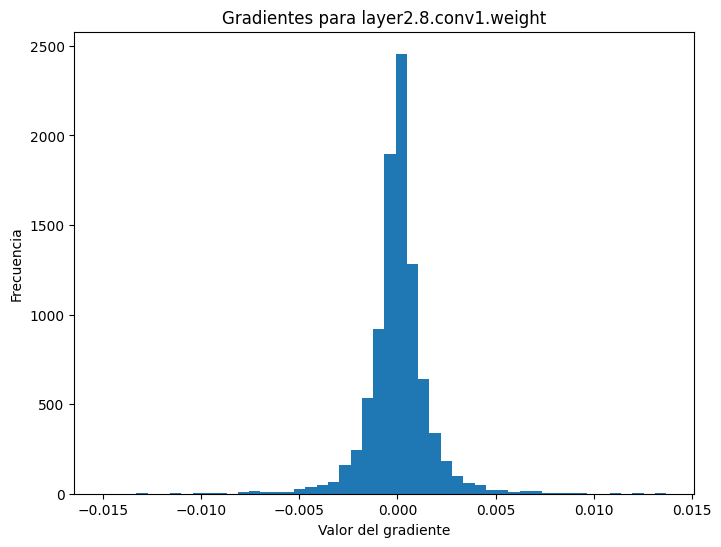

Gradientes para layer2.8.bn1.weight: min=-0.011711870320141315, max=0.0062798308208584785, mean=8.47649498609826e-05, std=0.003190661082044244


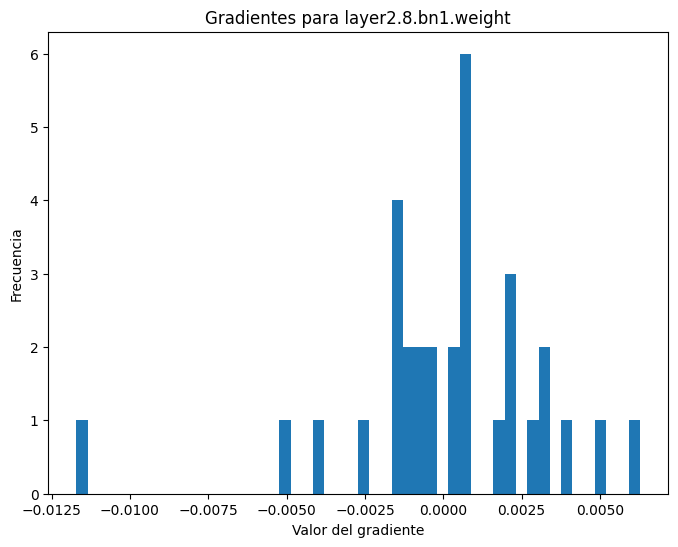

Gradientes para layer2.8.bn1.bias: min=-0.011171959340572357, max=0.00851431954652071, mean=-0.0005011259927414358, std=0.004297480918467045


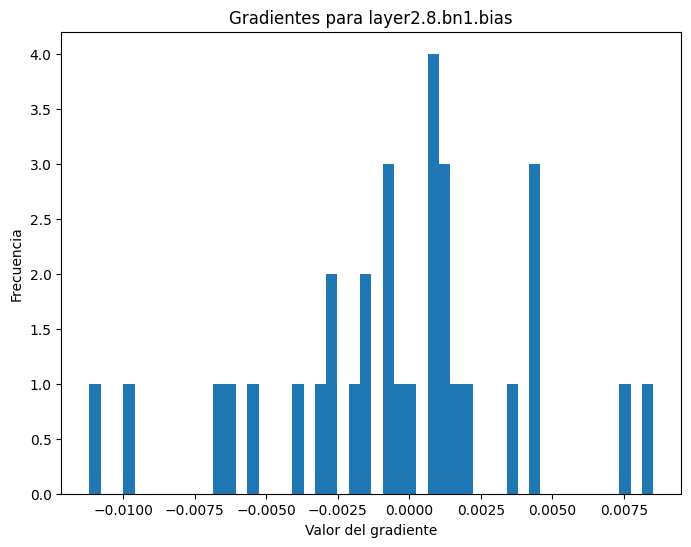

Gradientes para linear.weight: min=-0.06309925019741058, max=0.049397170543670654, mean=1.8626451769865326e-10, std=0.016052231192588806


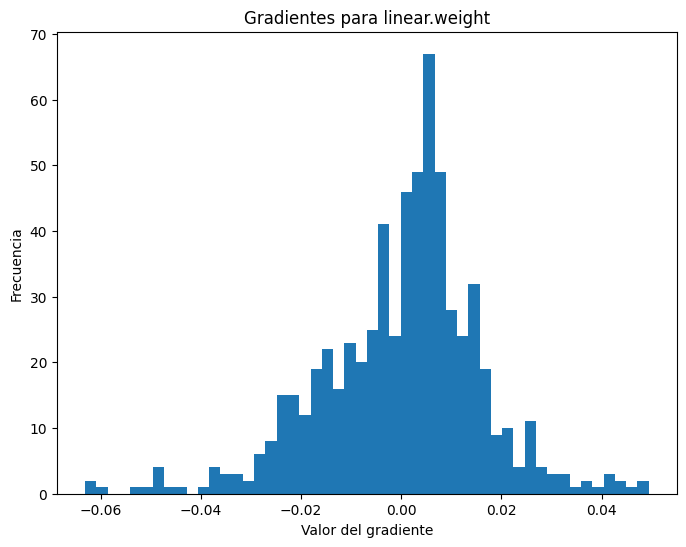

Gradientes para linear.bias: min=-0.04104733467102051, max=0.033074140548706055, mean=1.862645149230957e-09, std=0.027284234762191772


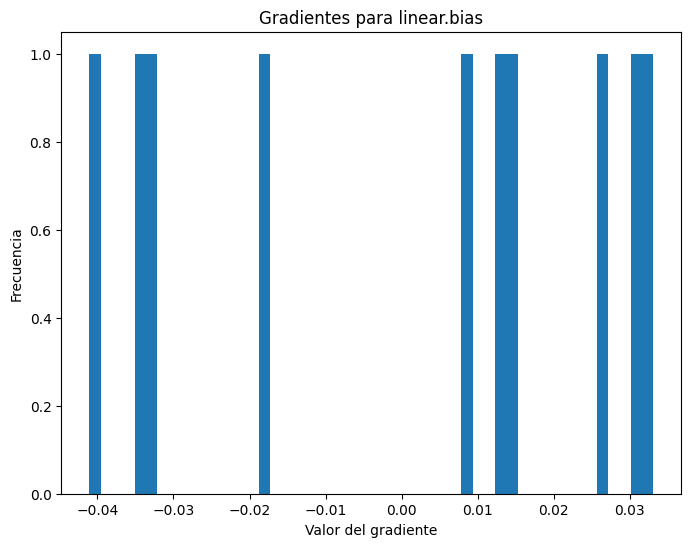

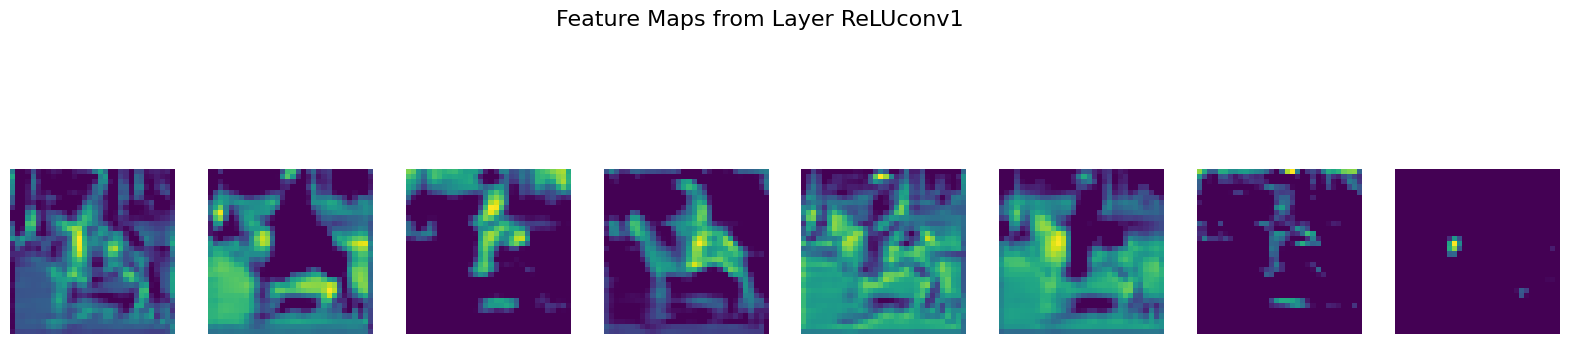

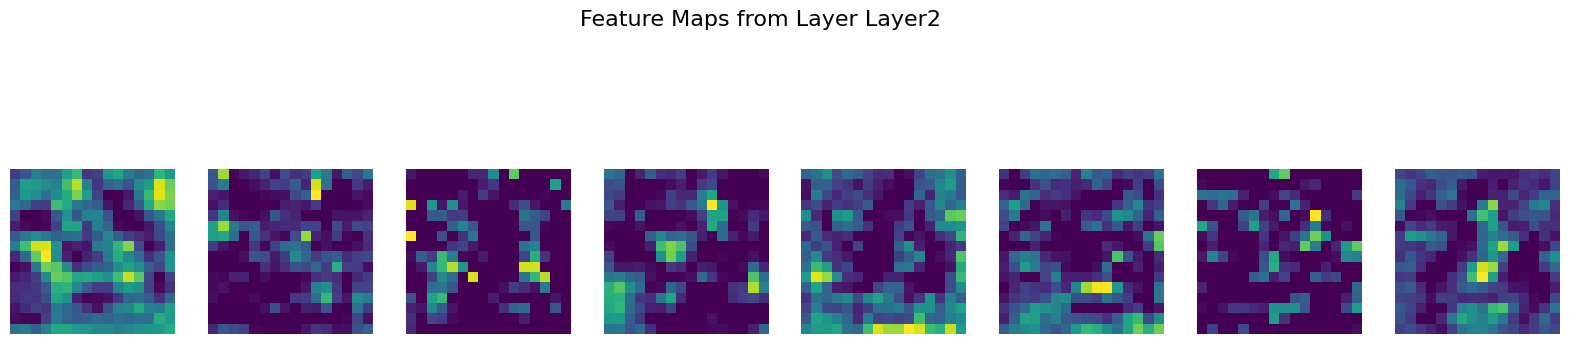

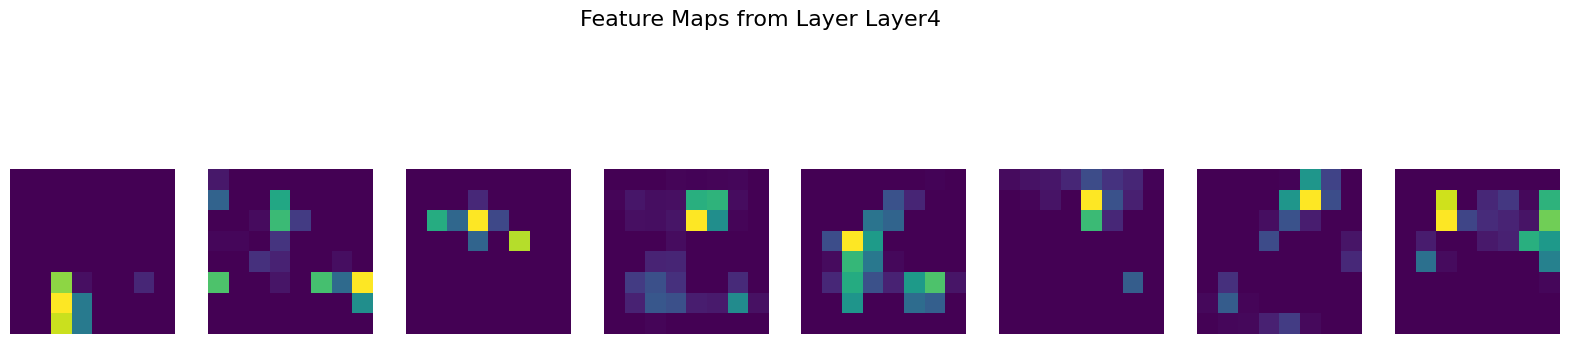

0.04
Epoch 21/70
Iteración 7075 - Lote 35/352 - Pérdida de Entrenamiento: 0.5566, Precisión de Entrenamiento: 0.8112
Iteración 7110 - Lote 70/352 - Pérdida de Entrenamiento: 0.5523, Precisión de Entrenamiento: 0.8121
Iteración 7145 - Lote 105/352 - Pérdida de Entrenamiento: 0.5481, Precisión de Entrenamiento: 0.8135
Iteración 7180 - Lote 140/352 - Pérdida de Entrenamiento: 0.5458, Precisión de Entrenamiento: 0.8128
Iteración 7215 - Lote 175/352 - Pérdida de Entrenamiento: 0.5436, Precisión de Entrenamiento: 0.8126
Iteración 7250 - Lote 210/352 - Pérdida de Entrenamiento: 0.5411, Precisión de Entrenamiento: 0.8126
Iteración 7285 - Lote 245/352 - Pérdida de Entrenamiento: 0.5407, Precisión de Entrenamiento: 0.8121
Iteración 7320 - Lote 280/352 - Pérdida de Entrenamiento: 0.5375, Precisión de Entrenamiento: 0.8130
Iteración 7355 - Lote 315/352 - Pérdida de Entrenamiento: 0.5374, Precisión de Entrenamiento: 0.8133
Iteración 7390 - Lote 350/352 - Pérdida de Entrenamiento: 0.5369, Precisión 

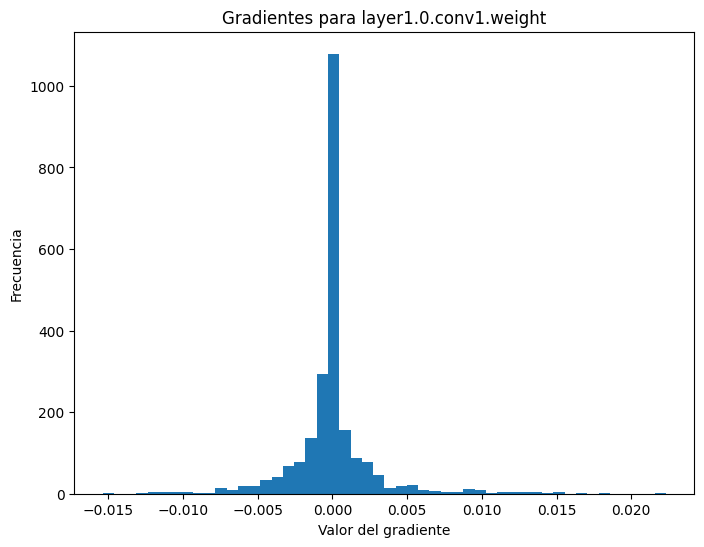

Gradientes para layer1.0.bn1.weight: min=-0.01209751795977354, max=0.018205460160970688, mean=-0.0016532244626432657, std=0.006832433398813009


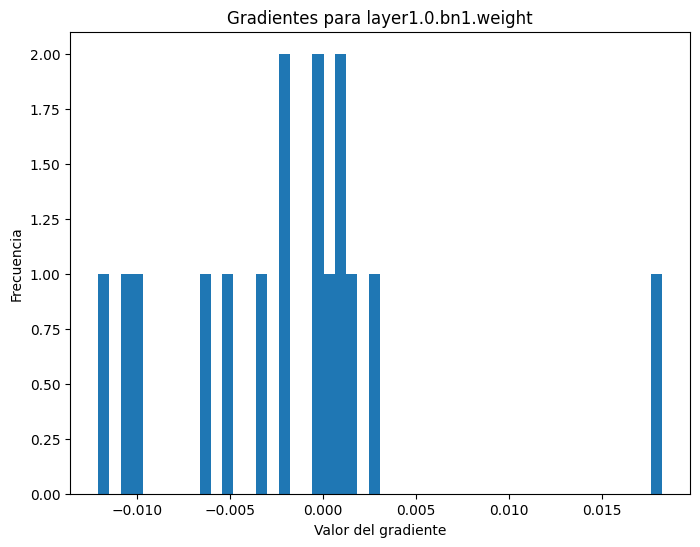

Gradientes para layer1.0.bn1.bias: min=-0.011644916608929634, max=0.015273951925337315, mean=-0.000466595811303705, std=0.0076443166472017765


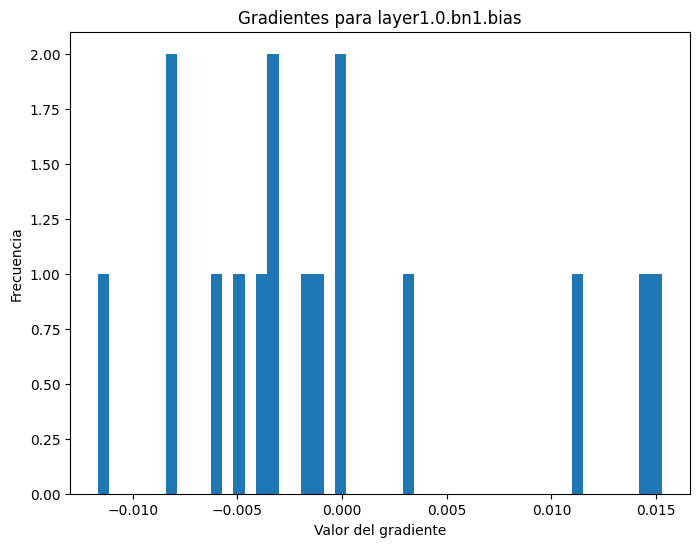

Gradientes para layer2.8.conv1.weight: min=-0.011441262438893318, max=0.009794975630939007, mean=-2.755081732175313e-05, std=0.0011231214739382267


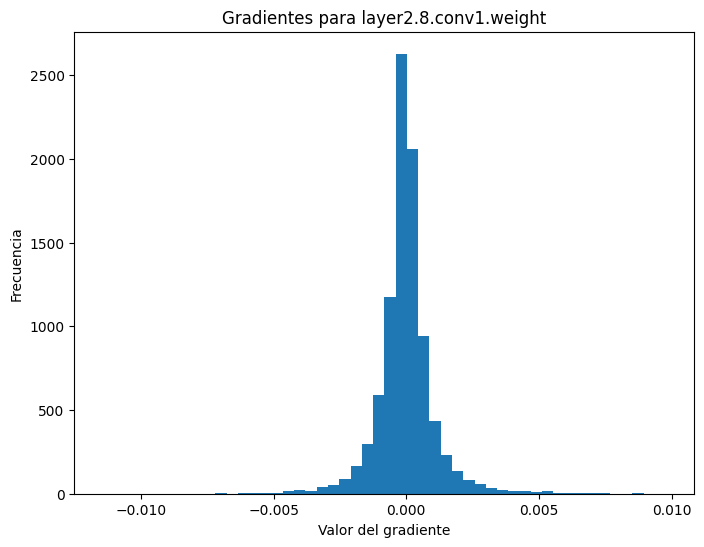

Gradientes para layer2.8.bn1.weight: min=-0.005949134938418865, max=0.005330540705472231, mean=-2.4506814952474087e-05, std=0.002552879275754094


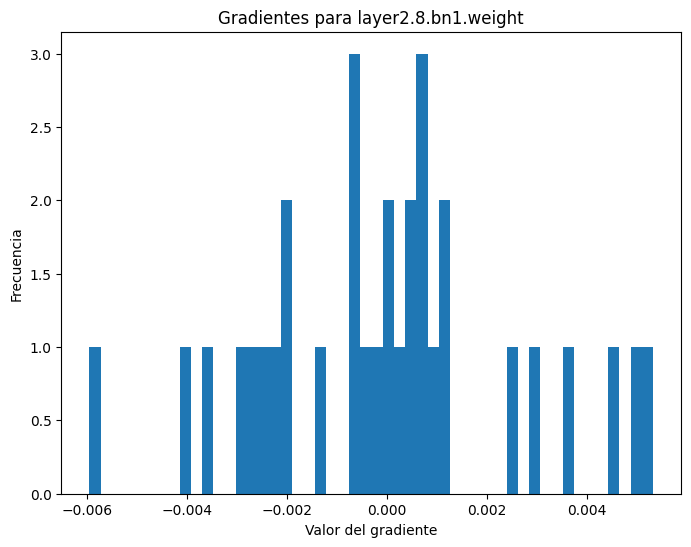

Gradientes para layer2.8.bn1.bias: min=-0.006193107459694147, max=0.004908823873847723, mean=0.00010748515342129394, std=0.0027976289857178926


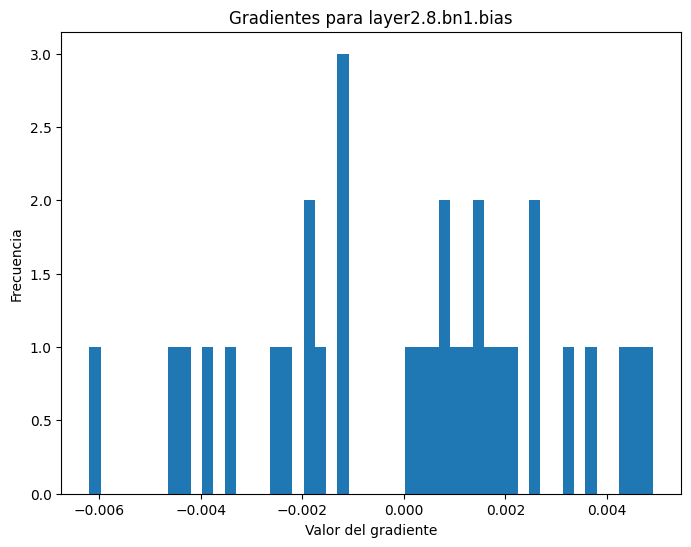

Gradientes para linear.weight: min=-0.06866896152496338, max=0.05748177692294121, mean=7.450580707946131e-10, std=0.014232710935175419


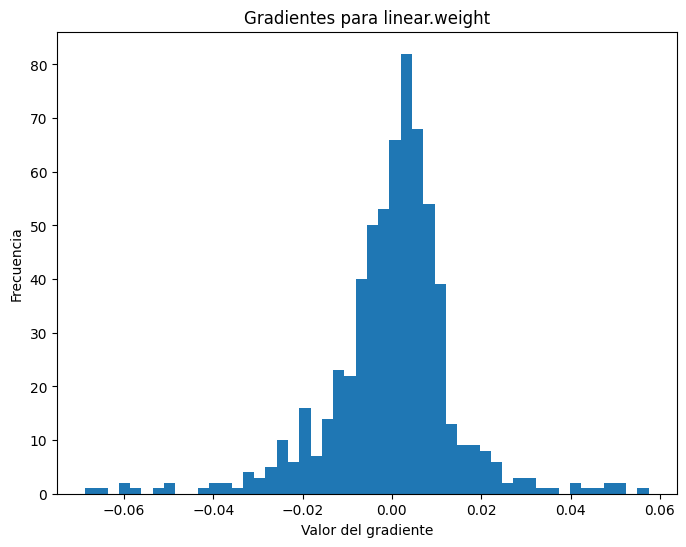

Gradientes para linear.bias: min=-0.03942100331187248, max=0.03897540271282196, mean=1.4901161415892261e-09, std=0.022950567305088043


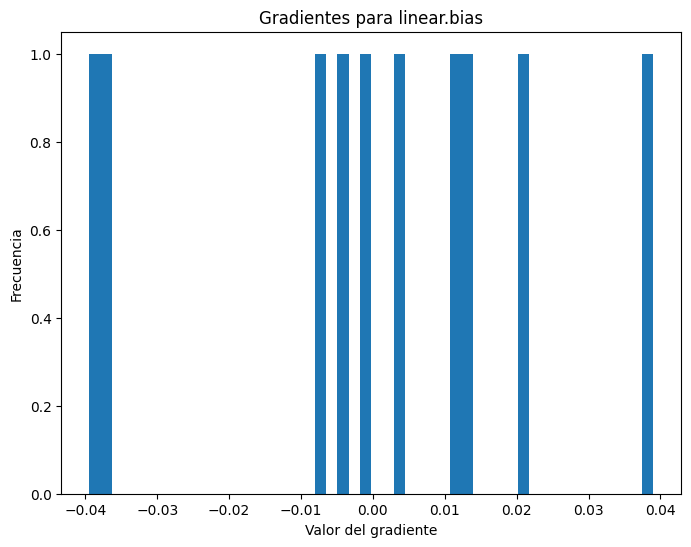

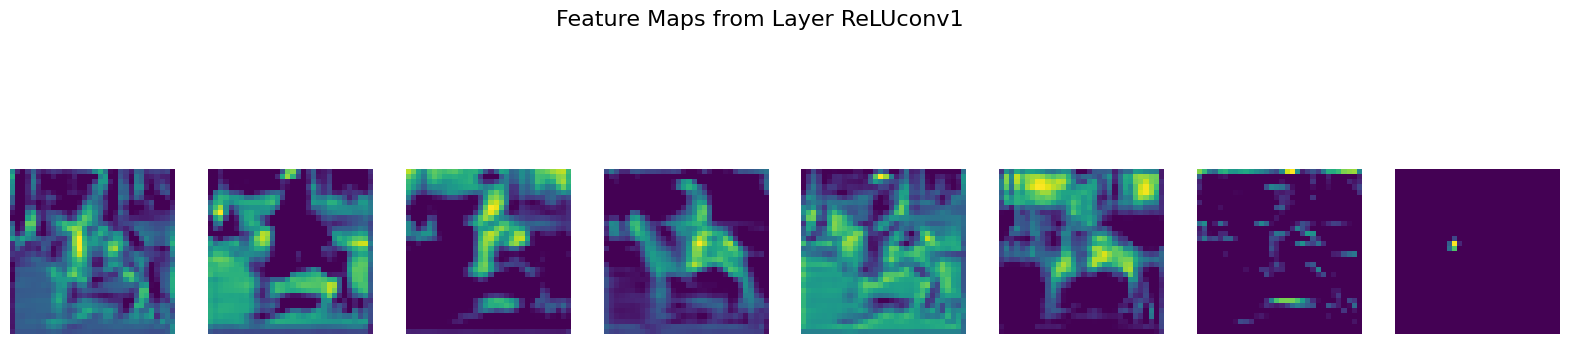

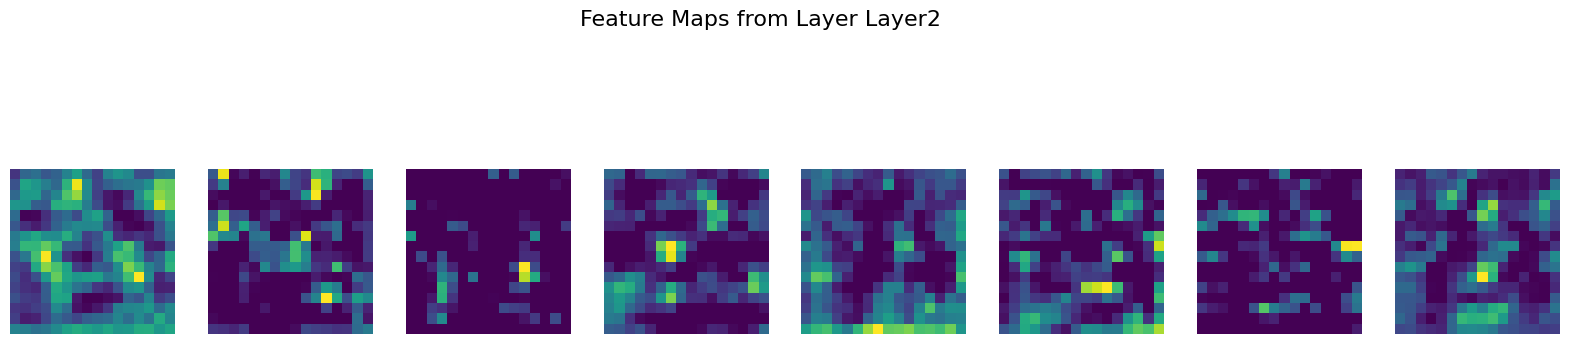

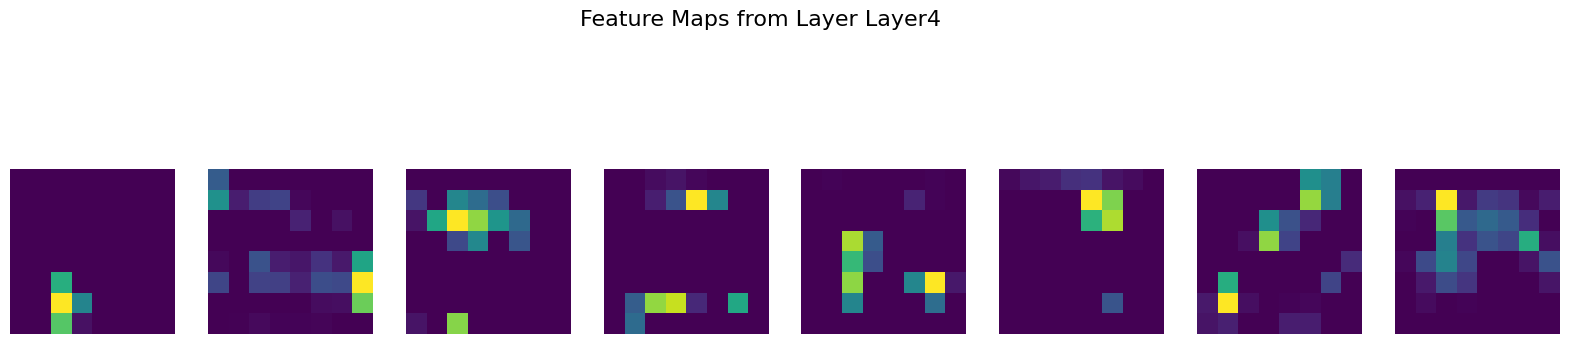

0.04
Epoch 26/70
Iteración 8835 - Lote 35/352 - Pérdida de Entrenamiento: 0.4537, Precisión de Entrenamiento: 0.8449
Iteración 8870 - Lote 70/352 - Pérdida de Entrenamiento: 0.4594, Precisión de Entrenamiento: 0.8433
Iteración 8905 - Lote 105/352 - Pérdida de Entrenamiento: 0.4649, Precisión de Entrenamiento: 0.8409
Iteración 8940 - Lote 140/352 - Pérdida de Entrenamiento: 0.4631, Precisión de Entrenamiento: 0.8393
Iteración 8975 - Lote 175/352 - Pérdida de Entrenamiento: 0.4592, Precisión de Entrenamiento: 0.8408
Iteración 9010 - Lote 210/352 - Pérdida de Entrenamiento: 0.4667, Precisión de Entrenamiento: 0.8385
Iteración 9045 - Lote 245/352 - Pérdida de Entrenamiento: 0.4657, Precisión de Entrenamiento: 0.8386
Iteración 9080 - Lote 280/352 - Pérdida de Entrenamiento: 0.4654, Precisión de Entrenamiento: 0.8385
Iteración 9115 - Lote 315/352 - Pérdida de Entrenamiento: 0.4661, Precisión de Entrenamiento: 0.8385
Iteración 9150 - Lote 350/352 - Pérdida de Entrenamiento: 0.4662, Precisión 

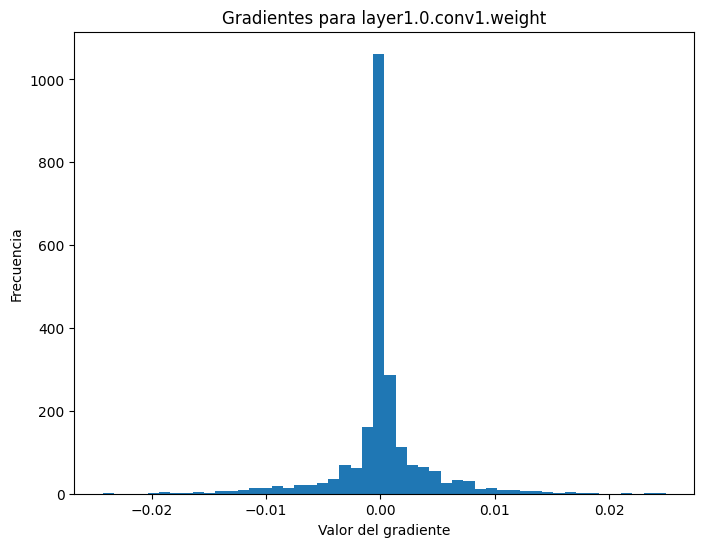

Gradientes para layer1.0.bn1.weight: min=-0.015675455331802368, max=0.05893591418862343, mean=0.0017007593996822834, std=0.016520965844392776


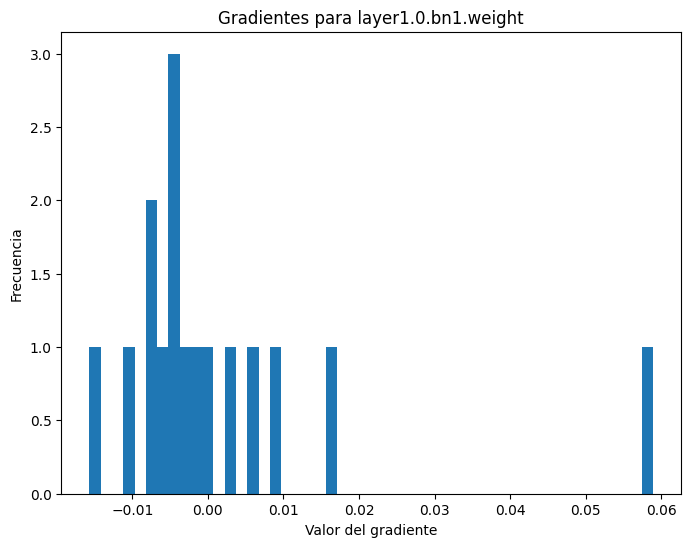

Gradientes para layer1.0.bn1.bias: min=-0.03662144020199776, max=0.025568466633558273, mean=-0.004433352500200272, std=0.01310796570032835


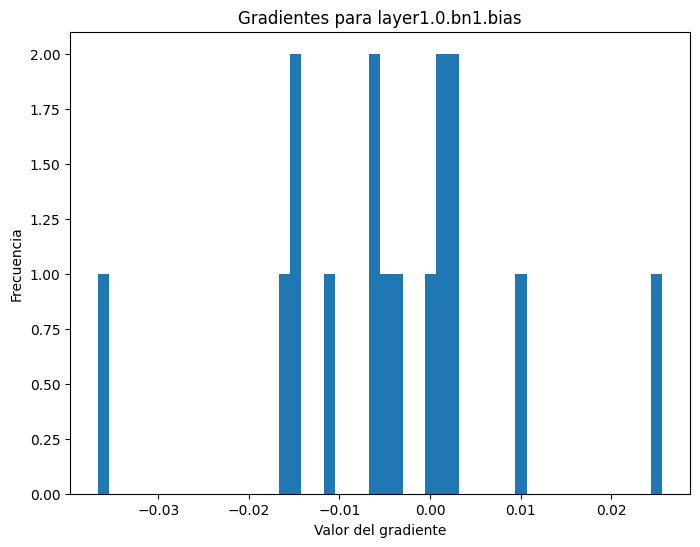

Gradientes para layer2.8.conv1.weight: min=-0.012996874749660492, max=0.012926495634019375, mean=-3.355311491759494e-05, std=0.0018246159888803959


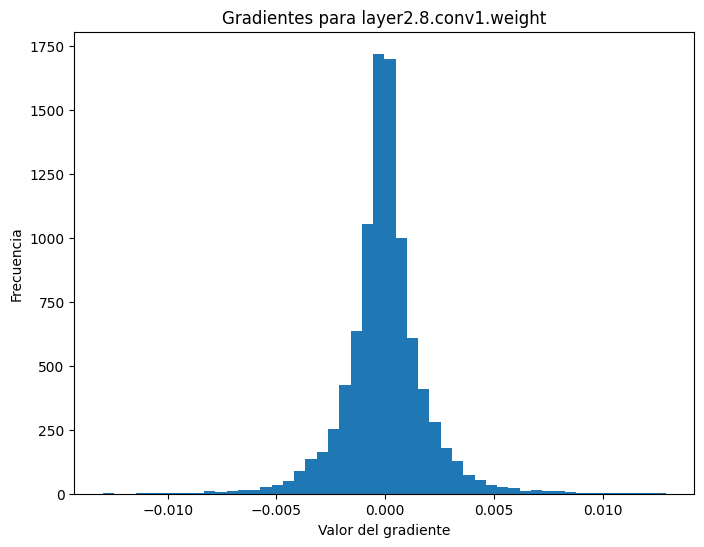

Gradientes para layer2.8.bn1.weight: min=-0.009551182389259338, max=0.00917809922248125, mean=0.0001968001015484333, std=0.004541424103081226


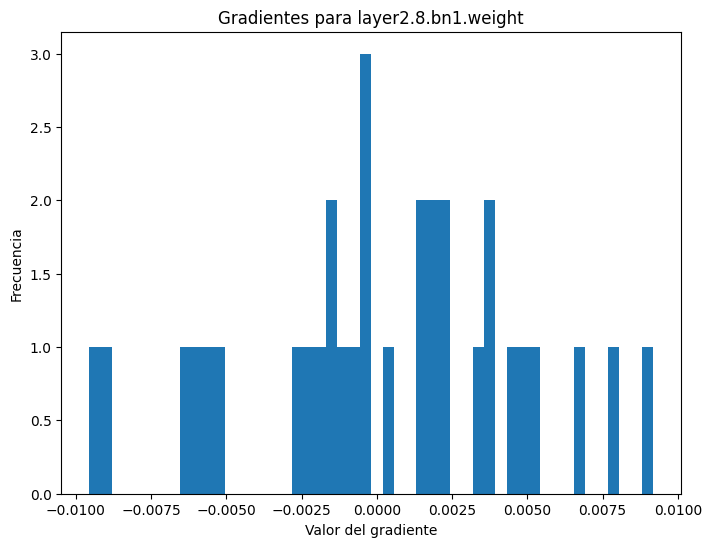

Gradientes para layer2.8.bn1.bias: min=-0.008208122104406357, max=0.009359065443277359, mean=0.0006899383151903749, std=0.003942105919122696


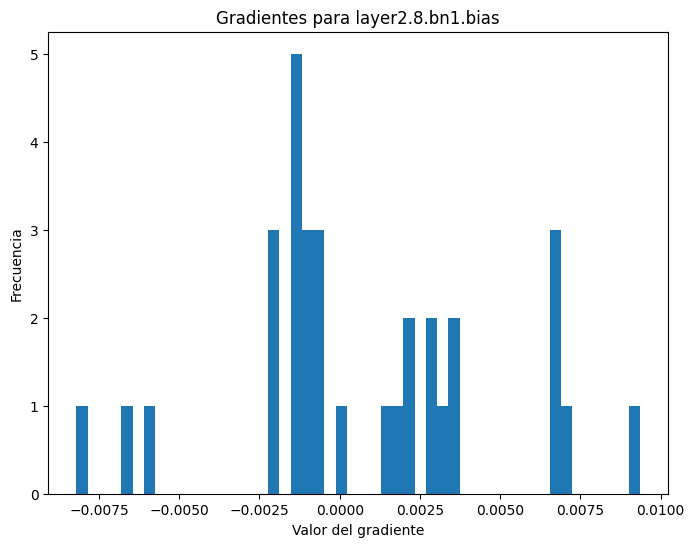

Gradientes para linear.weight: min=-0.05799054354429245, max=0.050486039370298386, mean=1.0244548542814869e-09, std=0.01344218011945486


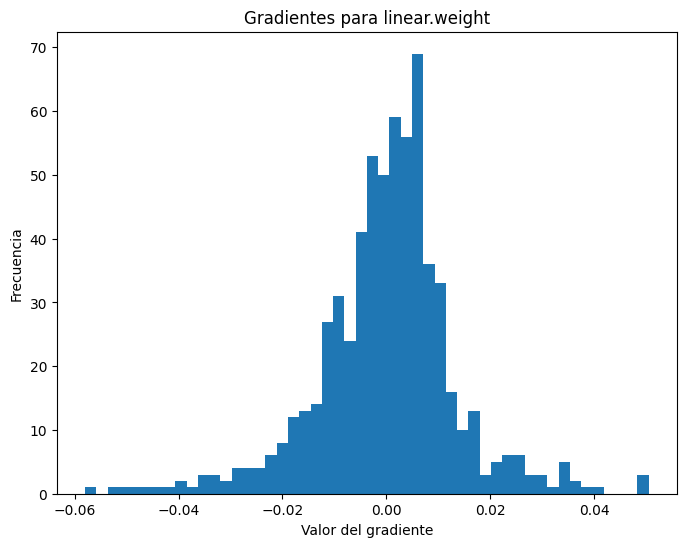

Gradientes para linear.bias: min=-0.03575397655367851, max=0.028108548372983932, mean=1.3969838619232178e-09, std=0.017196405678987503


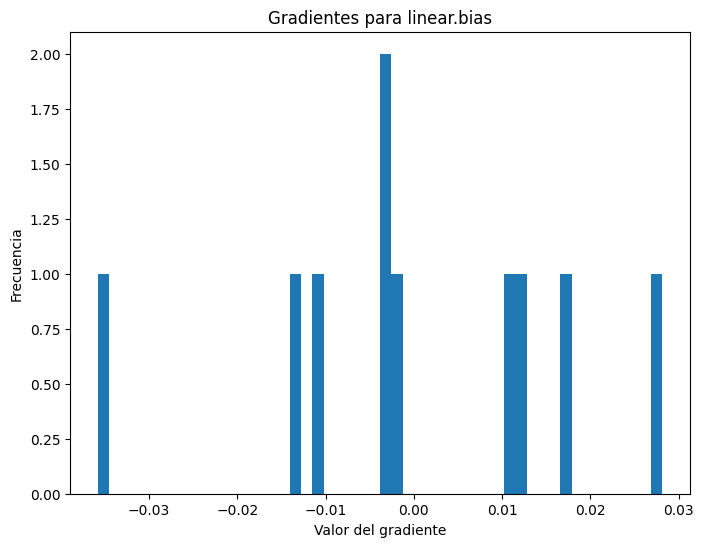

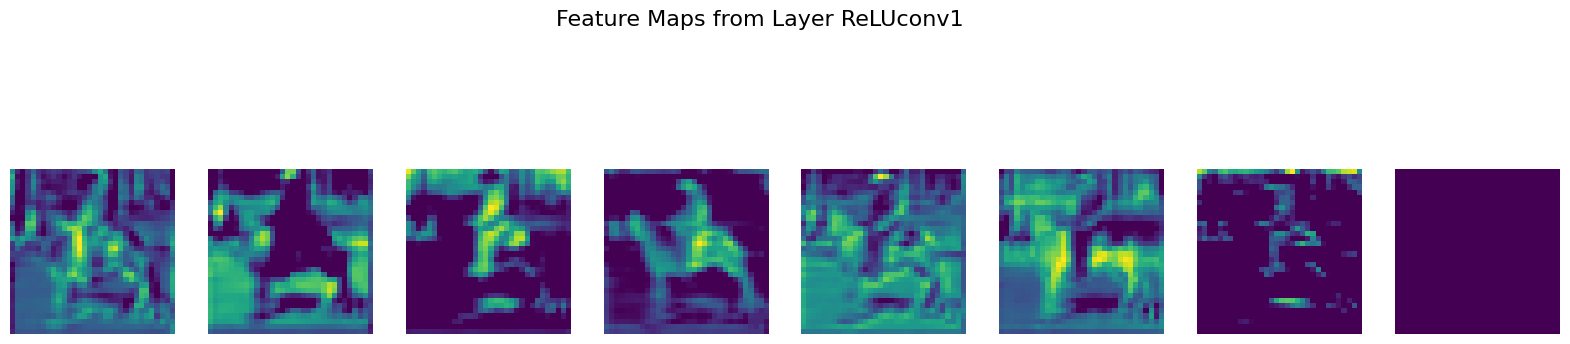

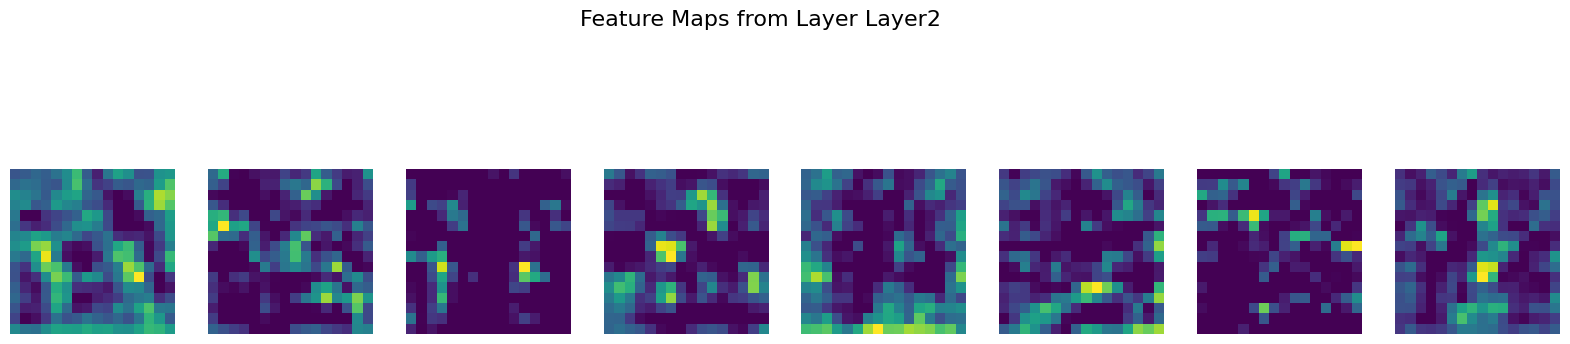

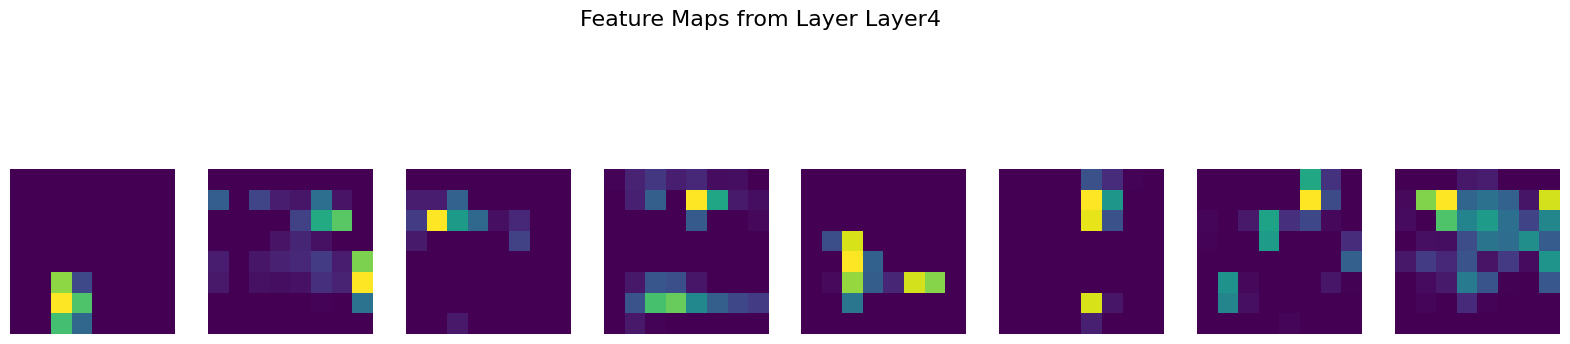

0.04
Epoch 31/70
Iteración 10595 - Lote 35/352 - Pérdida de Entrenamiento: 0.3871, Precisión de Entrenamiento: 0.8656
Iteración 10630 - Lote 70/352 - Pérdida de Entrenamiento: 0.3914, Precisión de Entrenamiento: 0.8645
Iteración 10665 - Lote 105/352 - Pérdida de Entrenamiento: 0.3908, Precisión de Entrenamiento: 0.8662
Iteración 10700 - Lote 140/352 - Pérdida de Entrenamiento: 0.3906, Precisión de Entrenamiento: 0.8651
Iteración 10735 - Lote 175/352 - Pérdida de Entrenamiento: 0.3945, Precisión de Entrenamiento: 0.8633
Iteración 10770 - Lote 210/352 - Pérdida de Entrenamiento: 0.3950, Precisión de Entrenamiento: 0.8637
Iteración 10805 - Lote 245/352 - Pérdida de Entrenamiento: 0.3932, Precisión de Entrenamiento: 0.8642
Iteración 10840 - Lote 280/352 - Pérdida de Entrenamiento: 0.3927, Precisión de Entrenamiento: 0.8642
Iteración 10875 - Lote 315/352 - Pérdida de Entrenamiento: 0.3934, Precisión de Entrenamiento: 0.8645
Iteración 10910 - Lote 350/352 - Pérdida de Entrenamiento: 0.3902, 

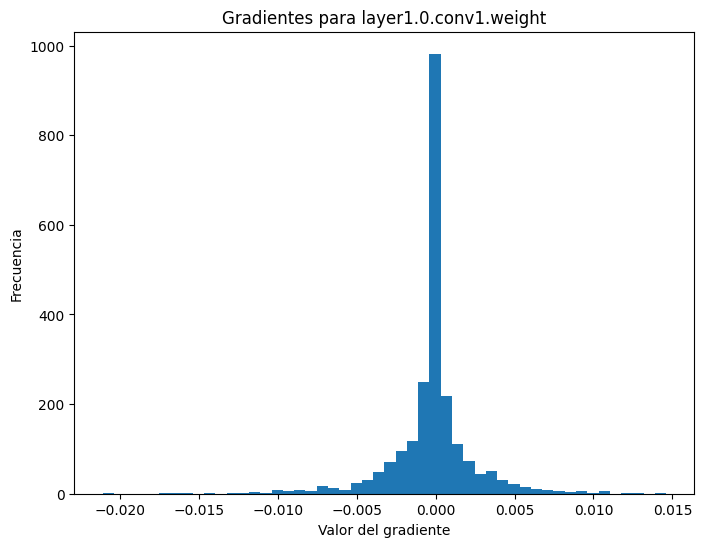

Gradientes para layer1.0.bn1.weight: min=-0.022645678371191025, max=0.015109268948435783, mean=-0.0017929523019120097, std=0.01279156468808651


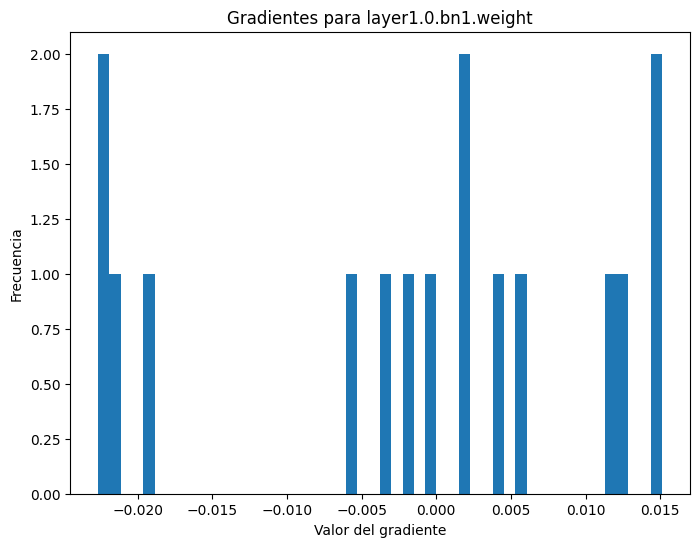

Gradientes para layer1.0.bn1.bias: min=-0.01996248960494995, max=0.018720317631959915, mean=0.00015141803305596113, std=0.011280548758804798


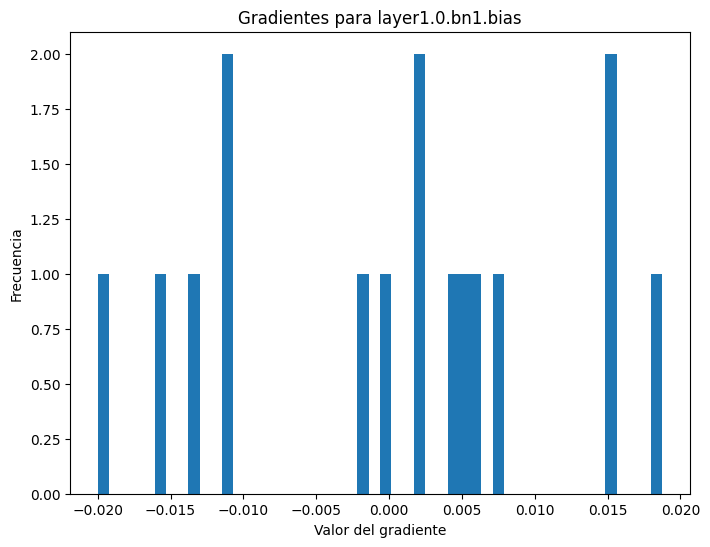

Gradientes para linear.weight: min=-0.09956911206245422, max=0.07408015429973602, mean=3.7252903539730653e-10, std=0.013366884551942348


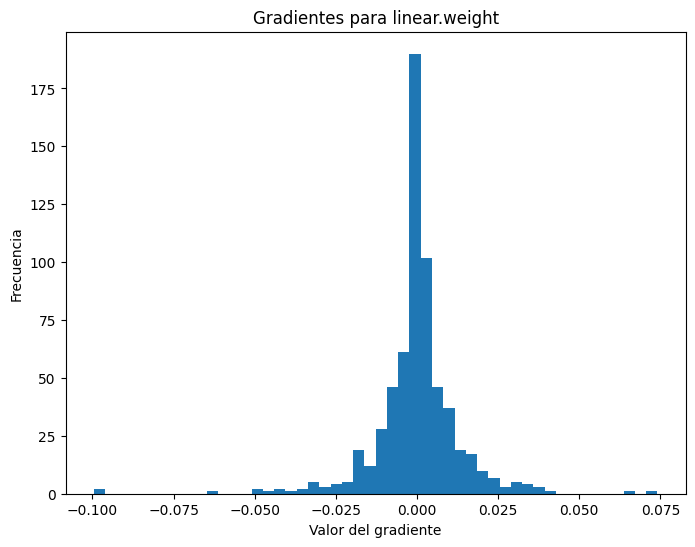

Gradientes para linear.bias: min=-0.037983592599630356, max=0.019274771213531494, mean=1.0244548542814869e-09, std=0.0167160052806139


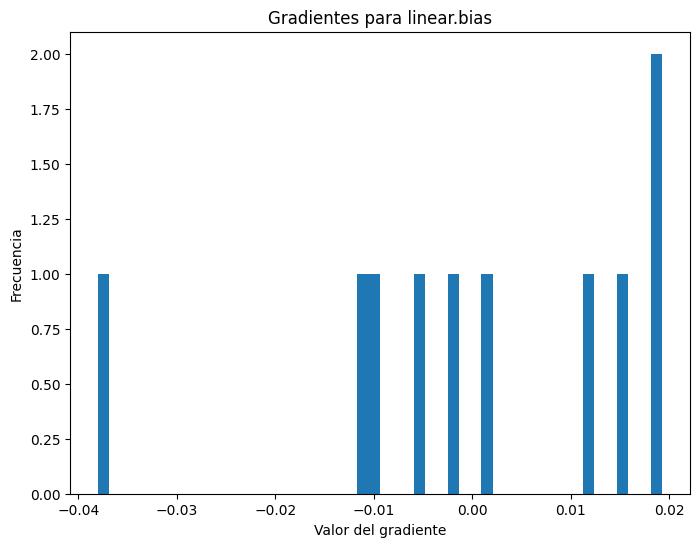

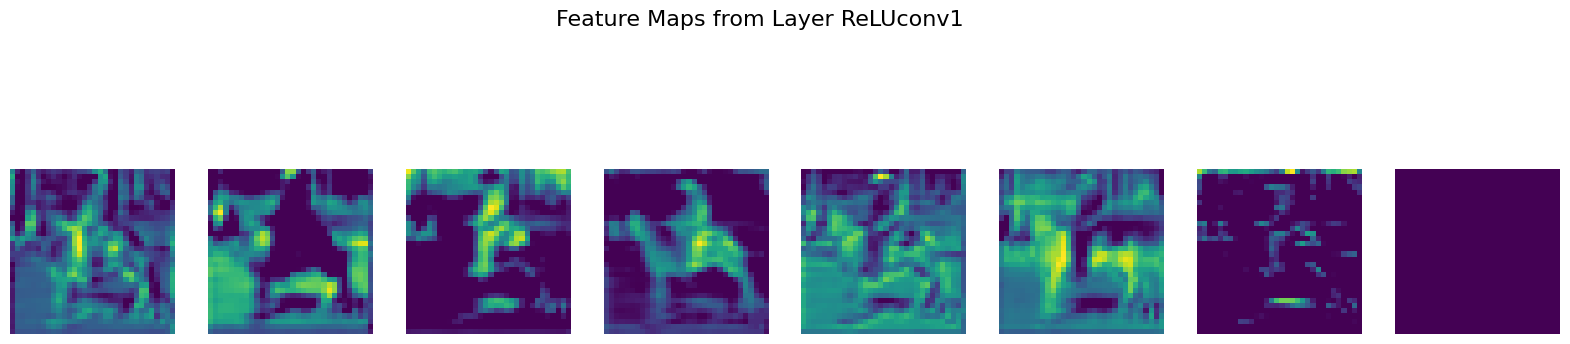

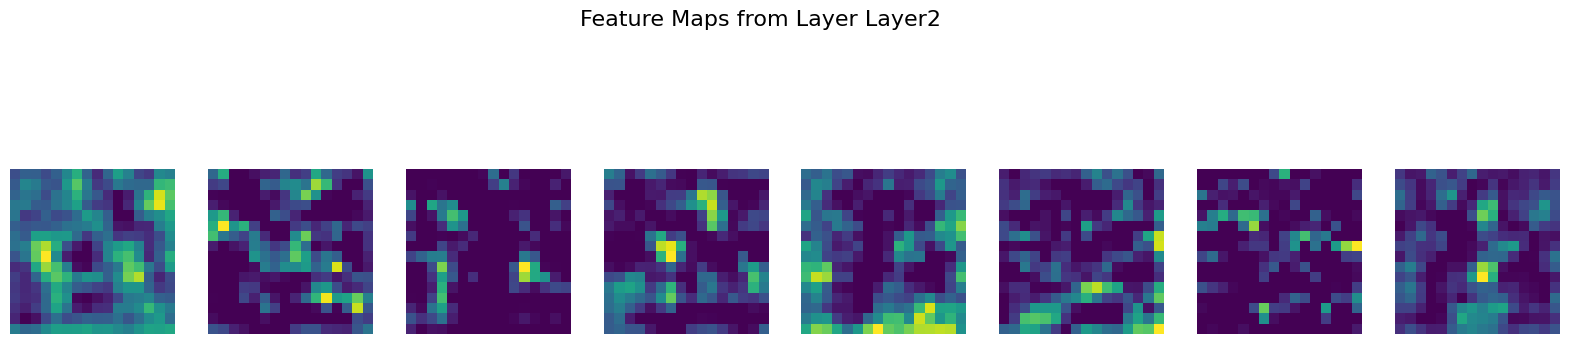

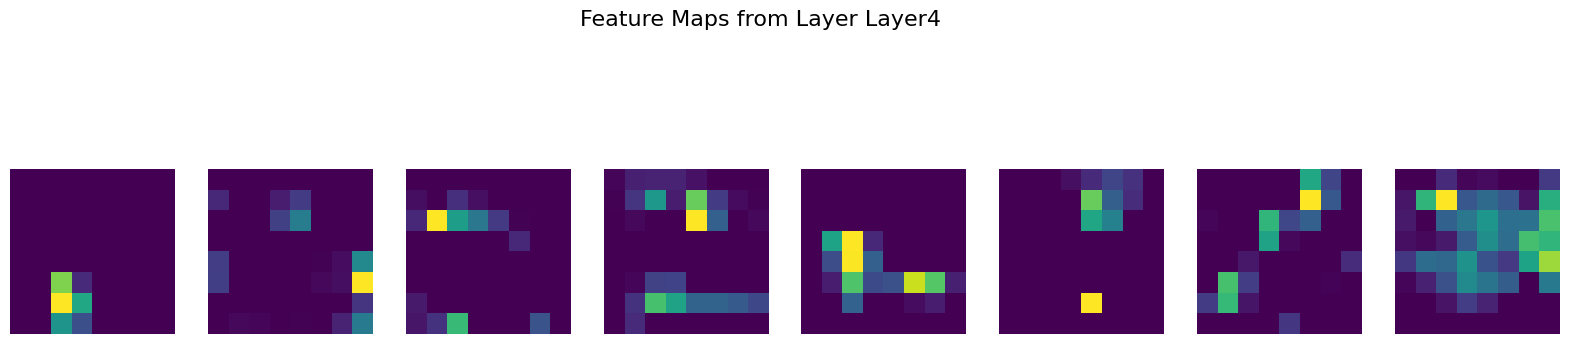

0.004
Epoch 36/70
Iteración 12355 - Lote 35/352 - Pérdida de Entrenamiento: 0.2769, Precisión de Entrenamiento: 0.9040
Iteración 12390 - Lote 70/352 - Pérdida de Entrenamiento: 0.2757, Precisión de Entrenamiento: 0.9045
Iteración 12425 - Lote 105/352 - Pérdida de Entrenamiento: 0.2778, Precisión de Entrenamiento: 0.9036
Iteración 12460 - Lote 140/352 - Pérdida de Entrenamiento: 0.2731, Precisión de Entrenamiento: 0.9054
Iteración 12495 - Lote 175/352 - Pérdida de Entrenamiento: 0.2729, Precisión de Entrenamiento: 0.9062
Iteración 12530 - Lote 210/352 - Pérdida de Entrenamiento: 0.2719, Precisión de Entrenamiento: 0.9058
Iteración 12565 - Lote 245/352 - Pérdida de Entrenamiento: 0.2751, Precisión de Entrenamiento: 0.9048
Iteración 12600 - Lote 280/352 - Pérdida de Entrenamiento: 0.2742, Precisión de Entrenamiento: 0.9052
Iteración 12635 - Lote 315/352 - Pérdida de Entrenamiento: 0.2736, Precisión de Entrenamiento: 0.9055
Iteración 12670 - Lote 350/352 - Pérdida de Entrenamiento: 0.2733,

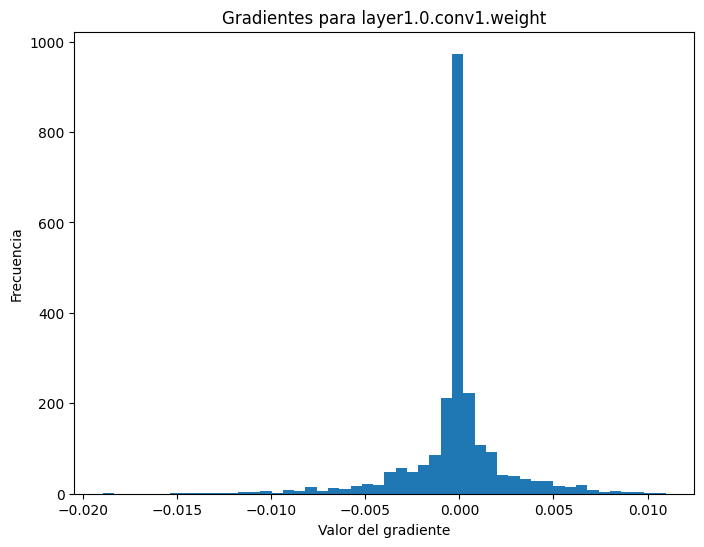

Gradientes para layer1.0.bn1.weight: min=-0.018639005720615387, max=0.0130534078925848, mean=0.0011817431077361107, std=0.008843389339745045


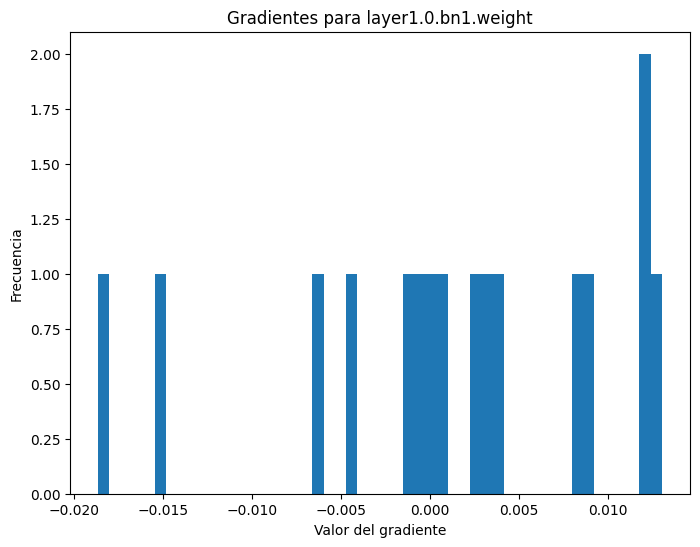

Gradientes para layer1.0.bn1.bias: min=-0.008402612060308456, max=0.011115087196230888, mean=0.002108863089233637, std=0.004405023995786905


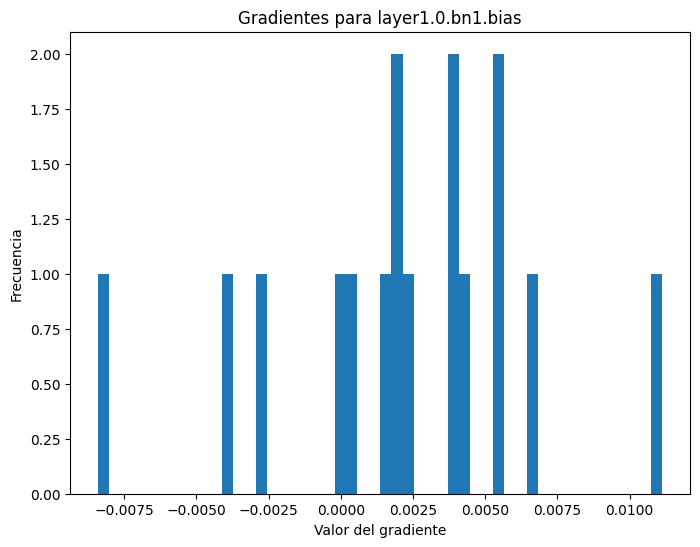

Gradientes para layer2.8.conv1.weight: min=-0.012124274857342243, max=0.00950362253934145, mean=2.5041032131412067e-05, std=0.0013244433794170618


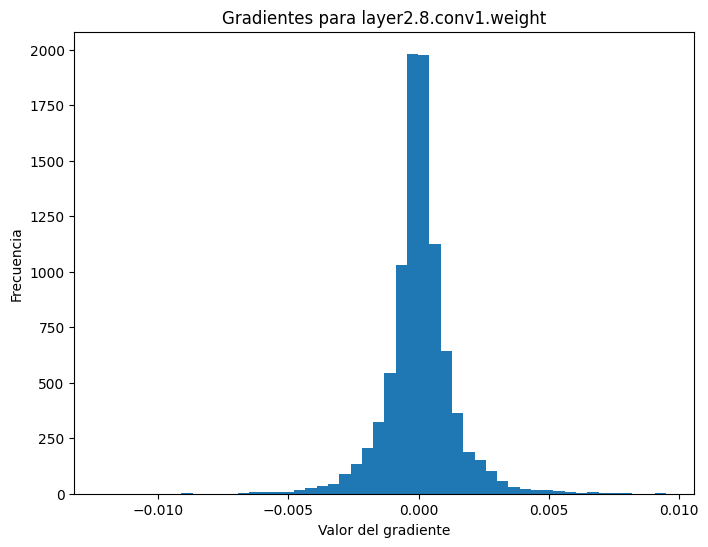

Gradientes para layer2.8.bn1.weight: min=-0.00781871099025011, max=0.0058547393418848515, mean=-2.4907159968279302e-05, std=0.0028968832921236753


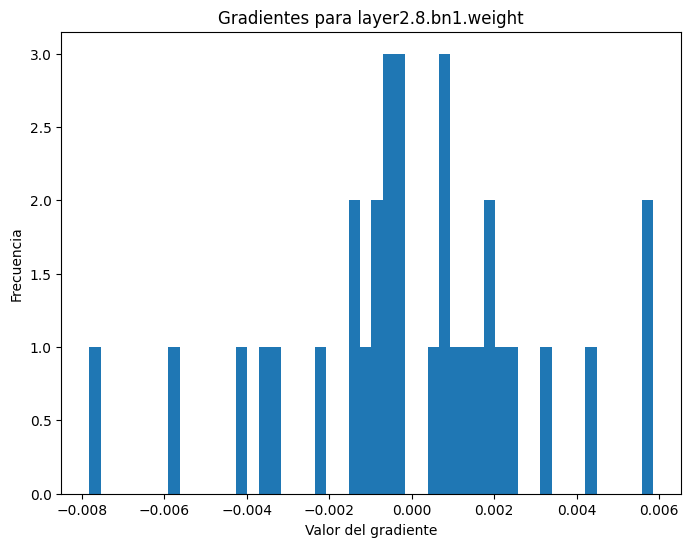

Gradientes para layer2.8.bn1.bias: min=-0.00615667412057519, max=0.005293020512908697, mean=-0.00011595261457841843, std=0.002961463062092662


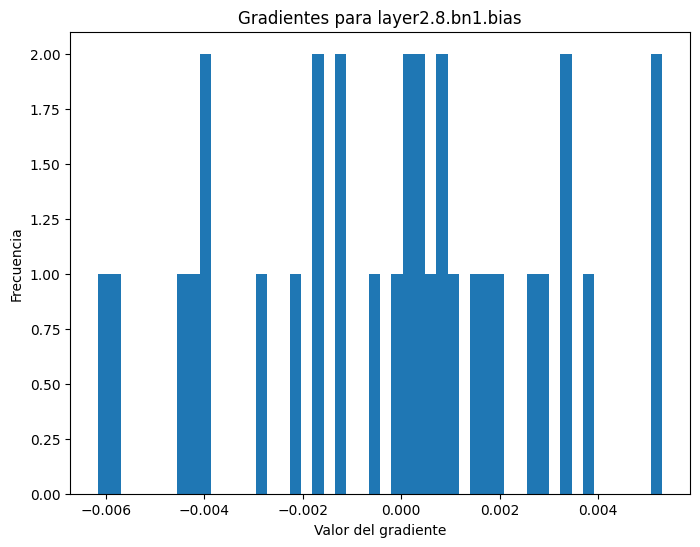

Gradientes para linear.weight: min=-0.07525981217622757, max=0.07006143033504486, mean=1.3038515822572094e-09, std=0.014178507030010223


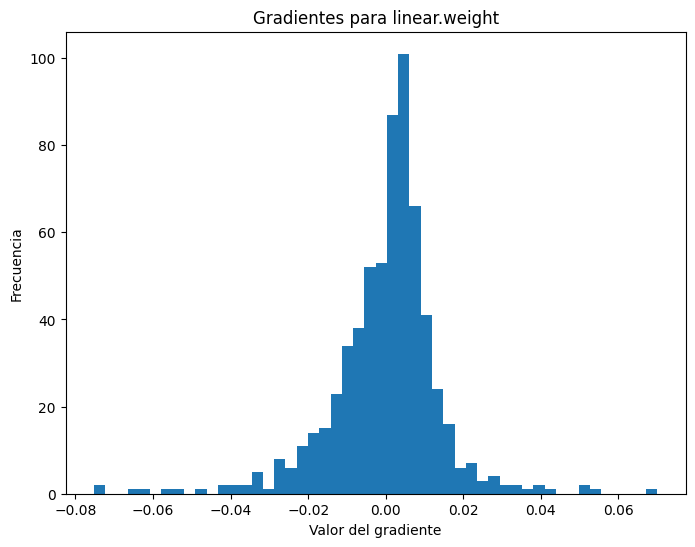

Gradientes para linear.bias: min=-0.0400955006480217, max=0.030710142105817795, mean=2.3283064365386963e-09, std=0.020480545237660408


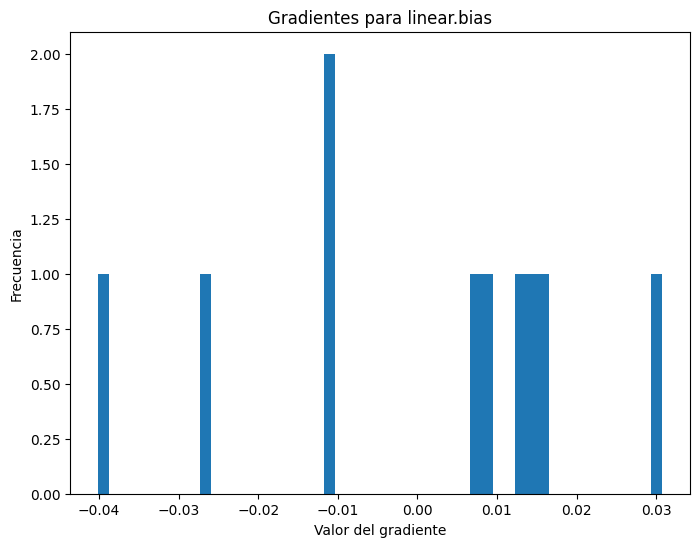

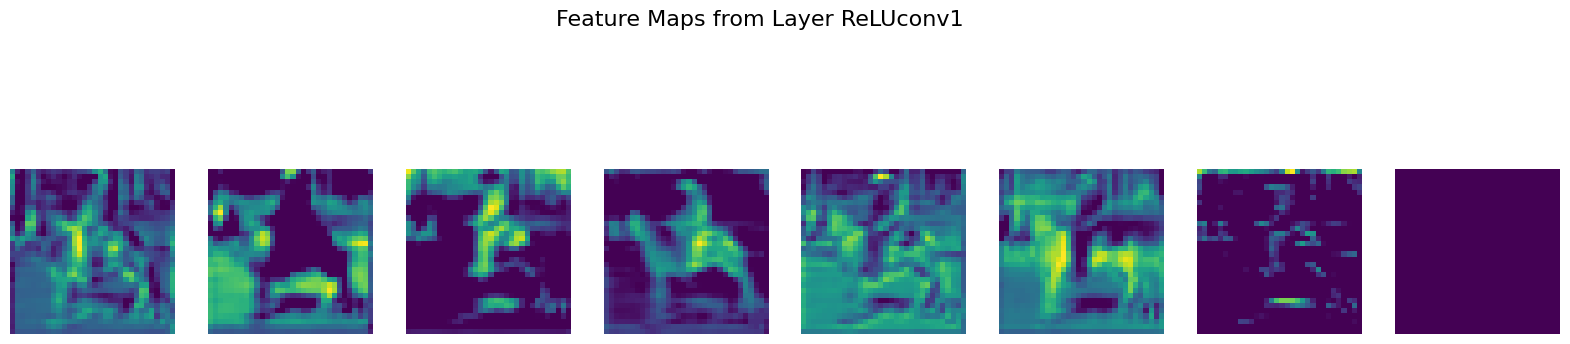

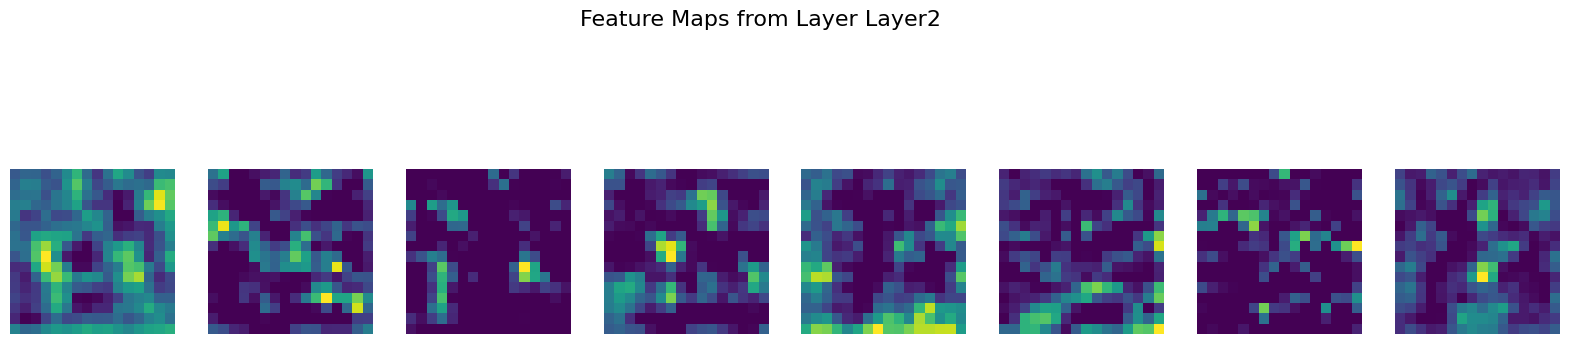

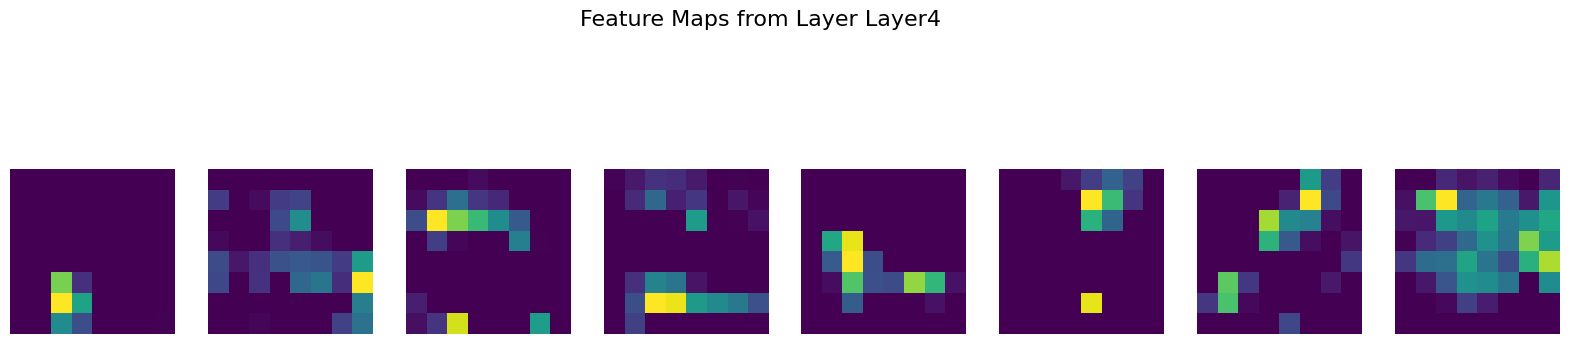

0.004
Epoch 41/70
Iteración 14115 - Lote 35/352 - Pérdida de Entrenamiento: 0.2349, Precisión de Entrenamiento: 0.9187
Iteración 14150 - Lote 70/352 - Pérdida de Entrenamiento: 0.2393, Precisión de Entrenamiento: 0.9180
Iteración 14185 - Lote 105/352 - Pérdida de Entrenamiento: 0.2425, Precisión de Entrenamiento: 0.9157
Iteración 14220 - Lote 140/352 - Pérdida de Entrenamiento: 0.2449, Precisión de Entrenamiento: 0.9149
Iteración 14255 - Lote 175/352 - Pérdida de Entrenamiento: 0.2447, Precisión de Entrenamiento: 0.9148
Iteración 14290 - Lote 210/352 - Pérdida de Entrenamiento: 0.2426, Precisión de Entrenamiento: 0.9157
Iteración 14325 - Lote 245/352 - Pérdida de Entrenamiento: 0.2418, Precisión de Entrenamiento: 0.9157
Iteración 14360 - Lote 280/352 - Pérdida de Entrenamiento: 0.2424, Precisión de Entrenamiento: 0.9152
Iteración 14395 - Lote 315/352 - Pérdida de Entrenamiento: 0.2415, Precisión de Entrenamiento: 0.9157
Iteración 14430 - Lote 350/352 - Pérdida de Entrenamiento: 0.2426,

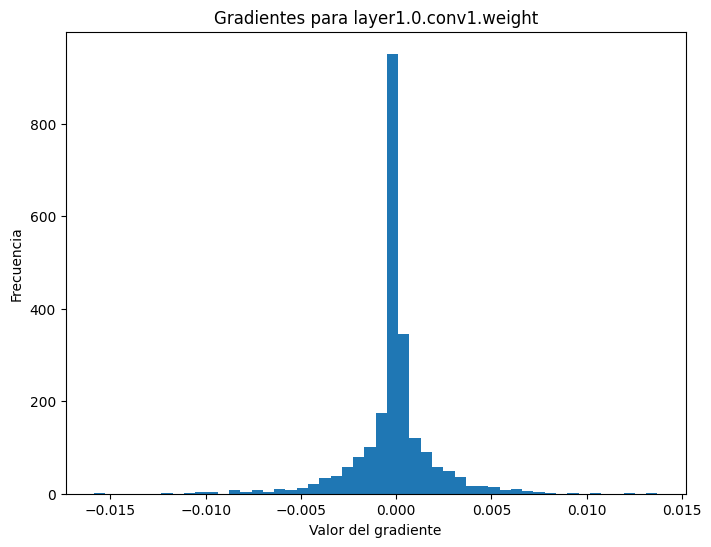

Gradientes para layer1.0.bn1.weight: min=-0.024277744814753532, max=0.011566166765987873, mean=-0.0019398974254727364, std=0.009033050388097763


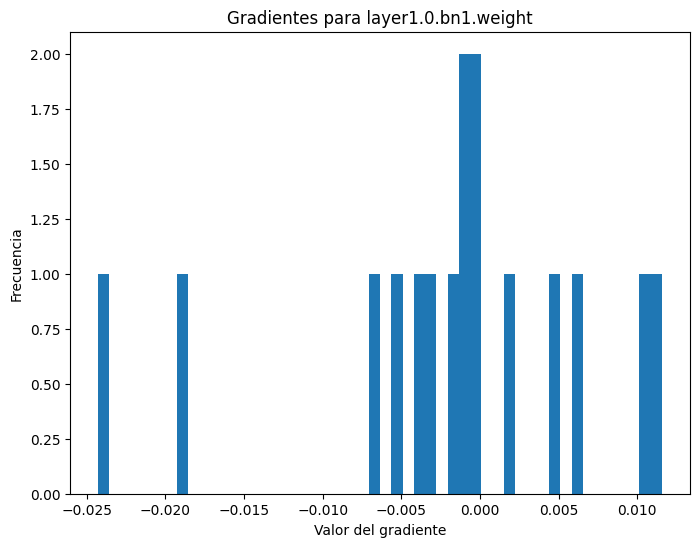

Gradientes para layer1.0.bn1.bias: min=-0.01485239714384079, max=0.009437290951609612, mean=-0.0008627412607893348, std=0.006221144460141659


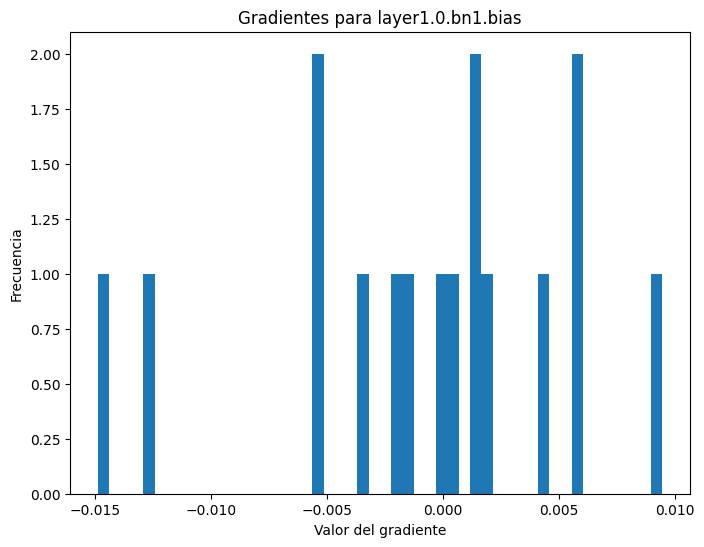

Gradientes para layer2.8.conv1.weight: min=-0.011016160249710083, max=0.008641041815280914, mean=-4.852391066378914e-05, std=0.000998887699097395


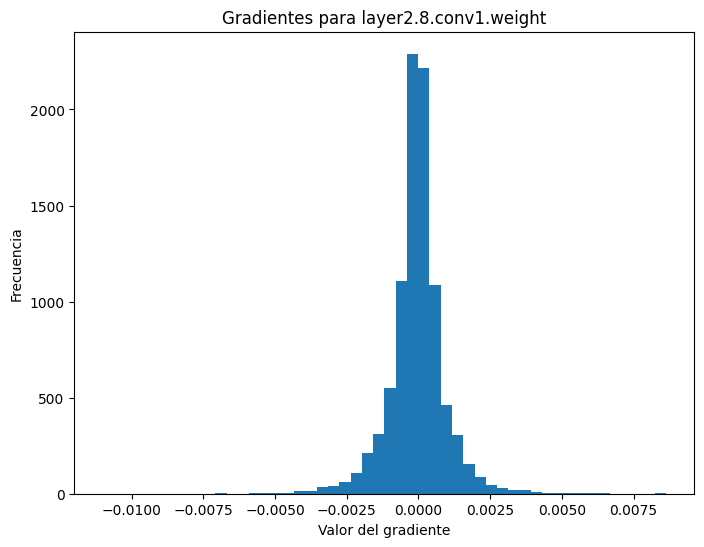

Gradientes para layer2.8.bn1.weight: min=-0.005617676302790642, max=0.003011636435985565, mean=-9.736185893416405e-05, std=0.0018531467067077756


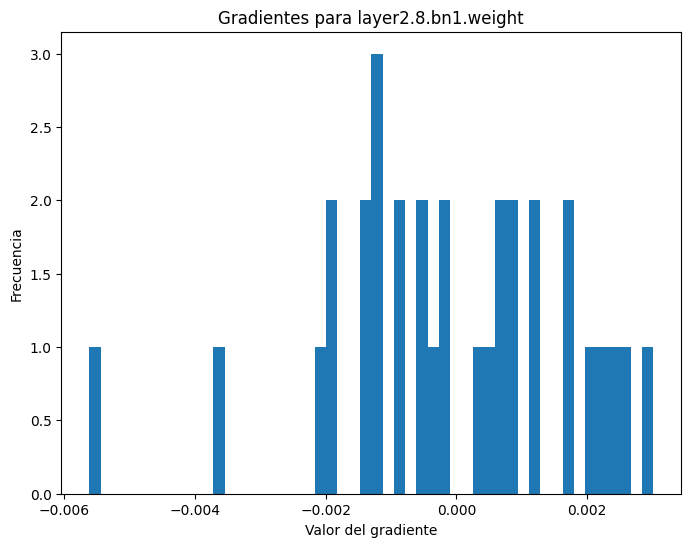

Gradientes para layer2.8.bn1.bias: min=-0.008152020163834095, max=0.004424695391207933, mean=-0.00046703865518793464, std=0.002506810473278165


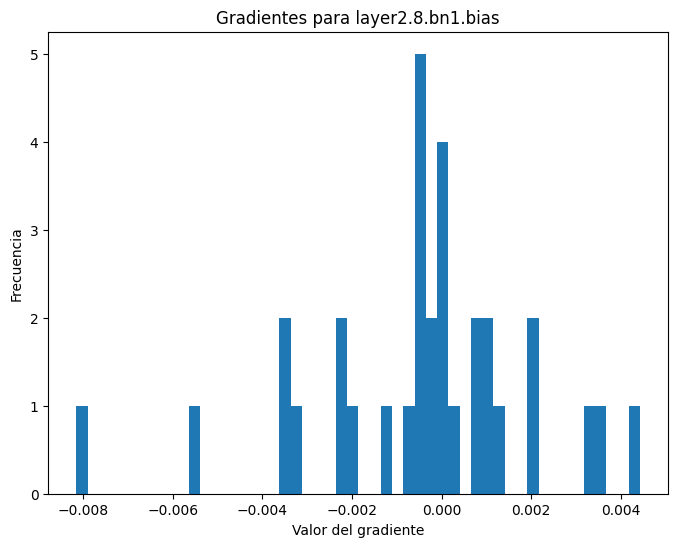

Gradientes para linear.weight: min=-0.06880363821983337, max=0.043397217988967896, mean=0.0, std=0.010659737512469292


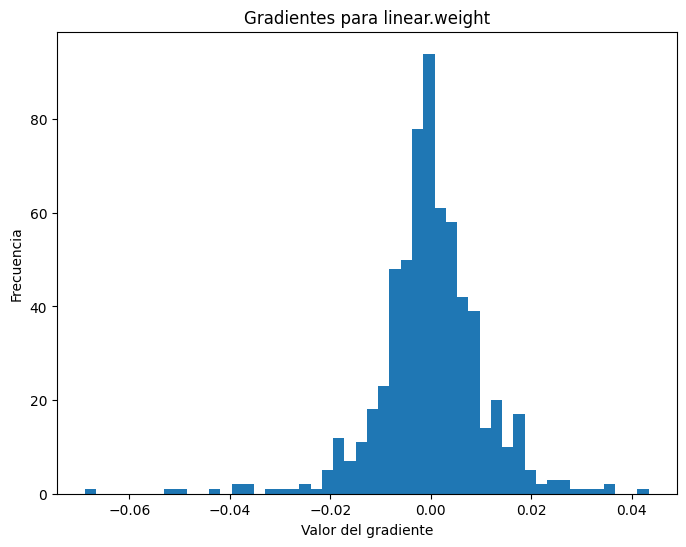

Gradientes para linear.bias: min=-0.022685782983899117, max=0.01955767348408699, mean=-7.916242106276172e-10, std=0.01162603311240673


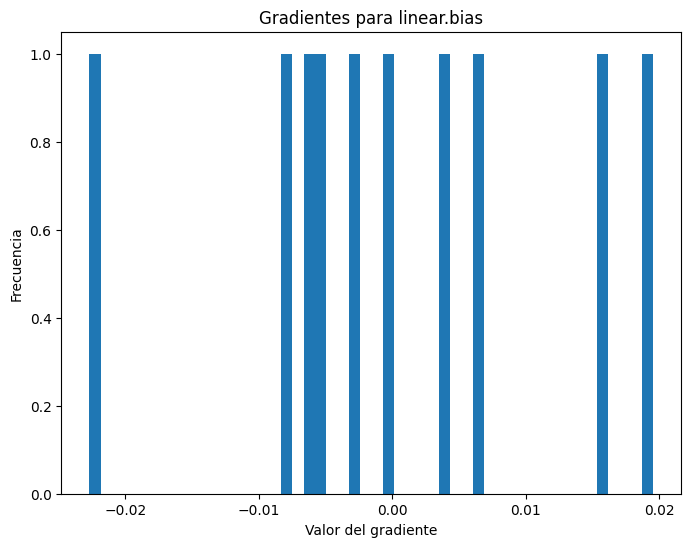

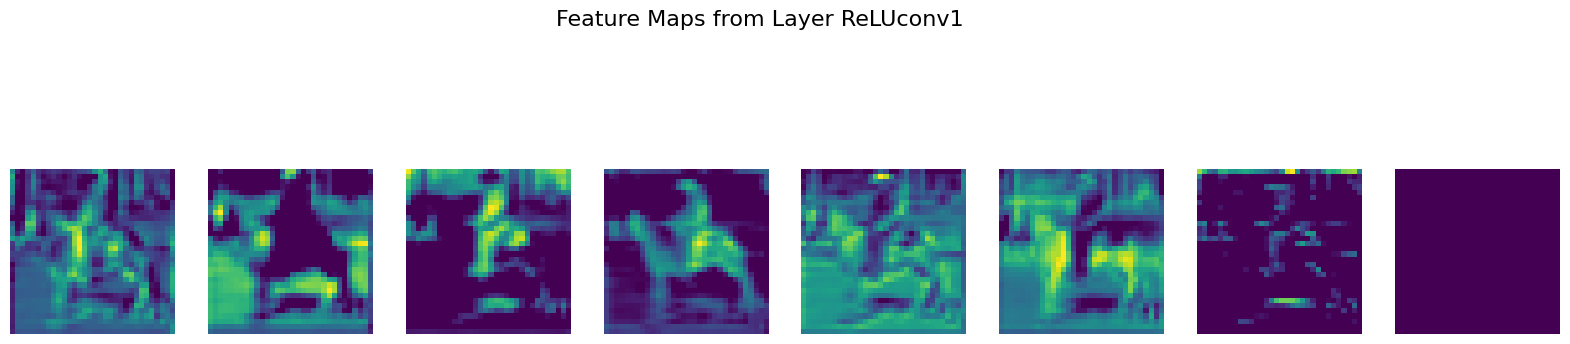

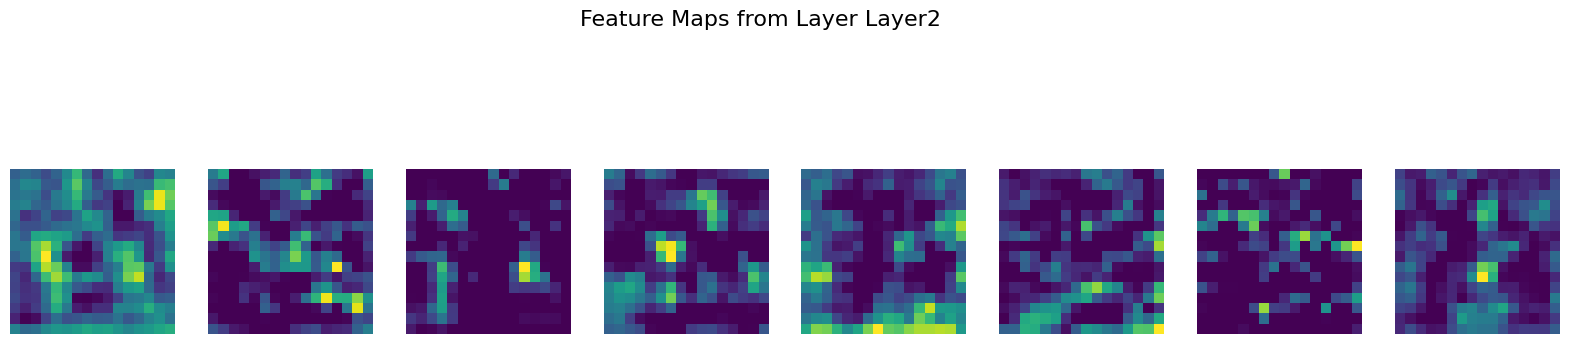

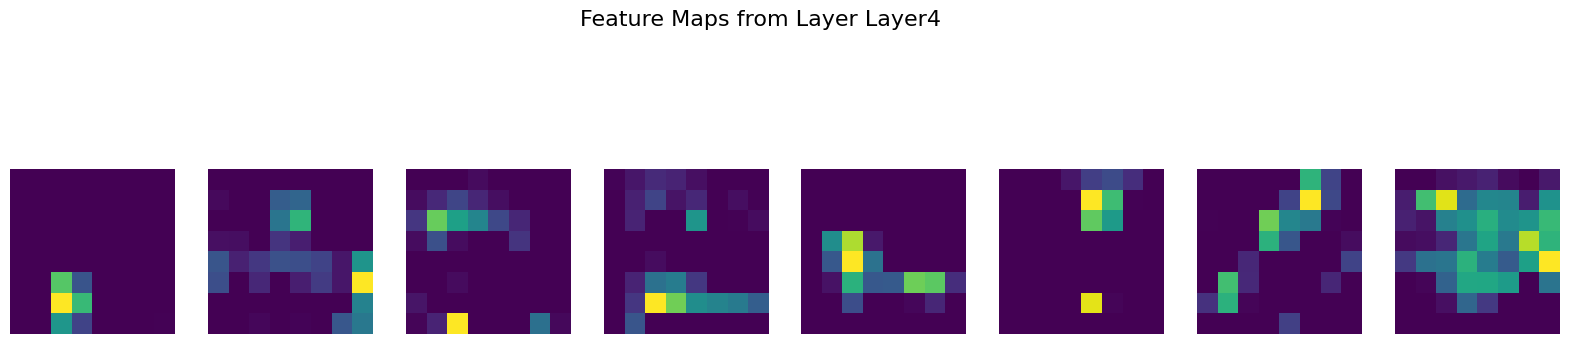

0.0004
Epoch 46/70
Iteración 15875 - Lote 35/352 - Pérdida de Entrenamiento: 0.2188, Precisión de Entrenamiento: 0.9230
Iteración 15910 - Lote 70/352 - Pérdida de Entrenamiento: 0.2169, Precisión de Entrenamiento: 0.9220
Iteración 15945 - Lote 105/352 - Pérdida de Entrenamiento: 0.2220, Precisión de Entrenamiento: 0.9211
Iteración 15980 - Lote 140/352 - Pérdida de Entrenamiento: 0.2260, Precisión de Entrenamiento: 0.9201
Iteración 16015 - Lote 175/352 - Pérdida de Entrenamiento: 0.2274, Precisión de Entrenamiento: 0.9193
Iteración 16050 - Lote 210/352 - Pérdida de Entrenamiento: 0.2289, Precisión de Entrenamiento: 0.9197
Iteración 16085 - Lote 245/352 - Pérdida de Entrenamiento: 0.2302, Precisión de Entrenamiento: 0.9192
Iteración 16120 - Lote 280/352 - Pérdida de Entrenamiento: 0.2308, Precisión de Entrenamiento: 0.9191
Iteración 16155 - Lote 315/352 - Pérdida de Entrenamiento: 0.2290, Precisión de Entrenamiento: 0.9199
Iteración 16190 - Lote 350/352 - Pérdida de Entrenamiento: 0.2287

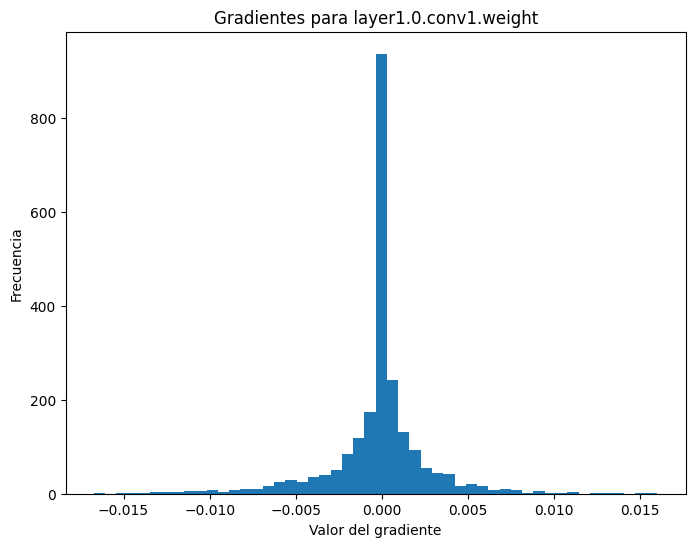

Gradientes para layer1.0.bn1.weight: min=-0.0103611396625638, max=0.012656682170927525, mean=-0.00042712752474471927, std=0.0072456044144928455


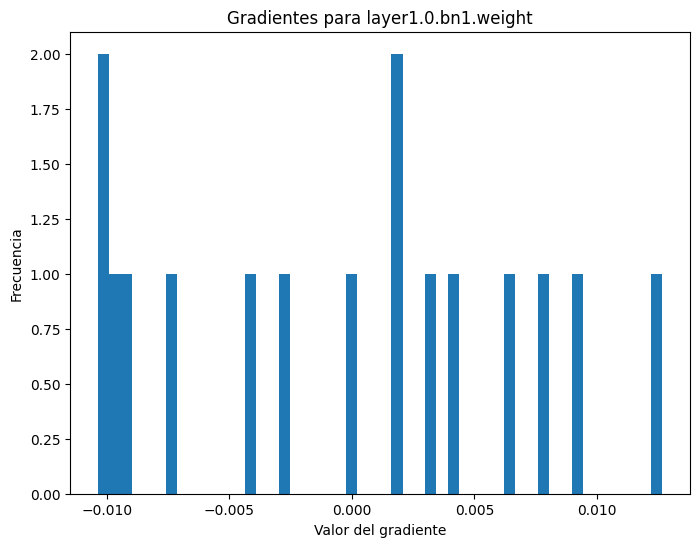

Gradientes para layer1.0.bn1.bias: min=-0.024854309856891632, max=0.021001506596803665, mean=-0.0018712491728365421, std=0.009877417236566544


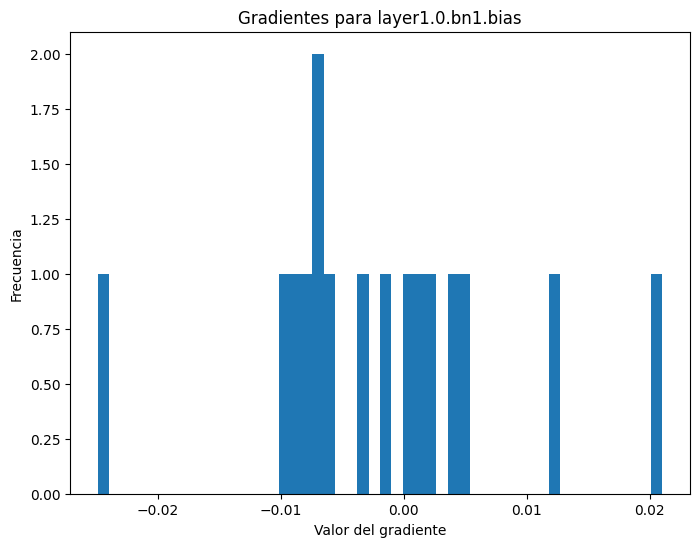

Gradientes para layer2.8.conv1.weight: min=-0.011054566130042076, max=0.011328056454658508, mean=2.102596772601828e-05, std=0.001392238074913621


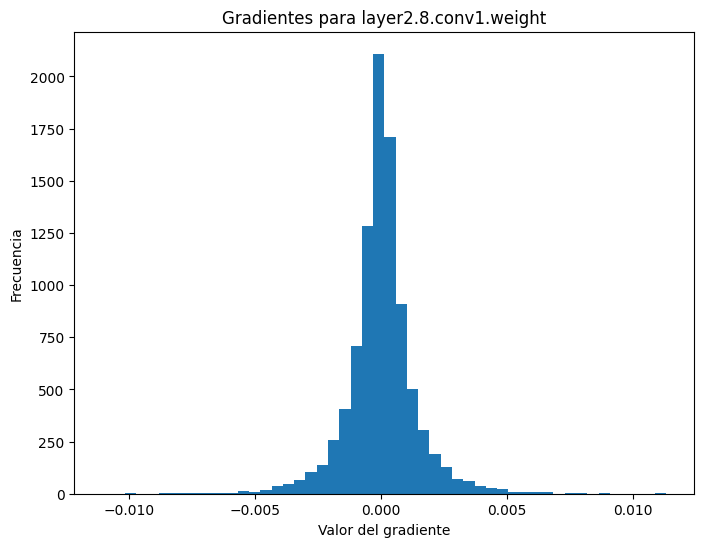

Gradientes para layer2.8.bn1.weight: min=-0.006412816233932972, max=0.006030709948390722, mean=-2.9651622753590345e-05, std=0.003245685249567032


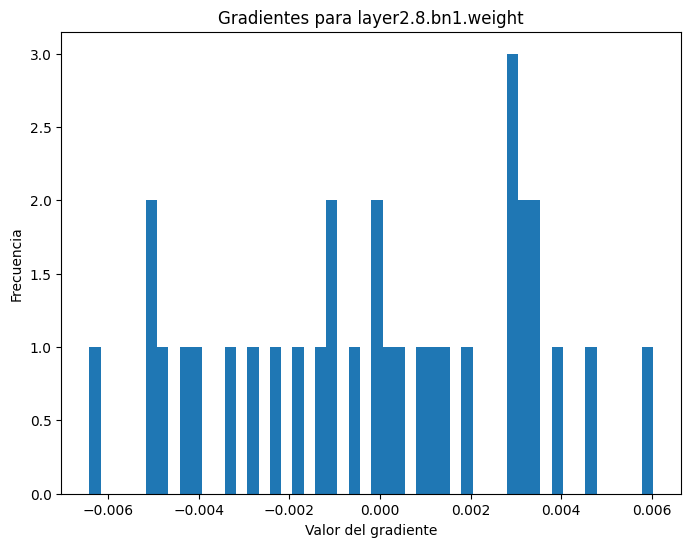

Gradientes para layer2.8.bn1.bias: min=-0.007881312631070614, max=0.006401510443538427, mean=0.00023169626365415752, std=0.0033287769183516502


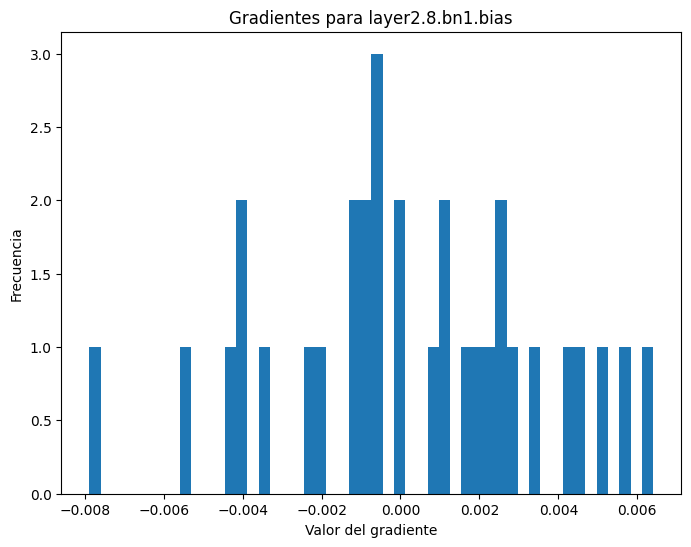

Gradientes para linear.weight: min=-0.04284560680389404, max=0.04191383719444275, mean=5.587935669737476e-10, std=0.008447431027889252


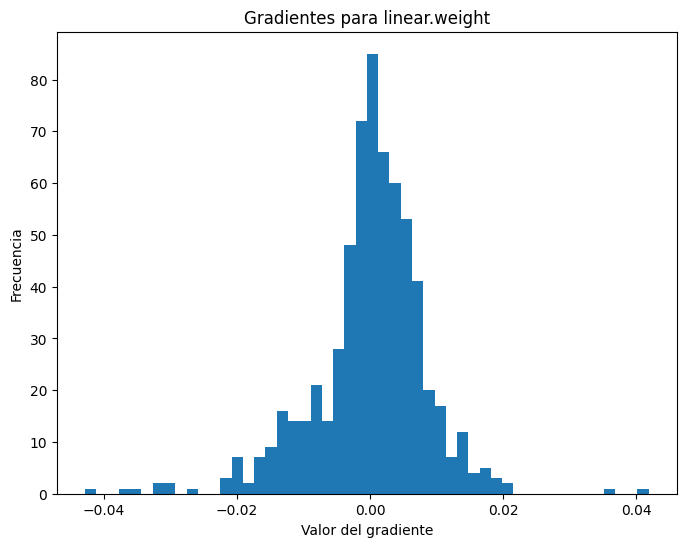

Gradientes para linear.bias: min=-0.02196597494184971, max=0.012695412151515484, mean=2.793967834868738e-10, std=0.010891139507293701


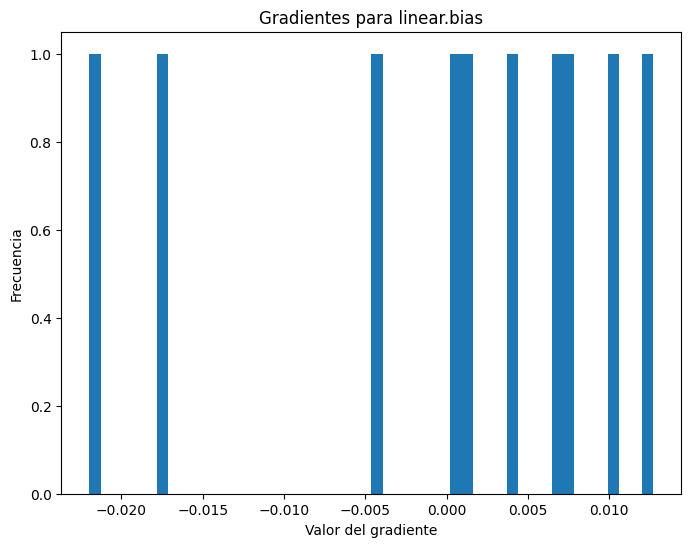

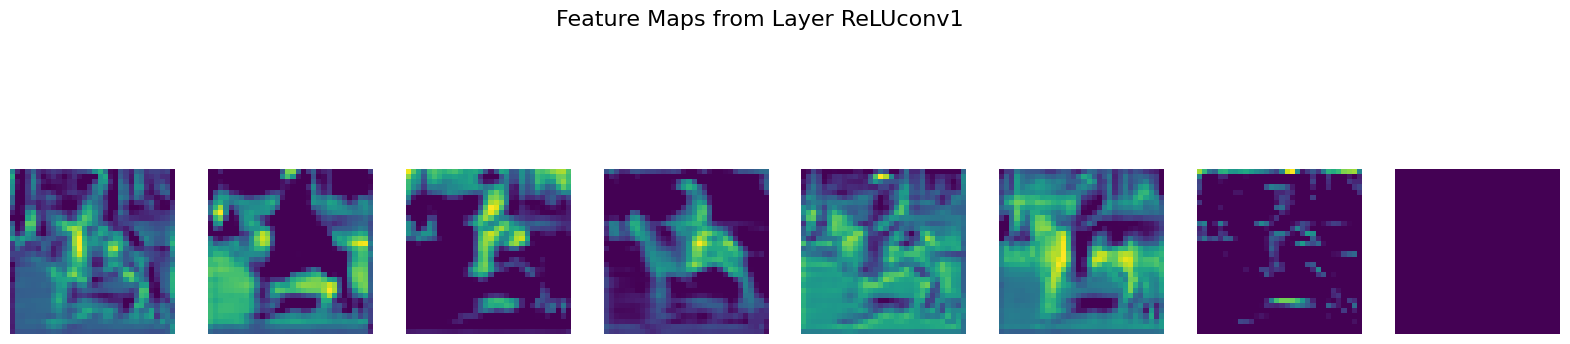

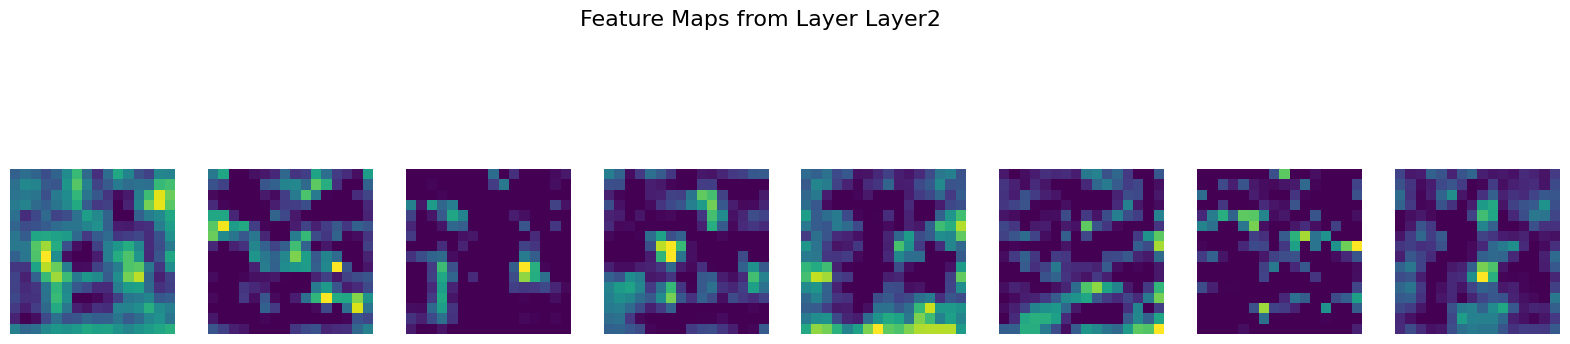

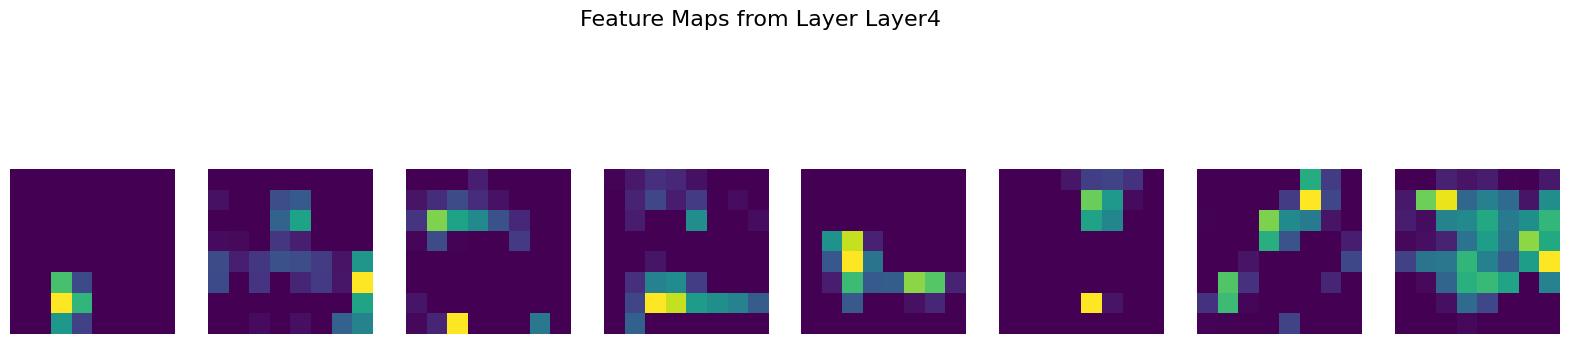

0.0004
Epoch 51/70
Iteración 17635 - Lote 35/352 - Pérdida de Entrenamiento: 0.2175, Precisión de Entrenamiento: 0.9266
Iteración 17670 - Lote 70/352 - Pérdida de Entrenamiento: 0.2211, Precisión de Entrenamiento: 0.9249
Iteración 17705 - Lote 105/352 - Pérdida de Entrenamiento: 0.2153, Precisión de Entrenamiento: 0.9254
Iteración 17740 - Lote 140/352 - Pérdida de Entrenamiento: 0.2164, Precisión de Entrenamiento: 0.9239
Iteración 17775 - Lote 175/352 - Pérdida de Entrenamiento: 0.2159, Precisión de Entrenamiento: 0.9248
Iteración 17810 - Lote 210/352 - Pérdida de Entrenamiento: 0.2152, Precisión de Entrenamiento: 0.9249
Iteración 17845 - Lote 245/352 - Pérdida de Entrenamiento: 0.2184, Precisión de Entrenamiento: 0.9243
Iteración 17880 - Lote 280/352 - Pérdida de Entrenamiento: 0.2186, Precisión de Entrenamiento: 0.9242
Iteración 17915 - Lote 315/352 - Pérdida de Entrenamiento: 0.2189, Precisión de Entrenamiento: 0.9239
Iteración 17950 - Lote 350/352 - Pérdida de Entrenamiento: 0.2179

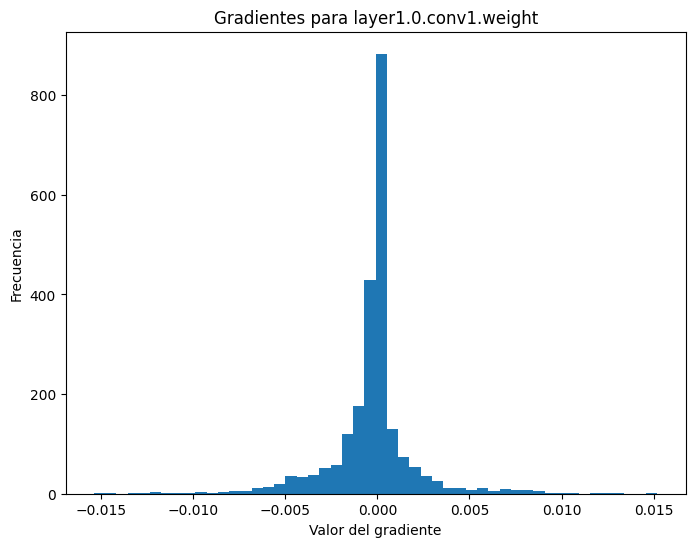

Gradientes para layer1.0.bn1.weight: min=-0.015375816263258457, max=0.016763754189014435, mean=-0.0024947163183242083, std=0.008351295255124569


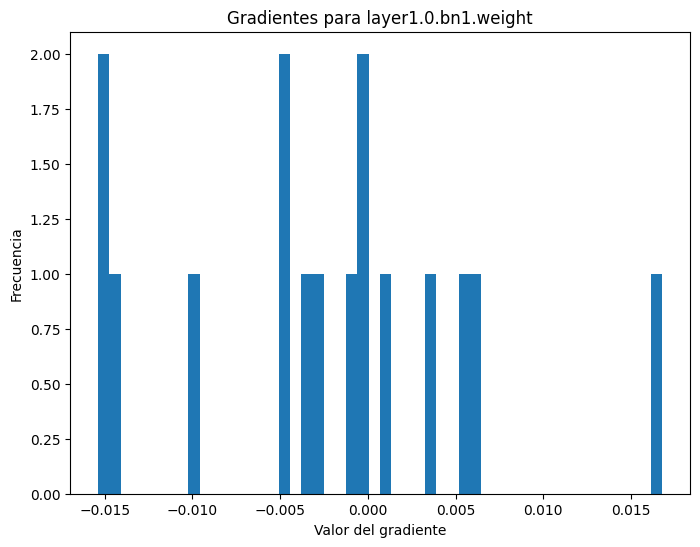

Gradientes para layer1.0.bn1.bias: min=-0.019545232877135277, max=0.0214228555560112, mean=0.003392760641872883, std=0.009758603759109974


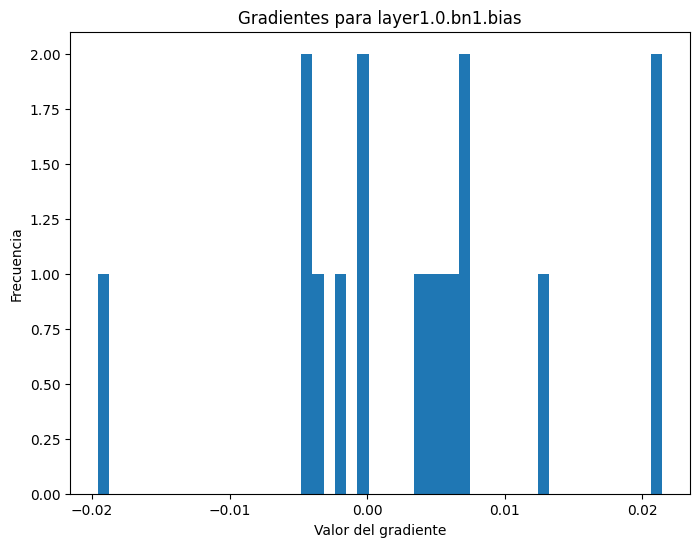

Gradientes para linear.weight: min=-0.07412855327129364, max=0.058429524302482605, mean=1.1175871339474952e-09, std=0.011695114895701408


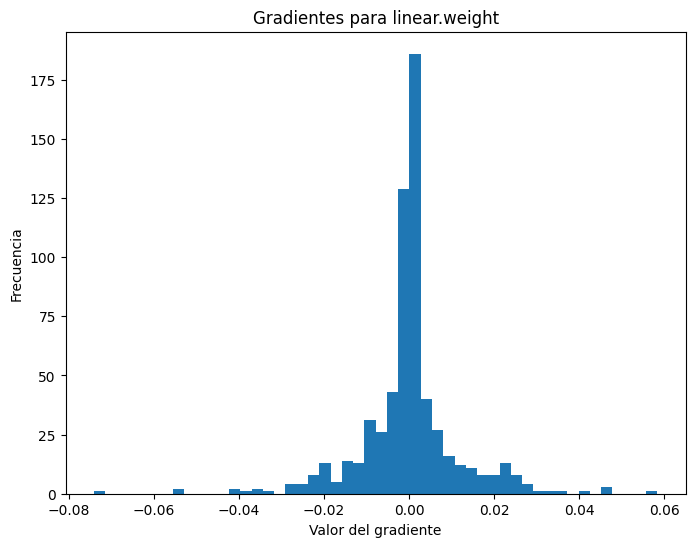

Gradientes para linear.bias: min=-0.026688504964113235, max=0.029440276324748993, mean=1.2019881756586415e-09, std=0.014059405773878098


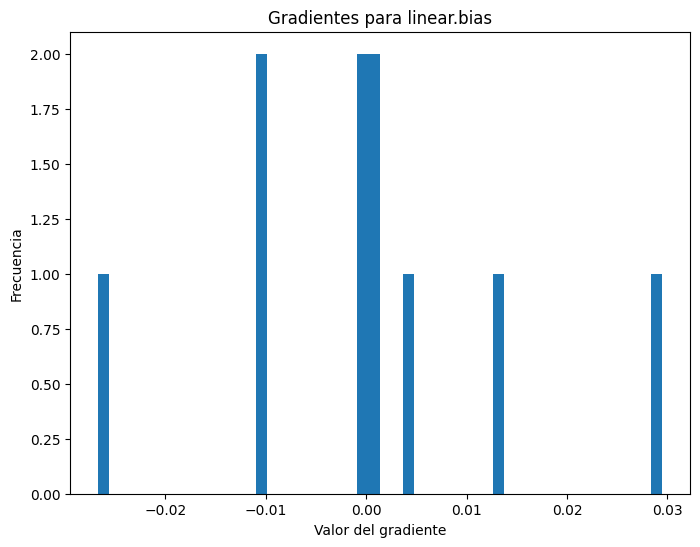

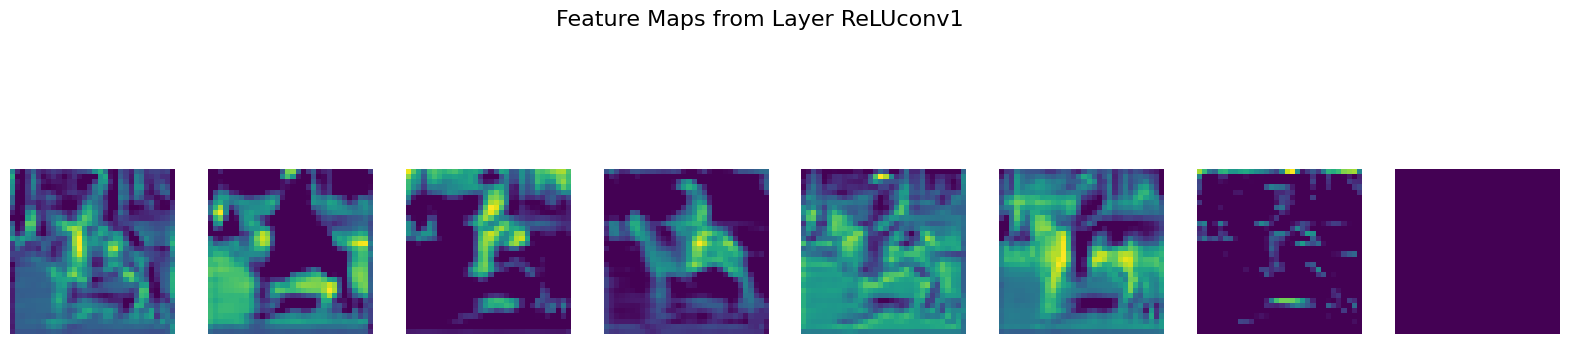

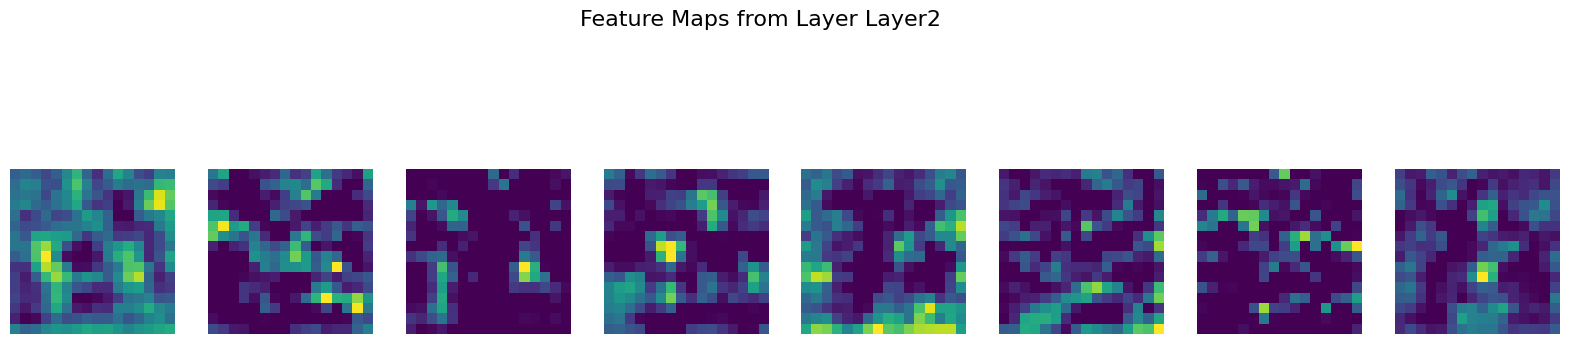

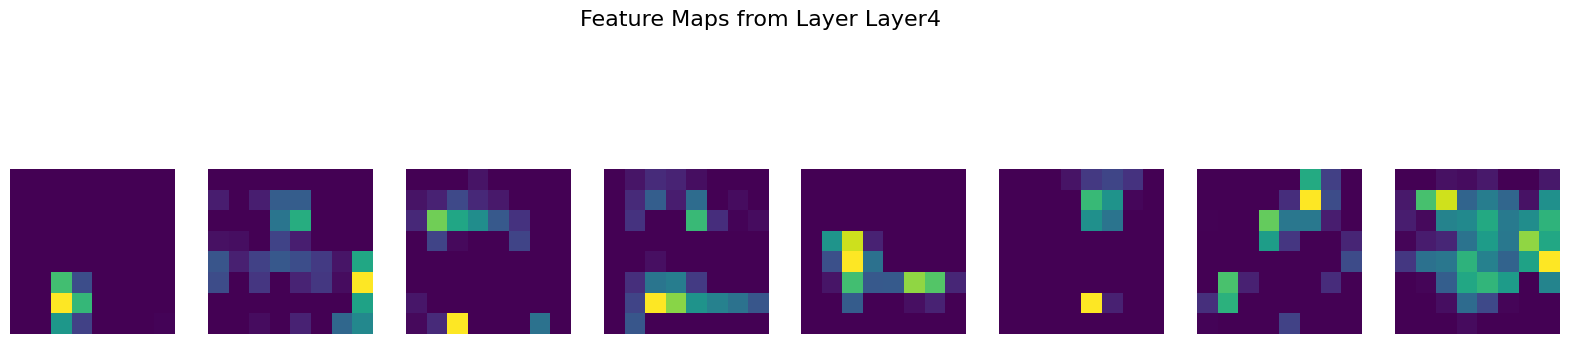

0.0004
Epoch 56/70
Iteración 19395 - Lote 35/352 - Pérdida de Entrenamiento: 0.2117, Precisión de Entrenamiento: 0.9270
Iteración 19430 - Lote 70/352 - Pérdida de Entrenamiento: 0.2145, Precisión de Entrenamiento: 0.9268
Iteración 19465 - Lote 105/352 - Pérdida de Entrenamiento: 0.2176, Precisión de Entrenamiento: 0.9248
Iteración 19500 - Lote 140/352 - Pérdida de Entrenamiento: 0.2196, Precisión de Entrenamiento: 0.9249
Iteración 19535 - Lote 175/352 - Pérdida de Entrenamiento: 0.2192, Precisión de Entrenamiento: 0.9243
Iteración 19570 - Lote 210/352 - Pérdida de Entrenamiento: 0.2155, Precisión de Entrenamiento: 0.9253
Iteración 19605 - Lote 245/352 - Pérdida de Entrenamiento: 0.2146, Precisión de Entrenamiento: 0.9256
Iteración 19640 - Lote 280/352 - Pérdida de Entrenamiento: 0.2164, Precisión de Entrenamiento: 0.9244
Iteración 19675 - Lote 315/352 - Pérdida de Entrenamiento: 0.2156, Precisión de Entrenamiento: 0.9252
Iteración 19710 - Lote 350/352 - Pérdida de Entrenamiento: 0.2179

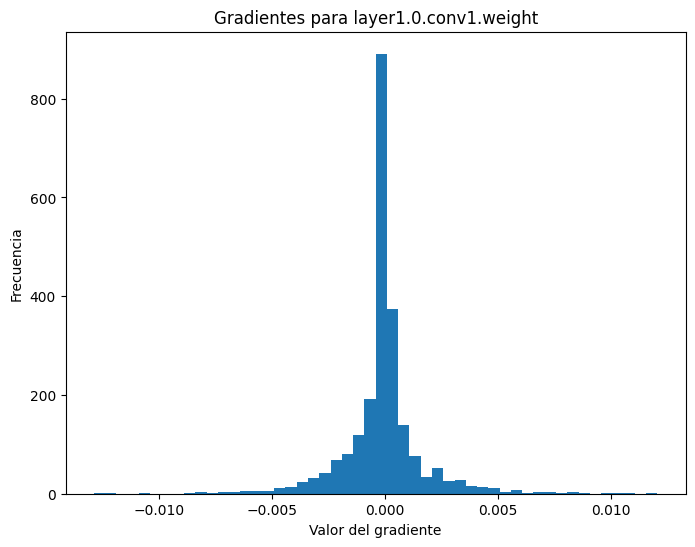

Gradientes para layer1.0.bn1.weight: min=-0.025187792256474495, max=0.023392166942358017, mean=-0.0005796503974124789, std=0.01057475060224533


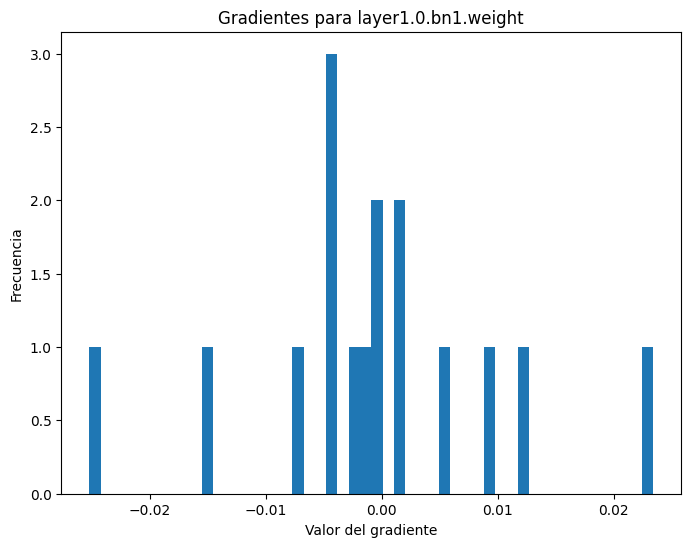

Gradientes para layer1.0.bn1.bias: min=-0.016820915043354034, max=0.025511479005217552, mean=-0.0026872381567955017, std=0.009454244747757912


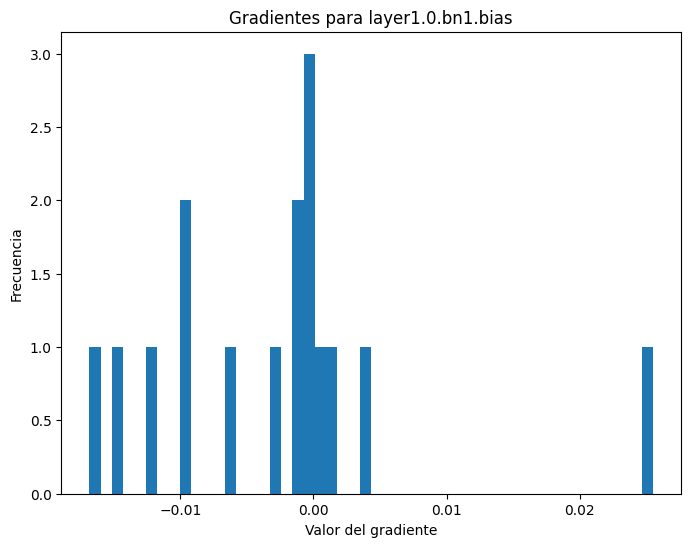

Gradientes para layer2.8.conv1.weight: min=-0.011906402185559273, max=0.008000525645911694, mean=-2.5478970201220363e-05, std=0.0010408962843939662


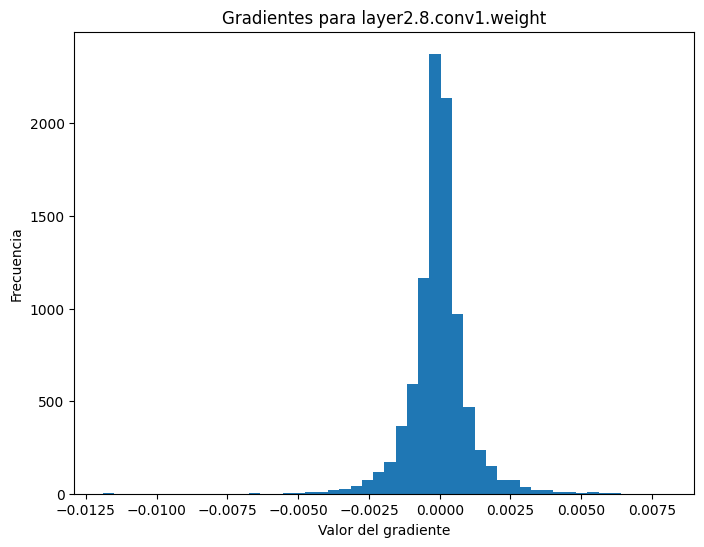

Gradientes para layer2.8.bn1.weight: min=-0.006847025826573372, max=0.005582109559327364, mean=-4.030560376122594e-05, std=0.0028819027356803417


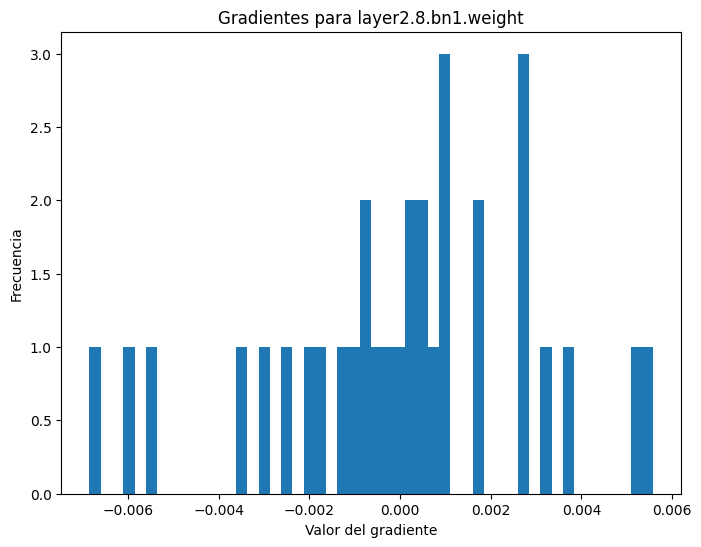

Gradientes para layer2.8.bn1.bias: min=-0.005207006819546223, max=0.0066446359269320965, mean=-0.0001645965821808204, std=0.0025770419742912054


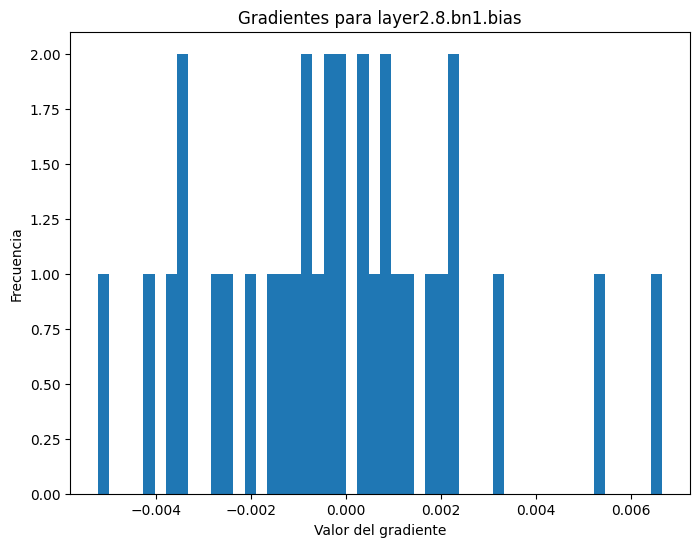

Gradientes para linear.weight: min=-0.056876469403505325, max=0.04878626763820648, mean=1.1175871339474952e-09, std=0.009641251526772976


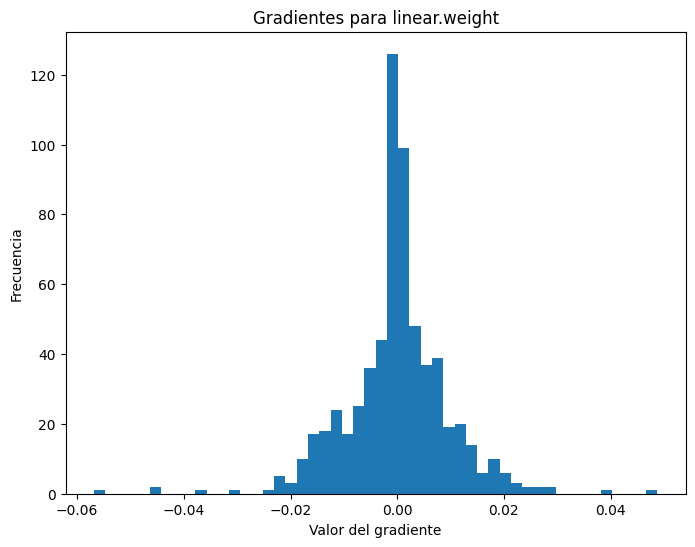

Gradientes para linear.bias: min=-0.019106578081846237, max=0.018195196986198425, mean=1.3416865396465028e-09, std=0.011717511340975761


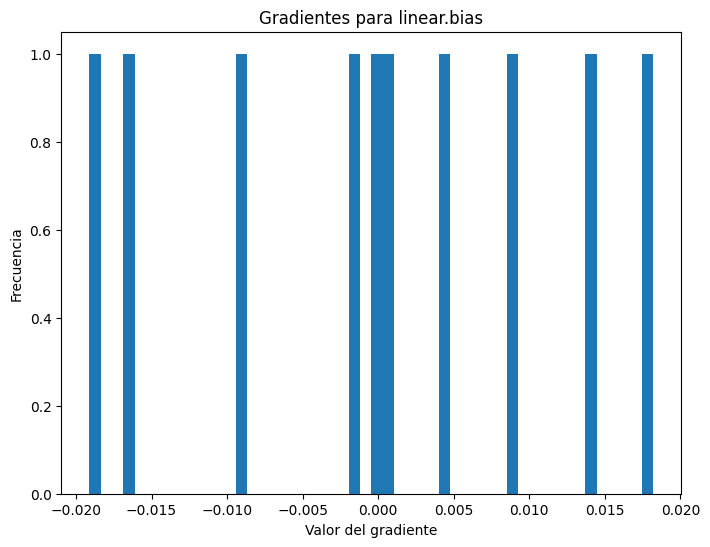

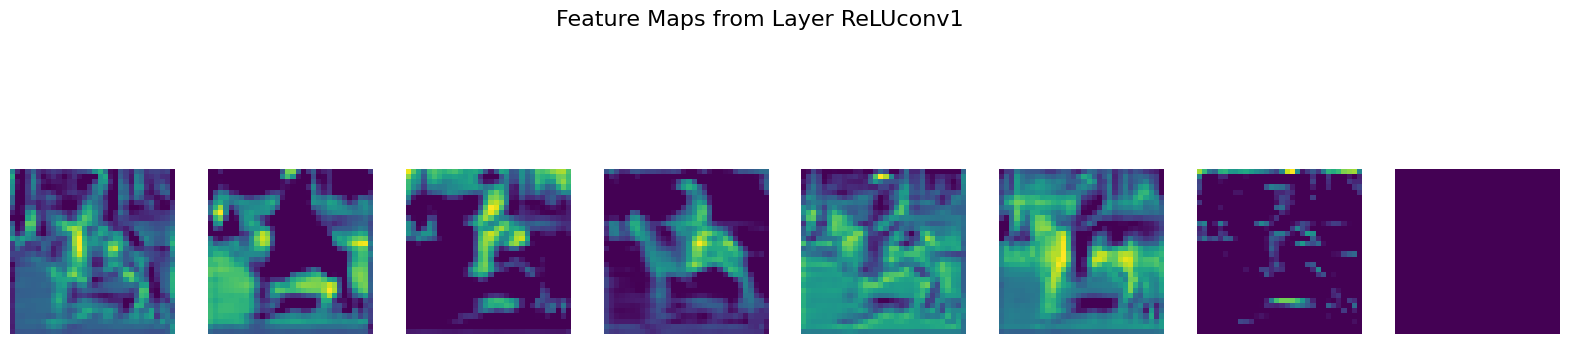

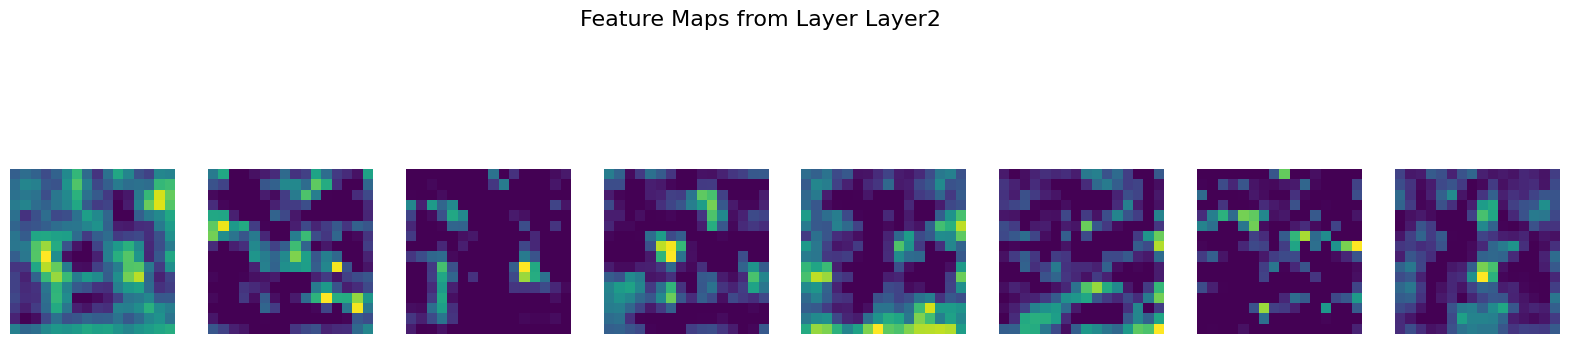

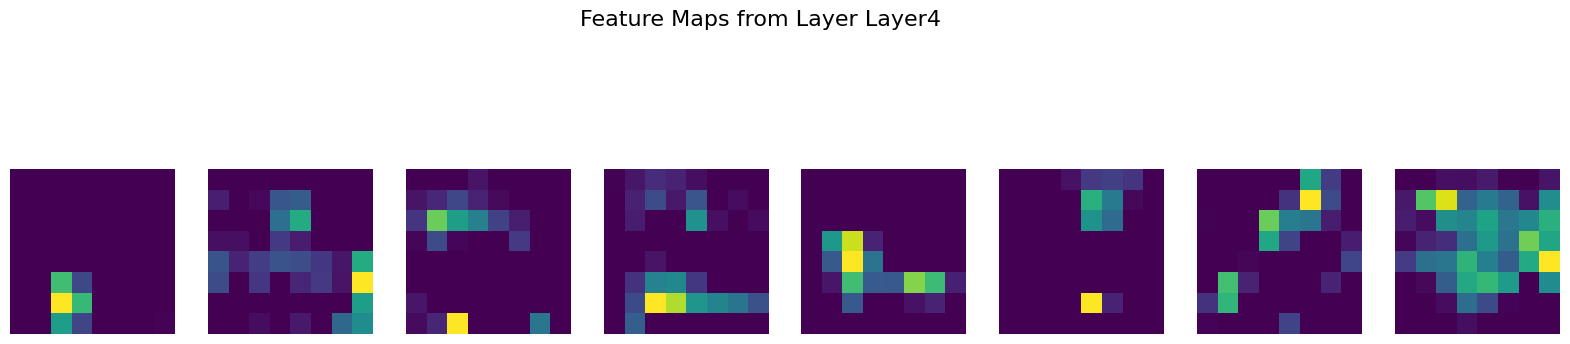

4e-05
Epoch 61/70
Iteración 21155 - Lote 35/352 - Pérdida de Entrenamiento: 0.2192, Precisión de Entrenamiento: 0.9199
Iteración 21190 - Lote 70/352 - Pérdida de Entrenamiento: 0.2148, Precisión de Entrenamiento: 0.9221
Iteración 21225 - Lote 105/352 - Pérdida de Entrenamiento: 0.2172, Precisión de Entrenamiento: 0.9230
Iteración 21260 - Lote 140/352 - Pérdida de Entrenamiento: 0.2131, Precisión de Entrenamiento: 0.9238
Iteración 21295 - Lote 175/352 - Pérdida de Entrenamiento: 0.2117, Precisión de Entrenamiento: 0.9248
Iteración 21330 - Lote 210/352 - Pérdida de Entrenamiento: 0.2142, Precisión de Entrenamiento: 0.9236
Iteración 21365 - Lote 245/352 - Pérdida de Entrenamiento: 0.2149, Precisión de Entrenamiento: 0.9232
Iteración 21400 - Lote 280/352 - Pérdida de Entrenamiento: 0.2170, Precisión de Entrenamiento: 0.9226
Iteración 21435 - Lote 315/352 - Pérdida de Entrenamiento: 0.2174, Precisión de Entrenamiento: 0.9223
Iteración 21470 - Lote 350/352 - Pérdida de Entrenamiento: 0.2171,

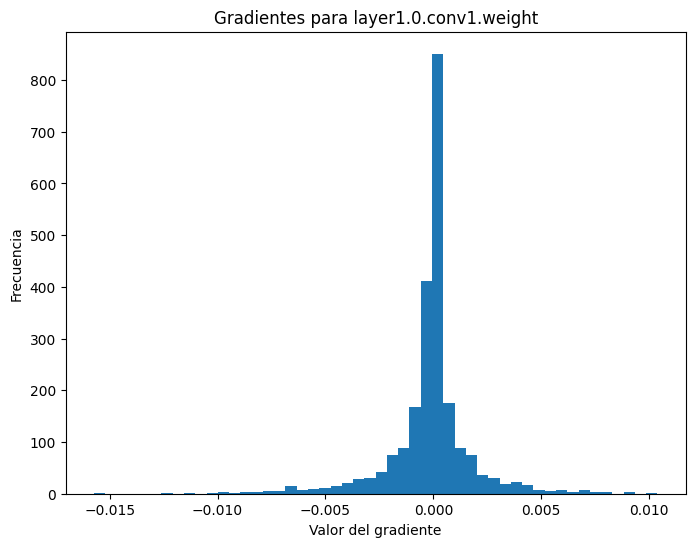

Gradientes para layer1.0.bn1.weight: min=-0.015567423775792122, max=0.022327333688735962, mean=0.0006431863876059651, std=0.00917796976864338


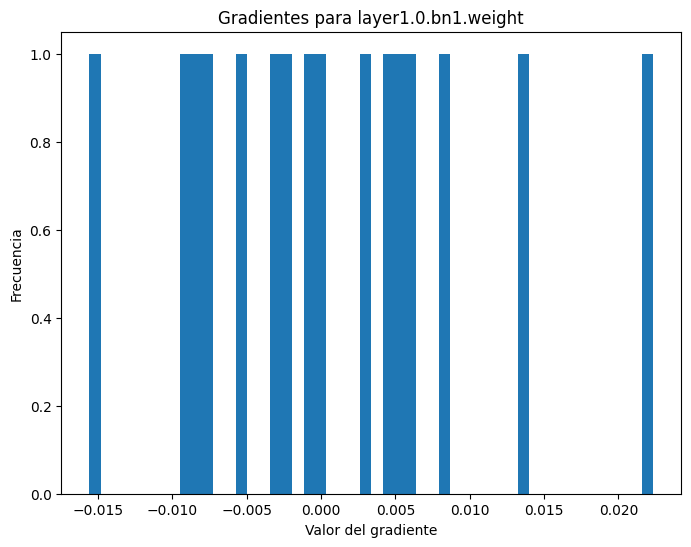

Gradientes para layer1.0.bn1.bias: min=-0.01438169740140438, max=0.012305453419685364, mean=-0.0005612724926322699, std=0.006685161031782627


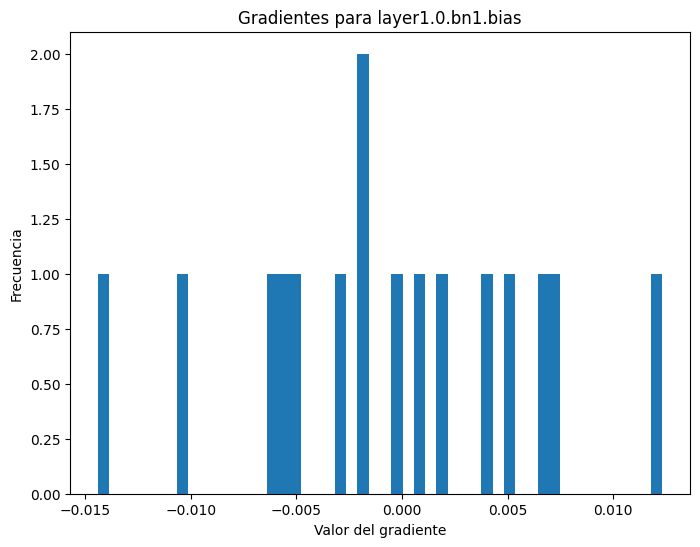

Gradientes para linear.weight: min=-0.039406467229127884, max=0.02653166465461254, mean=1.3504177776013648e-09, std=0.0061384327709674835


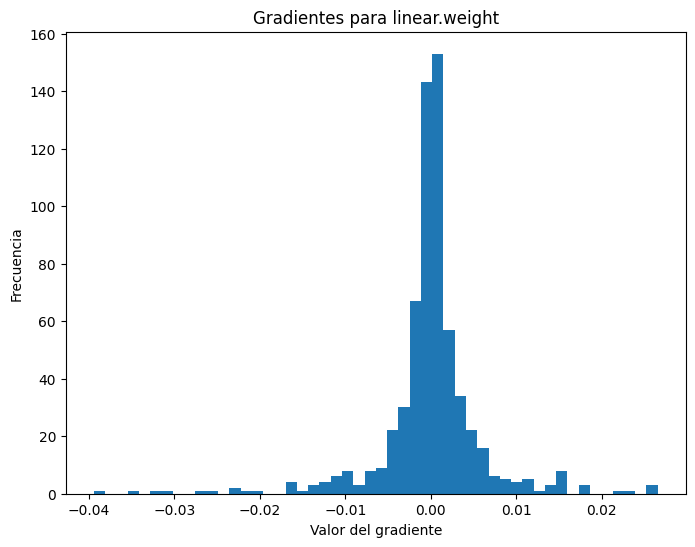

Gradientes para linear.bias: min=-0.012246621772646904, max=0.004825231619179249, mean=2.0489097085629737e-09, std=0.004756257403641939


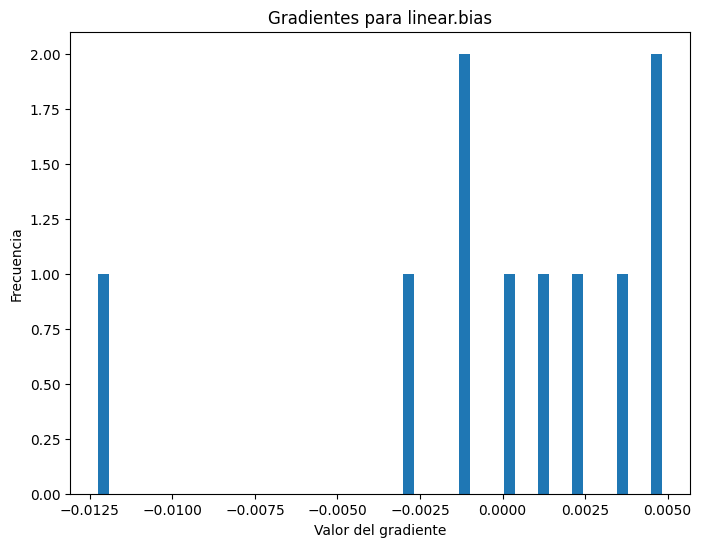

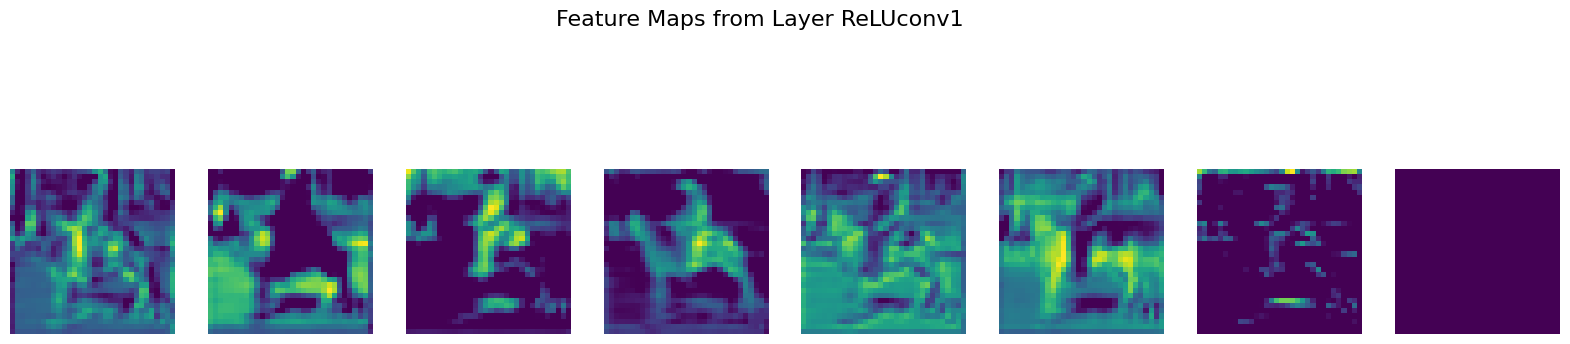

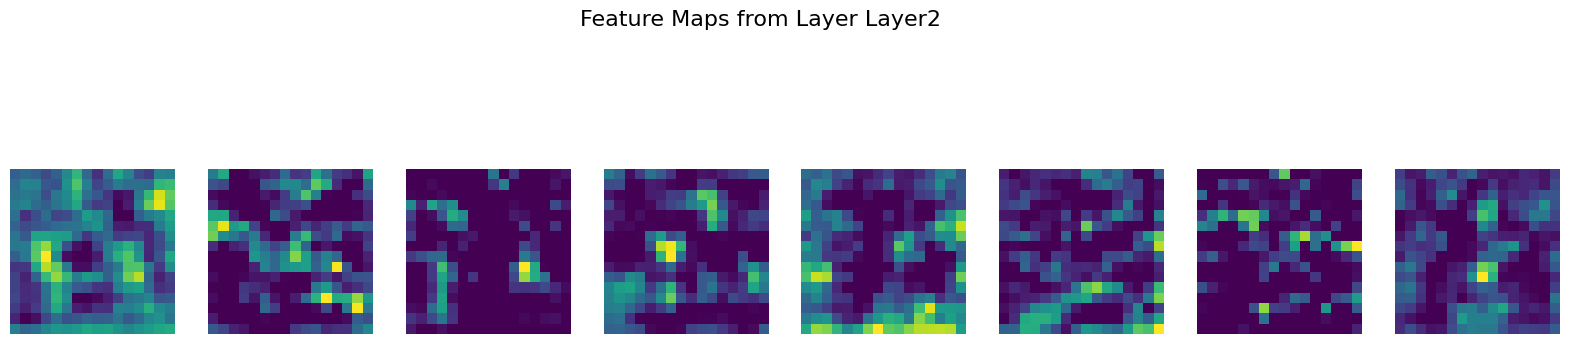

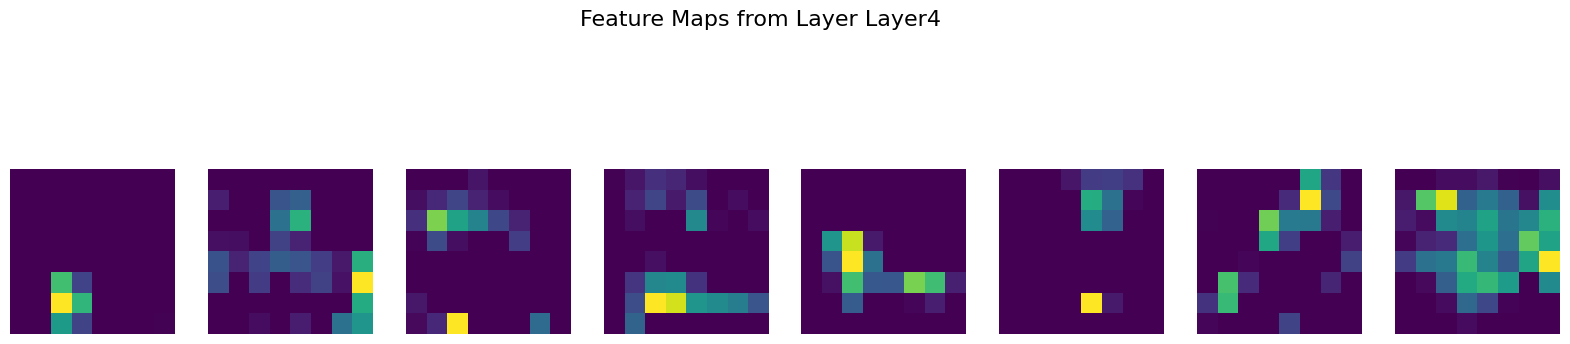

4.000000000000001e-06
Epoch 66/70
Iteración 22915 - Lote 35/352 - Pérdida de Entrenamiento: 0.2069, Precisión de Entrenamiento: 0.9268
Iteración 22950 - Lote 70/352 - Pérdida de Entrenamiento: 0.2082, Precisión de Entrenamiento: 0.9287
Iteración 22985 - Lote 105/352 - Pérdida de Entrenamiento: 0.2113, Precisión de Entrenamiento: 0.9261
Iteración 23020 - Lote 140/352 - Pérdida de Entrenamiento: 0.2136, Precisión de Entrenamiento: 0.9252
Iteración 23055 - Lote 175/352 - Pérdida de Entrenamiento: 0.2148, Precisión de Entrenamiento: 0.9256
Iteración 23090 - Lote 210/352 - Pérdida de Entrenamiento: 0.2166, Precisión de Entrenamiento: 0.9253
Iteración 23125 - Lote 245/352 - Pérdida de Entrenamiento: 0.2156, Precisión de Entrenamiento: 0.9257
Iteración 23160 - Lote 280/352 - Pérdida de Entrenamiento: 0.2148, Precisión de Entrenamiento: 0.9261
Iteración 23195 - Lote 315/352 - Pérdida de Entrenamiento: 0.2135, Precisión de Entrenamiento: 0.9271
Iteración 23230 - Lote 350/352 - Pérdida de Entren

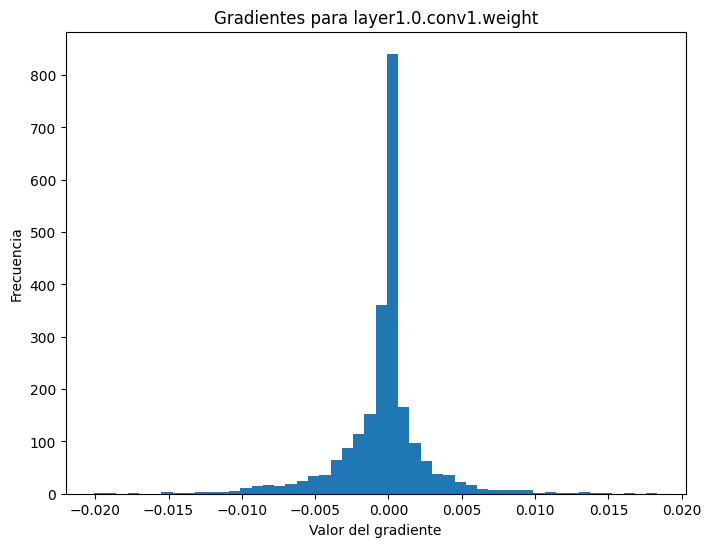

Gradientes para layer1.0.bn1.weight: min=-0.02195417694747448, max=0.028907181695103645, mean=-0.00045516586396843195, std=0.011287586763501167


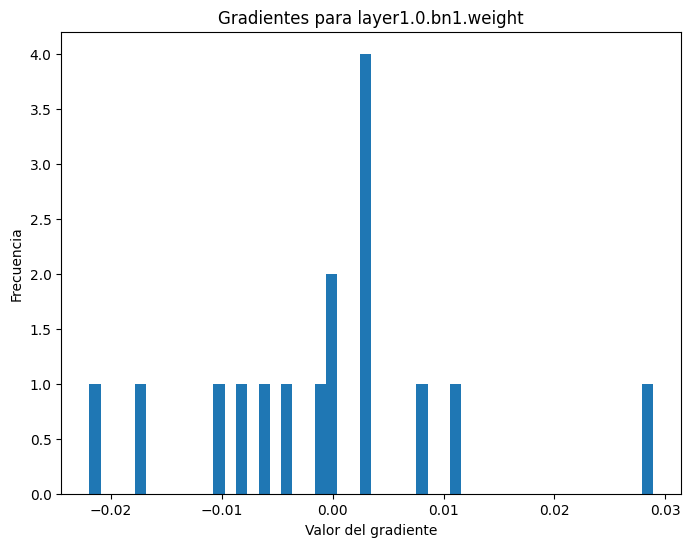

Gradientes para layer1.0.bn1.bias: min=-0.01714855432510376, max=0.023709692060947418, mean=0.0010212429333478212, std=0.010289689525961876


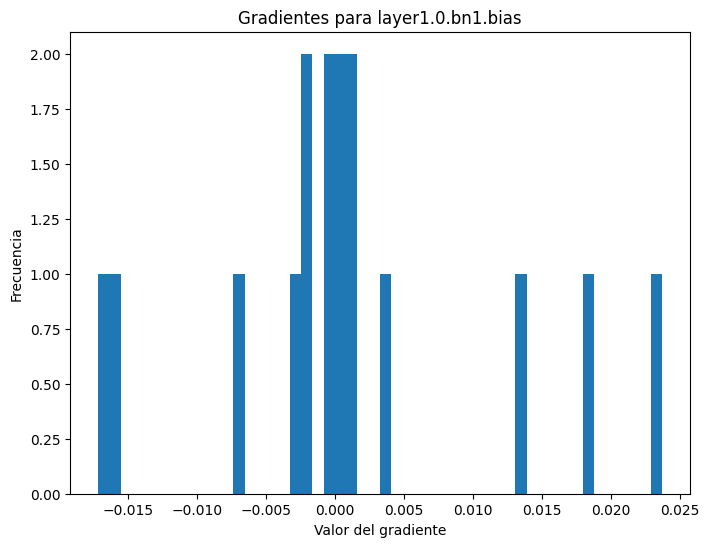

Gradientes para layer2.8.conv1.weight: min=-0.014106962829828262, max=0.01607978157699108, mean=-5.103573130327277e-05, std=0.0017578535480424762


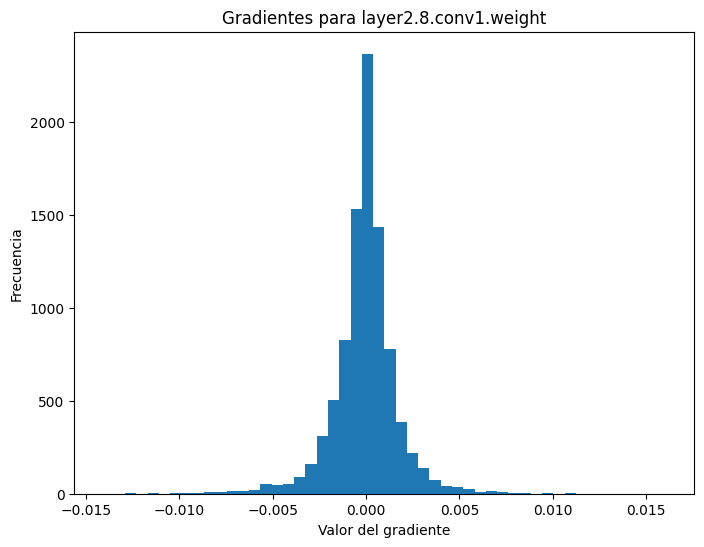

Gradientes para layer2.8.bn1.weight: min=-0.007419785019010305, max=0.013561752624809742, mean=-1.3041557394899428e-05, std=0.0038663074374198914


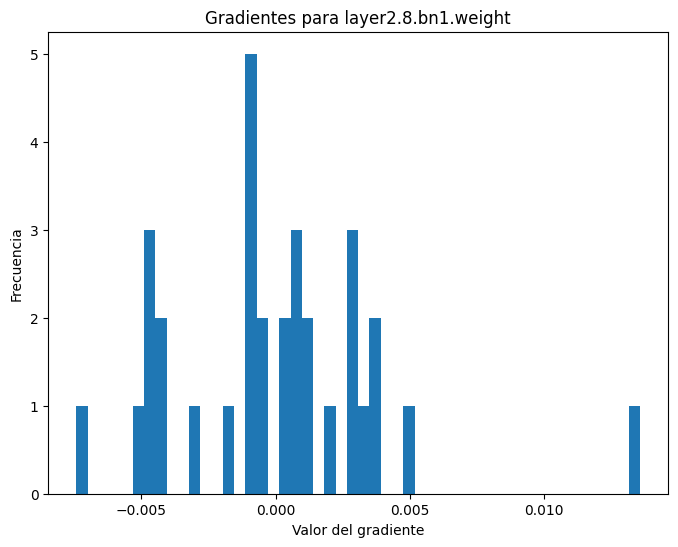

Gradientes para layer2.8.bn1.bias: min=-0.009277073666453362, max=0.00991074088960886, mean=0.0007348790531978011, std=0.003917028196156025


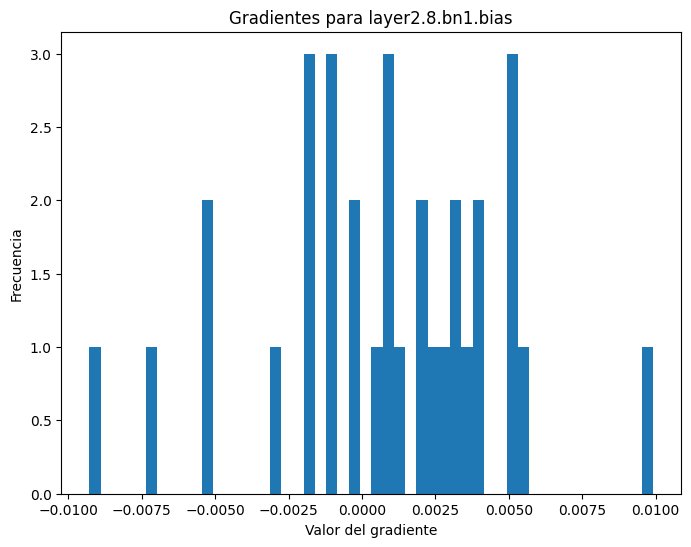

Gradientes para linear.weight: min=-0.048444684594869614, max=0.04249468818306923, mean=-9.313225884932663e-11, std=0.01314803771674633


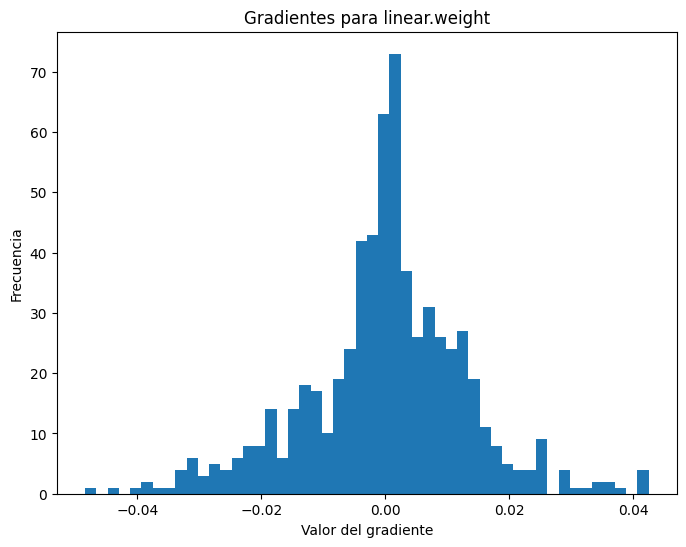

Gradientes para linear.bias: min=-0.032083526253700256, max=0.024694476276636124, mean=1.0710209386033398e-09, std=0.014509372413158417


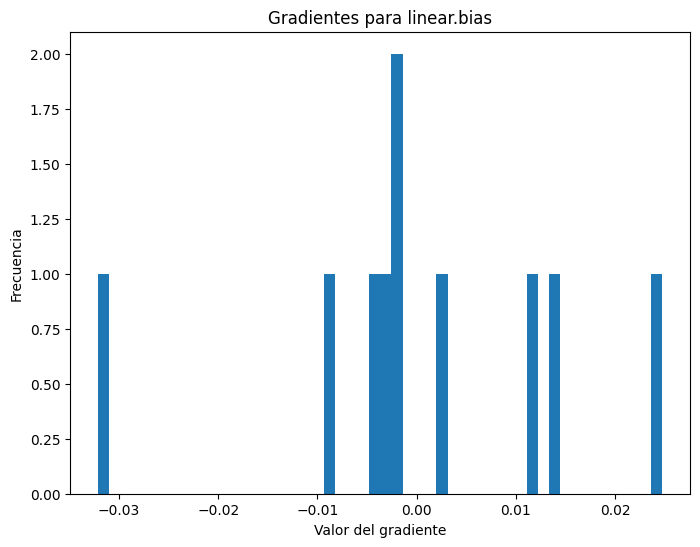

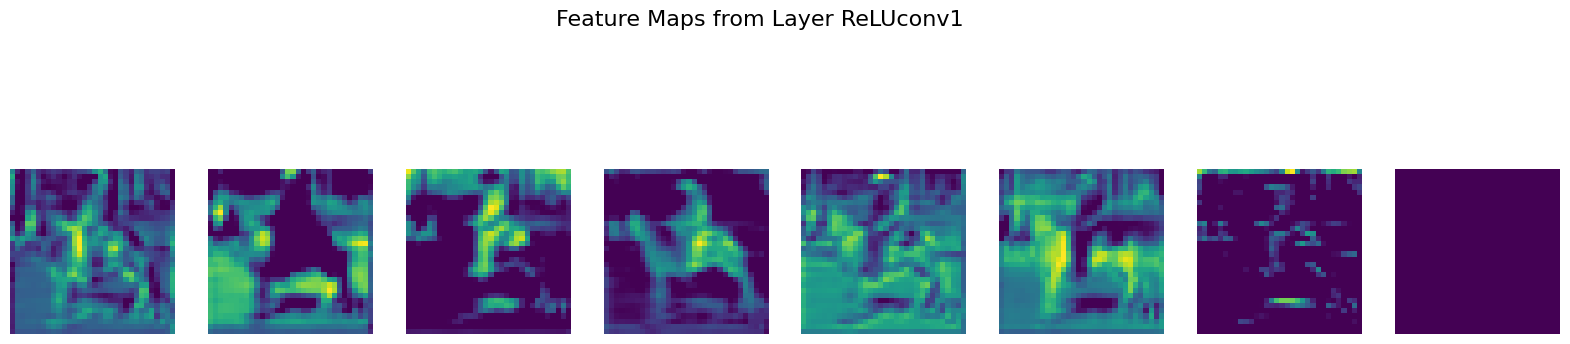

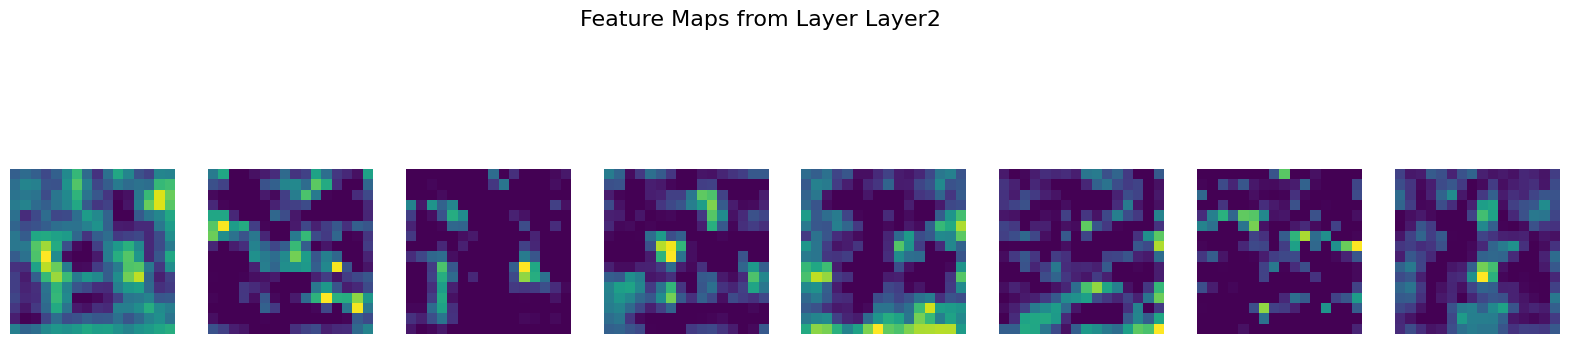

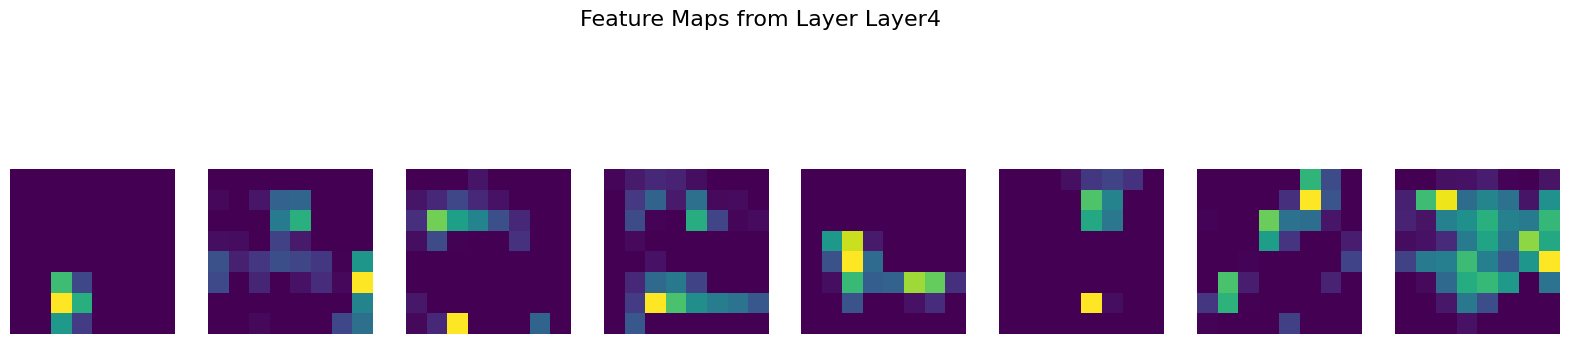

Early stopping at epoch 70

Tiempo total de entrenamiento: 4193.34 segundos


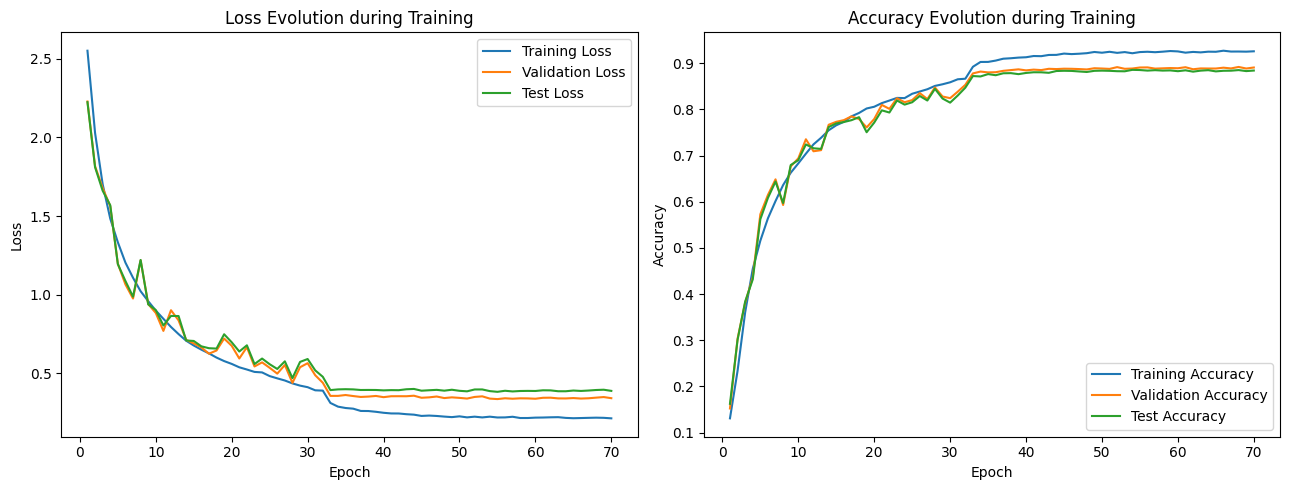

In [ ]:

# Transformaciones para entrenamiento y validación
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomCrop(32, padding=4),  # Recorte aleatorio después del padding
    torchvision.transforms.RandomHorizontalFlip(),      # Volteo horizontal aleatorio
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

val_test_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

# Cargar datasets CIFAR-10 con transformaciones
train_cifar10 = torchvision.datasets.CIFAR10(
    root="./cifar10",
    train=True,
    download=True,
    transform=train_transform  # Se aplica data augmentation aquí
)

test_cifar10 = torchvision.datasets.CIFAR10(
    root="./cifar10",
    train=False,
    download=True,
    transform=val_test_transform  # Solo normalización para testing
)

# Dividir dataset de entrenamiento y validación
train_cifar10, _ = torch.utils.data.random_split(train_cifar10, [45000, 5000], generator=torch.Generator().manual_seed(42))
_, val_cifar10 = torch.utils.data.random_split(
    torchvision.datasets.CIFAR10(root="./cifar10", train=True, transform=val_test_transform),
    [45000, 5000], generator=torch.Generator().manual_seed(42)
)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

"""# ResNet con Profundidad Estocástica"""

__all__ = ['resnet110_SD']


def _weights_init(m):
    """
        Initialization of CNN weights
    """
    classname = m.__class__.__name__
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        init.kaiming_normal_(m.weight)

class LambdaLayer(nn.Module):
    """
      Identity mapping between ResNet blocks with different size feature map
    """
    def __init__(self, lambd):
        super(LambdaLayer, self).__init__()
        self.lambd = lambd

    def forward(self, x):
        return self.lambd(x)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, survival_prob=1.0, option='A'):
        super(BasicBlock, self).__init__()
        self.survival_prob = survival_prob  # Probabilidad de supervivencia

        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        # Conexión de atajo
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            if option == 'A':
                """
                For CIFAR10 experiment, ResNet paper uses option A.
                """
                self.shortcut = LambdaLayer(lambda x:
                                            F.pad(x[:, :, ::2, ::2],
                                                  (0, 0, 0, 0, planes // 4, planes // 4),
                                                  "constant", 0))
            elif option == 'B':
                self.shortcut = nn.Sequential(
                    nn.Conv2d(in_planes, planes * self.expansion, kernel_size=1, stride=stride, bias=False),
                    nn.BatchNorm2d(planes * self.expansion)
                )

    def forward(self, x):
        if self.training and torch.rand(1).item() > self.survival_prob:
            # Si el bloque es "saltado", usa solo la conexión de atajo
            return self.shortcut(x)
        else:
            # Si el bloque no es saltado, aplica la función residual
            out = self.relu(self.bn1(self.conv1(x)))
            out = self.bn2(self.conv2(out))
            if not self.training:
                out = out * self.survival_prob  # Escala la rama residual
            out += self.shortcut(x)
            out = self.relu(out)
            return out



class ResNet110_SD(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10, survival_prob=0.8):
        super(ResNet110_SD, self).__init__()
        self.in_planes = 16
        self.survival_prob = survival_prob
        self.num_blocks = sum(num_blocks)  # Número total de bloques
        self.current_block = 0  # Contador de bloques para calcular survival_prob

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)

        # Capas residuales con decaimiento lineal de probabilidad
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.linear = nn.Linear(64 * block.expansion, num_classes)

        self.apply(_weights_init)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for s in strides:
            # Calcula survival_prob lineal para cada bloque
            block_survival_prob = 1 - (self.current_block / self.num_blocks) * (1 - self.survival_prob)
            self.current_block += 1
            layers.append(block(self.in_planes, planes, s, survival_prob=block_survival_prob))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        # Convolución inicial
        out = self.relu(self.bn1(self.conv1(x)))
        feature_maps['ReLUconv1'] = out
        out = self.layer1(out)
        out = self.layer2(out)
        feature_maps['Layer2'] = out
        out = self.layer3(out)
        feature_maps['Layer4'] = out
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        # Capa completamente conectada
        out = self.linear(out)
        return out

def resnet110_SD(survival_prob=0.8):
    return ResNet110_SD(BasicBlock, [18, 18, 18], survival_prob=survival_prob)

# Instancia del modelo para verificar
model = resnet110_SD(survival_prob=0.8)
print(model)



# Función para mostrar los gradientes (opcional)
def show_gradients_ResNet_110(model):
    layers_to_show = ['layer1.0.conv1', 'layer1.0.bn1', 'layer2.8.conv1', 'layer2.8.bn1', 'linear']  # Capas inicial, intermedia y final
    for name, param in model.named_parameters():
        if any(layer in name for layer in layers_to_show) and param.requires_grad and param.grad is not None:
            grad = param.grad.cpu().numpy()
            print(f"Gradientes para {name}: min={grad.min()}, max={grad.max()}, mean={grad.mean()}, std={grad.std()}")
            plt.figure(figsize=(8, 6))
            plt.hist(grad.flatten(), bins=50)
            plt.title(f'Gradientes para {name}')
            plt.xlabel('Valor del gradiente')
            plt.ylabel('Frecuencia')
            plt.show()

def show_curves(curves):
    fig, ax = plt.subplots(1, 2, figsize=(13, 5))
    fig.set_facecolor('white')

    epochs = np.arange(len(curves["val_loss"])) + 1

    # Pérdida
    ax[0].plot(epochs, np.array(curves['train_loss']), label='Training Loss')
    ax[0].plot(epochs, np.array(curves['val_loss']), label='Validation Loss')
    ax[0].plot(epochs, np.array(curves['test_loss']), label='Test Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss Evolution during Training')
    ax[0].legend()

    # Precisión
    ax[1].plot(epochs, np.array(curves['train_acc']), label='Training Accuracy')
    ax[1].plot(epochs, np.array(curves['val_acc']), label='Validation Accuracy')
    ax[1].plot(epochs, np.array(curves['test_acc']), label='Test Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy Evolution during Training')
    ax[1].legend()

    plt.tight_layout()
    plt.savefig('training_curves.png')
    plt.show()

# Visualizar mapas de características (opcional)
def show_feature_maps(feature_maps):
    for layer_name, feature_map in feature_maps.items():
        fmap = feature_map[0].cpu().numpy()  # Convert to CPU and NumPy for visualization
        num_feature_maps = fmap.shape[0]

        # Plot a grid of feature maps (first 8 feature maps)
        fig, axes = plt.subplots(1, min(8, num_feature_maps), figsize=(20, 5))
        fig.suptitle(f"Feature Maps from Layer {layer_name}", fontsize=16)

        for i in range(min(8, num_feature_maps)):
            axes[i].imshow(fmap[i], cmap='viridis')
            axes[i].axis('off')

        plt.show()

# Training step function
def train_step(x_batch, y_batch, model, optimizer, criterion, device):
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    y_predicted = model(x_batch)
    loss = criterion(y_predicted, y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return y_predicted, loss

# Funciones para guardar y cargar checkpoints (opcional)
def checkpoint_save(model, optimizer, epoch, filename):
    checkpoint_data = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }
    torch.save(checkpoint_data, os.path.join(checkpoint_dir, filename))
    print(f"Checkpoint guardado en {os.path.join(checkpoint_dir, filename)}")

def checkpoint_resume(model, optimizer, filename):
    checkpoint_path = os.path.join(checkpoint_dir, filename)
    if os.path.isfile(checkpoint_path):
        checkpoint_data = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint_data['model_state_dict'])
        optimizer.load_state_dict(checkpoint_data['optimizer_state_dict'])
        epoch = checkpoint_data['epoch']
        print(f"Checkpoint cargado desde '{checkpoint_path}' (época {epoch})")
        return epoch
    else:
        print(f"No se encontró ningún checkpoint en '{checkpoint_path}'")
        return None

# Evaluation function
def evaluate(val_loader, model, criterion, device):
    model.eval()
    cumulative_loss = 0
    cumulative_corrects = 0
    data_count = 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            final_output = model(imgs)
            loss = criterion(final_output, labels)
            cumulative_loss += loss.item() * len(labels)
            data_count += len(labels)
            _, pred_class = final_output.max(1)
            cumulative_corrects += (pred_class == labels).sum().item()
    val_acc = cumulative_corrects / data_count
    val_loss = cumulative_loss / data_count
    return val_acc, val_loss


# Función de entrenamiento
def train_model(
    model,
    train_dataset,
    val_dataset,
    epochs,
    max_iterations,
    criterion,
    batch_size,
    lr,
    weight_decay,
    n_evaluations_per_epoch,
    early_stop_thresh,
    show_gradients,
    patience,
    use_gpu=True,
    data_augmentation=False,
    resume_checkpoint=None
):
    original_transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    ])

    if data_augmentation:
        train_dataset.dataset.transform = torchvision.transforms.Compose([
            torchvision.transforms.RandomCrop(32, padding=4),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
        ])
    else:
        train_dataset.dataset.transform = original_transform

    print(f"Using train transform: {train_dataset.dataset.transform}")
    print(f"Using validation transform: {val_dataset.dataset.transform}")

    # Usar GPU si está disponible
    device = torch.device('cuda' if use_gpu else 'cpu')
    model = model.to(device)

    # DataLoaders
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=use_gpu)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=use_gpu)
    test_loader = torch.utils.data.DataLoader(test_cifar10, batch_size=128, shuffle=False, num_workers=4, pin_memory=use_gpu)

    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=patience, threshold=0.0001, threshold_mode='abs')
    scaler = torch.amp.GradScaler()
    # Inicializar curvas incluyendo las del conjunto de prueba
    curves = {"train_acc": [], "val_acc": [], "test_acc": [],
              "train_loss": [], "val_loss": [], "test_loss": [],
              "epoch_times": []}
    t0 = time.perf_counter()
    iteration = 0
    n_batches = len(train_loader)
    start_epoch = 0
    if resume_checkpoint is not None:
        start_epoch = checkpoint_resume(model, optimizer, resume_checkpoint)
        print(f"Reanudando desde la época {start_epoch}")

    best_val_loss = float('inf')
    best_epoch = -1
    early_stop_counter = 0

    for epoch in range(start_epoch, epochs):
        print(optimizer.param_groups[0]["lr"])
        print(f"\rEpoch {epoch + 1}/{epochs}")
        cumulative_train_loss = 0
        cumulative_train_corrects = 0
        train_loss_count = 0
        train_acc_count = 0

        # Inicio de medición de tiempo por época
        epoch_start_time = time.perf_counter()

        model.train()
        for i, (x_batch, y_batch) in enumerate(train_loader):
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_predicted, loss = train_step(x_batch, y_batch, model, optimizer, criterion, device)

            cumulative_train_loss += loss.item()
            train_loss_count += 1
            train_acc_count += y_batch.shape[0]

            # Cálculo de precisión
            class_prediction = torch.argmax(y_predicted, axis=1).long()
            cumulative_train_corrects += (y_batch == class_prediction).sum().item()

            # Registro de métricas
            if (i + 1) % (n_batches // n_evaluations_per_epoch) == 0:
                train_loss = cumulative_train_loss / train_loss_count
                train_acc = cumulative_train_corrects / train_acc_count

                print(
                    f"Iteración {iteration + 1} - Lote {i + 1}/{n_batches} - "
                    f"Pérdida de Entrenamiento: {train_loss:.4f}, Precisión de Entrenamiento: {train_acc:.4f}"
                )

            iteration += 1
            if iteration >= max_iterations:
                print(f"Número máximo de iteraciones alcanzado: {max_iterations}")
                break

        # Fin de medición de tiempo por época
        epoch_end_time = time.perf_counter()
        epoch_duration = epoch_end_time - epoch_start_time
        curves["epoch_times"].append(epoch_duration)

        print(f"Tiempo de la época {epoch + 1}: {epoch_duration:.2f} segundos")

        # Evaluación en el conjunto de validación
        val_acc, val_loss = evaluate(val_loader, model, criterion, device)
        print(f"Val loss: {val_loss:.4f}, Val acc: {val_acc:.4f}")

        # **Evaluación en el conjunto de prueba**
        test_acc, test_loss = evaluate(test_loader, model, criterion, device)
        print(f"Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

        train_loss = cumulative_train_loss / train_loss_count
        train_acc = cumulative_train_corrects / train_acc_count

        curves["train_acc"].append(train_acc)
        curves["val_acc"].append(val_acc)
        curves["test_acc"].append(test_acc)
        curves["train_loss"].append(train_loss)
        curves["val_loss"].append(val_loss)
        curves["test_loss"].append(test_loss)
        scheduler.step(val_loss)

        # Checkpointing del mejor modelo basado en la pérdida de validación
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            early_stop_counter = 0
            checkpoint_filename = f"best_checkpoint_epoch_{epoch + 1}.pth"
            checkpoint_save(model, optimizer, epoch, checkpoint_filename)
            print(f"Checkpoint del mejor modelo guardado en la época {epoch + 1}")
        else:
            early_stop_counter += 1

        if epoch + 1 == 1 or (epoch + 1) % 5 == 0 or early_stop_counter >= early_stop_thresh:
            show_gradients(model)
            show_feature_maps(feature_maps)

        if early_stop_counter >= early_stop_thresh:
            print(f"Early stopping at epoch {epoch + 1}")
            break

        if iteration >= max_iterations:
            break

    total_training_time = sum(curves["epoch_times"])
    print(f"\nTiempo total de entrenamiento: {total_training_time:.2f} segundos")

    # Asegurarse de que el modelo esté en CPU después del entrenamiento
    model.cpu()

    if data_augmentation:
        train_dataset.dataset.transform = original_transform

    return curves

# Configuraciones
use_gpu = torch.cuda.is_available()

# Directorio para guardar checkpoints (opcional)
checkpoint_dir = "/content/drive/MyDrive/CheckpointsResNet110_SD"
os.makedirs(checkpoint_dir, exist_ok=True)
feature_maps = {}
if __name__ == "__main__":
    # Hiperparámetros
    batch_size = 128
    epochs = 70
    max_iterations = 600000  # Ajusta según sea necesario
    learning_rate = 0.04
    n_evaluations_per_epoch = 10
    data_augmentation = True
    weight_decay = 1e-4
    early_stop_thresh = 15
    patience = 3
    survival_prob = 0.8  # Probabilidad de supervivencia para la profundidad estocástica

    # Inicializar el modelo con profundidad estocástica
    model = resnet110_SD(survival_prob=0.8)

    # Definir función de pérdida
    criterion = nn.CrossEntropyLoss()

    # Entrenar el modelo
    curves = train_model(
        model=model,
        train_dataset=train_cifar10,
        val_dataset=val_cifar10,
        epochs=epochs,
        max_iterations=max_iterations,
        criterion=criterion,
        batch_size=batch_size,
        lr=learning_rate,
        n_evaluations_per_epoch=n_evaluations_per_epoch,
        early_stop_thresh=early_stop_thresh,
        show_gradients=show_gradients_ResNet_110,
        patience=patience,
        use_gpu=use_gpu,
        data_augmentation=data_augmentation,
        resume_checkpoint=None,  # Establece a una cadena de caracteres para reanudar, por ejemplo, "best_checkpoint_epoch_10.pth"
        weight_decay=weight_decay
    )

    # Plotear curvas de entrenamiento
    show_curves(curves)



In [ ]:
__all__ = ['ResNet', 'resnet110_SD']

def test(net):
    total_params = 0

    for x in filter(lambda p: p.requires_grad, net.parameters()):
        total_params += np.prod(x.data.numpy().shape)
    print("Total number of params", total_params)
    print("Total layers", len(list(filter(lambda p: p.requires_grad and len(p.data.size())>1, net.parameters()))))


if __name__ == "__main__":
    for net_name in __all__:
        if net_name.startswith('resnet'):
            print(net_name)
            test(globals()[net_name]())
            print()

resnet110_SD
Total number of params 1727962
Total layers 110

